# Warning

This is original Gevo file. This may be working not as expected with my modifications.

# Run & display stats

In [1]:
import gc
import os
import datetime
import numpy as np
from tqdm.notebook import tqdm

from sim import FunctionType, Simulation, StaticSimulation, SimulationResults, LinearSimulation, LinearSimulationStatic, LongstepSimulation, LongstepSimulationStatic, SimulationEnsemble
from graph import GraphType, CompleteGraph, RingGraph, RocGraph, ErGraph, CompleteGraph
from rw_utils import pickle_obj
from db import SimulationDatabase, SimulationDirectory

In [2]:
num_nodes = 100
nums_edges = [220, 460, 1204]
graph_types = [GraphType.ring, GraphType.roc, GraphType.er]

# (GraphType, num_edges): Graph
graphs = {
    # (GraphType.complete, 4950): (CompleteGraph, {'num_nodes': num_nodes}),
    (GraphType.ring, 220): (RingGraph, {'num_nodes': num_nodes, 'degree': 4}),
    (GraphType.ring, 460): (RingGraph, {'num_nodes': num_nodes, 'degree': 10}),
    (GraphType.ring, 1204): (RingGraph, {'num_nodes': num_nodes, 'degree': 24}),
    (GraphType.er, 220): (ErGraph, {'num_nodes': num_nodes, 'num_edges': 220}),
    (GraphType.er, 460): (ErGraph, {'num_nodes': num_nodes, 'num_edges': 460}),
    (GraphType.er, 1204): (ErGraph, {'num_nodes': num_nodes, 'num_edges': 1204}),
    (GraphType.roc, 220): (RocGraph, {'num_cliques': 20, 'clique_size': 5}),
    (GraphType.roc, 460): (RocGraph, {'num_cliques': 10, 'clique_size': 10}),
    (GraphType.roc, 1204): (RocGraph, {'num_cliques': 4, 'clique_size': 25})
}

# (FunctionType, static): Simulation
simulations = {
    (FunctionType.linear, False): LinearSimulation,
    (FunctionType.longstep, False): LongstepSimulation,
    (FunctionType.linear, True): LinearSimulationStatic,
    (FunctionType.longstep, True): LongstepSimulationStatic
}

In [3]:
num_runs = 5
params = {
    'graph': None,
    'eps': 0.1,
    'beta_0': 0.055,
    'beta_1': 0.050,
    'alpha_0': 0.0,
    'alpha_1': 0.0,
    'X': np.array([[.02, .98], [.02, .98]]),
    'max_num_iter': 150_000
}

## Run

Careful with parameters for `Longstep, RocGraph(4x25)` and `Longstep, RingGraph(100,24)`.

In [4]:
for (graph_type, num_edges), (graph_class, graph_params) in graphs.items():
    for (func_type, static), simulation_class in simulations.items():
        params['graph'] = graph_class(**graph_params)
        sim = simulation_class(**params)
        sim_ensemble = SimulationEnsemble(sim, num_runs)
        sim_ensemble.run()

d:\Personal\University\sem8\ВКР\Код\Gevo\sim.py:48: RuntimeWarning: There is a chance that simulation will not terminate. If end_condition is not None, alpha_0 should be more than 0
  warnings.warn("There is a chance that simulation will not terminate. If end_condition is not None, alpha_0 should be more than 0", category=RuntimeWarning)
LinearSimulation on ring(n=100,k=4) (200 edges): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]
LongstepSimulation on ring(n=100,k=4) (200 edges): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]
LinearSimulationStatic on ring(n=100,k=4) (200 edges): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]
LongstepSimulationStatic on ring(n=100,k=4) (200 edges): 100%|██████████| 5/5 [00:00<00:00,  6.90it/s]
LinearSimulation on ring(n=100,k=10) (500 edges): 100%|██████████| 5/5 [00:00<00:00,  8.77it/s]
LongstepSimulation on ring(n=100,k=10) (500 edges): 100%|██████████| 5/5 [00:00<00:00, 10.92it/s]
LinearSimulationStatic on ring(n=100,k=10) (500 edges): 100%|█████████

## Display stats

In [5]:
sdb = SimulationDatabase(path='output')
for (graph_type, num_edges), (_, graph_params) in graphs.items():
    for (func_type, static), _ in simulations.items():
        sdirs = [
            sdir
            for sdir in sdb.sdirs
            if (sdir.sim.func_type == func_type) and
            (static is isinstance(sdir.sim, StaticSimulation)) and
            (num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70) and
            (sdir.sim.graph.graph_type == graph_type)
        ]
        if len(sdirs) != 1:
            raise RuntimeError(f"Found {len(sdirs)} SimulationDirectories after filter. Expected 1.")
        sdir = sdirs[0]
        sdir.cache()
        sdir.info()
        del sdir
        gc.collect()

SimulationDirectory for LinearSimulation on ring(n=100,k=4), 200 edges (5 runs)
E[t|~A] = 3058.0
E[t|A] = 3646.0
tmax = 5220
SimulationDirectory for LongstepSimulation on ring(n=100,k=4), 200 edges (5 runs)
E[t|~A] = 1098.0
E[t|A] = 7375.5
tmax = 11556
SimulationDirectory for LinearSimulationStatic on ring(n=100,k=4), 200 edges (5 runs)
E[t|~A] = None
E[t|A] = 2543.6
tmax = 7408
SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=4), 200 edges (5 runs)
E[t|~A] = None
E[t|A] = 1333.2
tmax = 2100
SimulationDirectory for LinearSimulation on ring(n=100,k=10), 500 edges (5 runs)
E[t|~A] = 149.0
E[t|A] = 2195.6666666666665
tmax = 2916
SimulationDirectory for LongstepSimulation on ring(n=100,k=10), 500 edges (5 runs)
E[t|~A] = 343.3333333333333
E[t|A] = 1559.5
tmax = 2239
SimulationDirectory for LinearSimulationStatic on ring(n=100,k=10), 500 edges (5 runs)
E[t|~A] = None
E[t|A] = 546.8
tmax = 1143
SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=10), 500 edges (5

d:\Personal\University\sem8\ВКР\Код\Gevo\db.py:57: RuntimeWarning: Mean of empty slice.
  self.t_mean_1 = self.times[self.outcomes].mean()
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


SimulationDirectory for LinearSimulationStatic on ring(n=100,k=24), 1200 edges (5 runs)
E[t|~A] = None
E[t|A] = 378.0
tmax = 519
SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=24), 1200 edges (5 runs)
E[t|~A] = None
E[t|A] = 392.4
tmax = 687
SimulationDirectory for LinearSimulation on er(n=100,m=220), 220 edges (5 runs)
E[t|~A] = 175.33333333333334
E[t|A] = 1375.5
tmax = 1628
SimulationDirectory for LongstepSimulation on er(n=100,m=220), 220 edges (5 runs)
E[t|~A] = 323.5
E[t|A] = 642.0
tmax = 642
SimulationDirectory for LinearSimulationStatic on er(n=100,m=220), 220 edges (5 runs)
E[t|~A] = None
E[t|A] = 695.2
tmax = 1222
SimulationDirectory for LongstepSimulationStatic on er(n=100,m=220), 220 edges (5 runs)
E[t|~A] = None
E[t|A] = 510.4
tmax = 676
SimulationDirectory for LinearSimulation on er(n=100,m=460), 460 edges (5 runs)
E[t|~A] = 84.0
E[t|A] = 908.3333333333334
tmax = 1389
SimulationDirectory for LongstepSimulation on er(n=100,m=460), 460 edges (5 runs)
E[t|~A

# Plot & animate

In [6]:
import os
import gc
import numpy as np
from matplotlib import pyplot as plt

from sim import FunctionType, StaticSimulation, FunctionType
from graph import GraphType, RingGraph, RocGraph, ErGraph
from plot import SigmaPlot
from db import SimulationDatabase, SimulationDirectory
from utils import sigma_mean, sigmas, pad
from rw_utils import read_pickled, deserialize_boolean_array
from animate import animate

%matplotlib inline

In [7]:
color = {
    GraphType.ring: 'red',
    GraphType.roc: 'green',
    GraphType.er: 'blue',
}

x_right = {
    FunctionType.linear: 2500,
    FunctionType.longstep: 25000
}

label = {
    GraphType.ring: 'k-рег. кольцо',
    GraphType.roc: 'кольцо клик',
    GraphType.er: 'ER',
}

## Plot all

linear_e220.png:
caching SimulationDirectory for LinearSimulation on ring(n=100,k=4), 200 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on er(n=100,m=220), 220 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on roc(k=20,l=5), 220 edges (5 runs)...



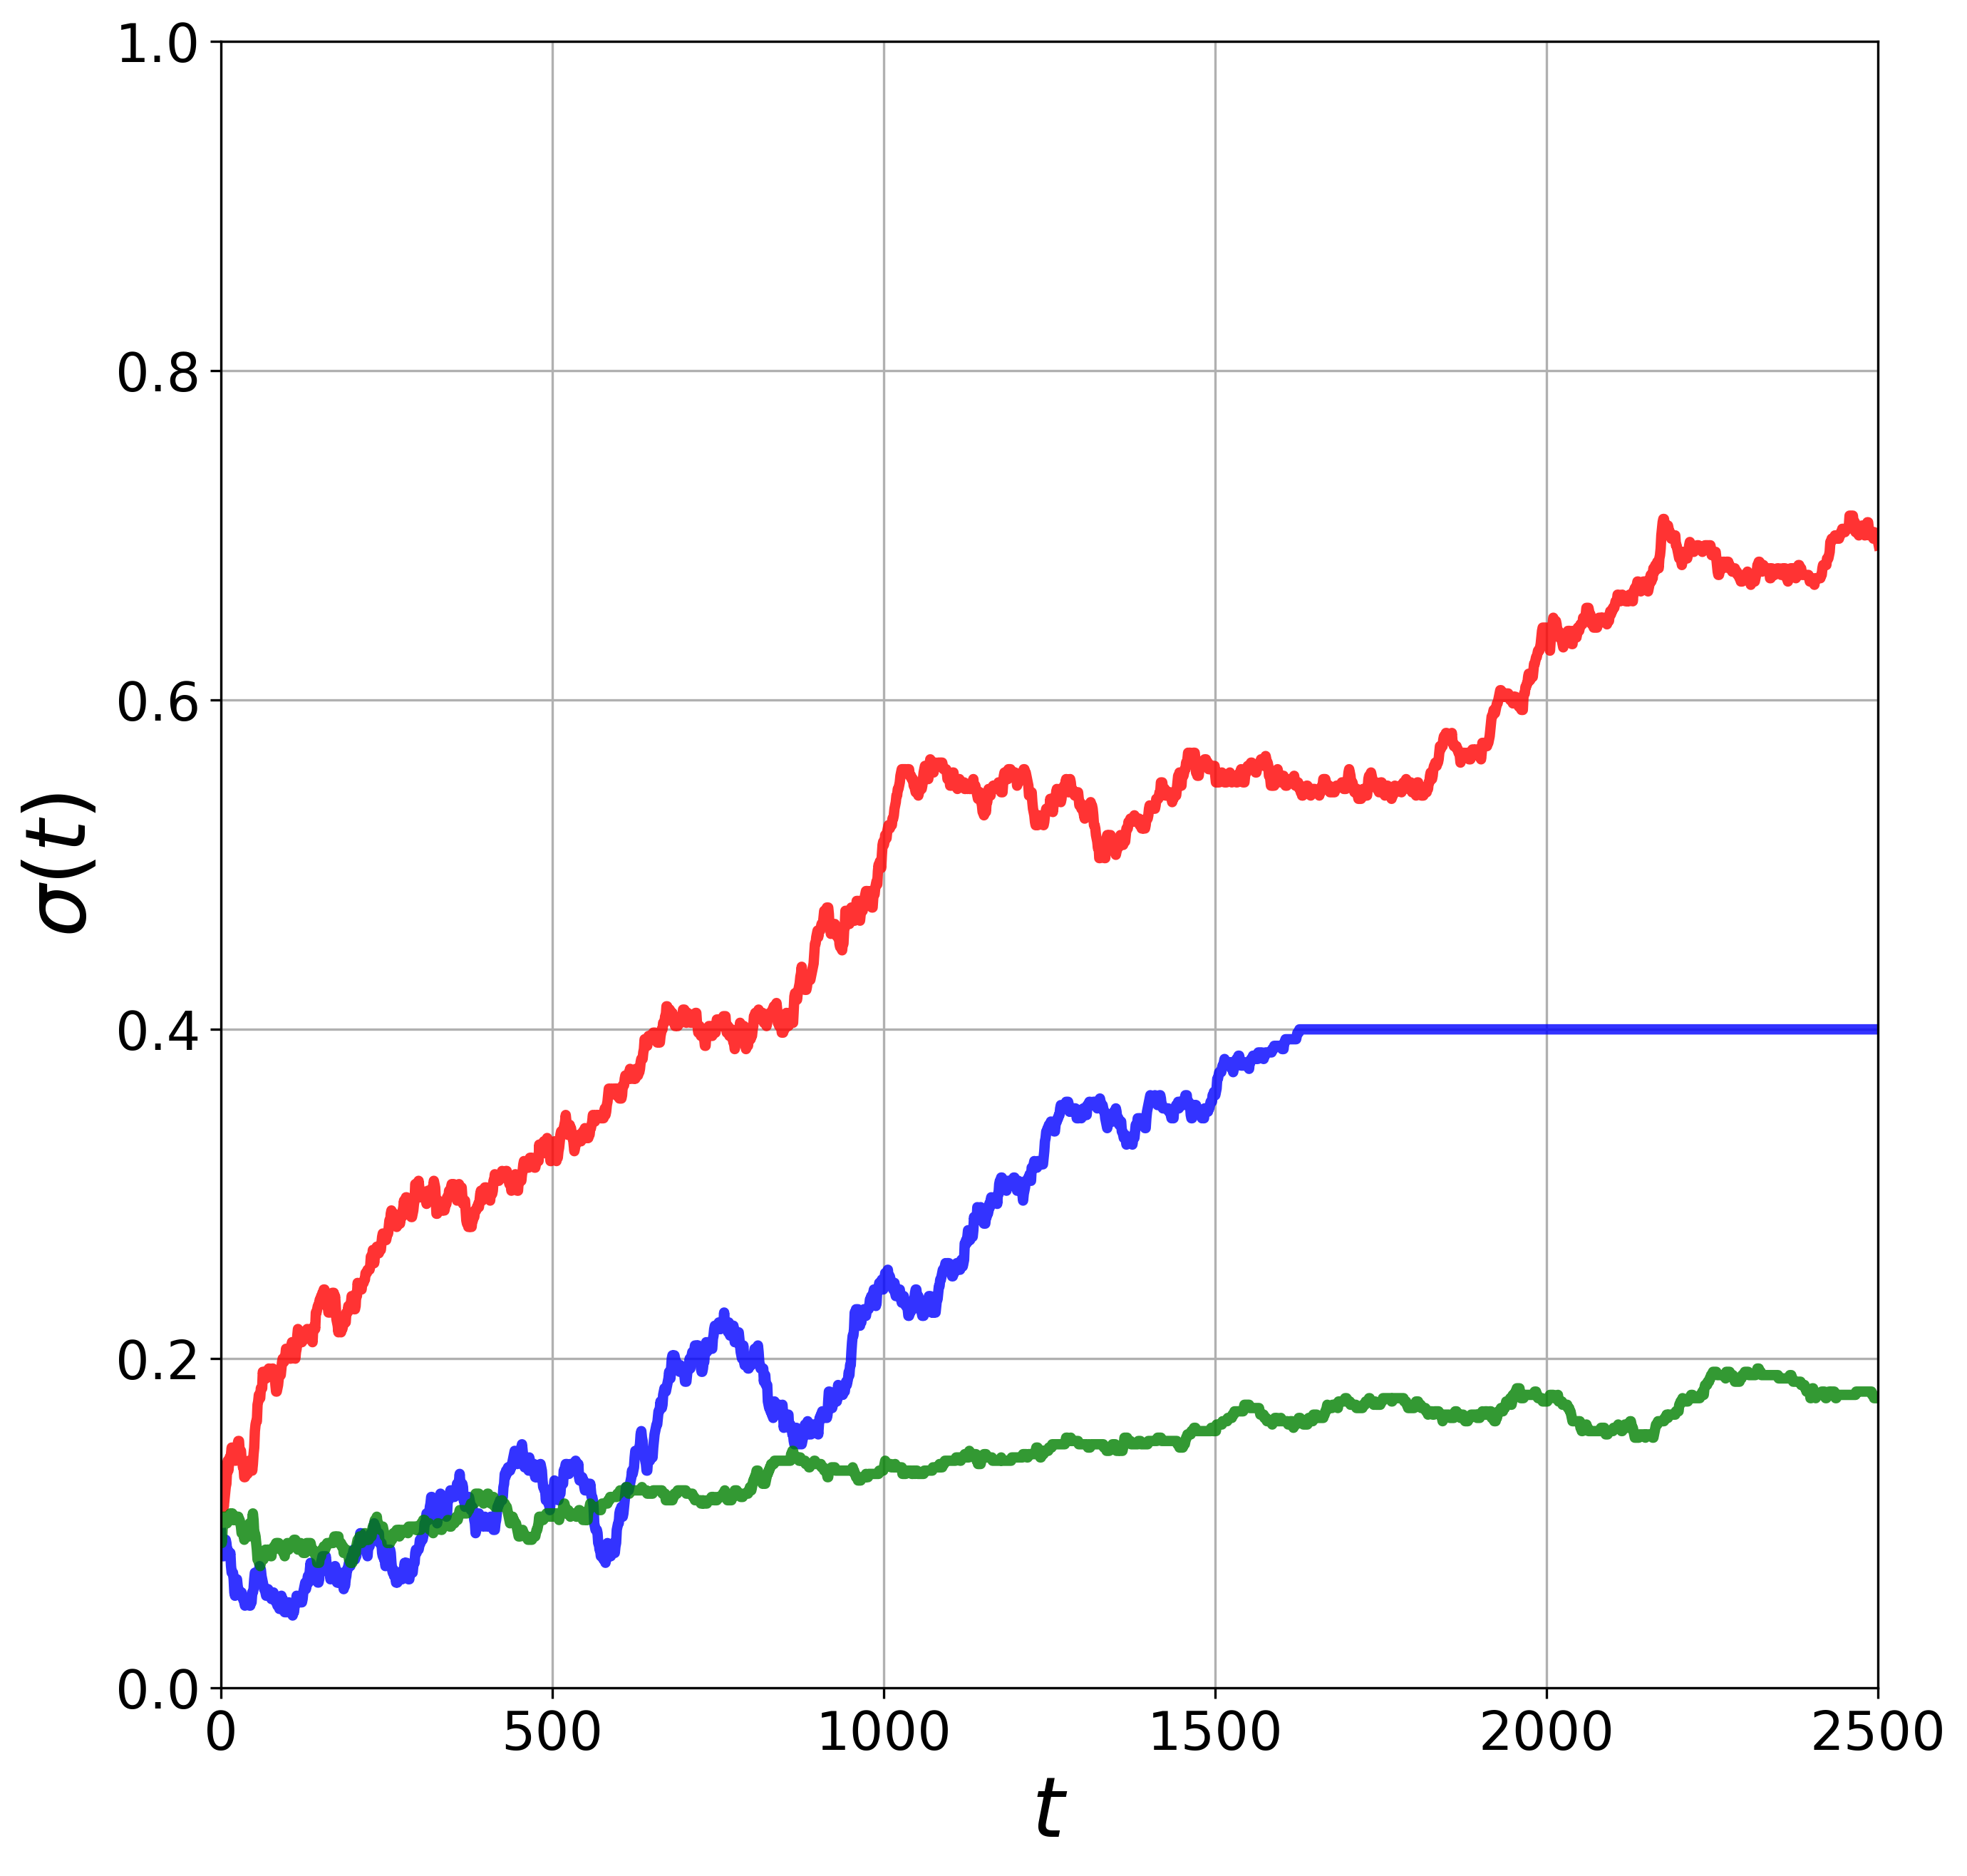

linear_e460.png:
caching SimulationDirectory for LinearSimulation on ring(n=100,k=10), 500 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on er(n=100,m=460), 460 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on roc(k=10,l=10), 460 edges (5 runs)...



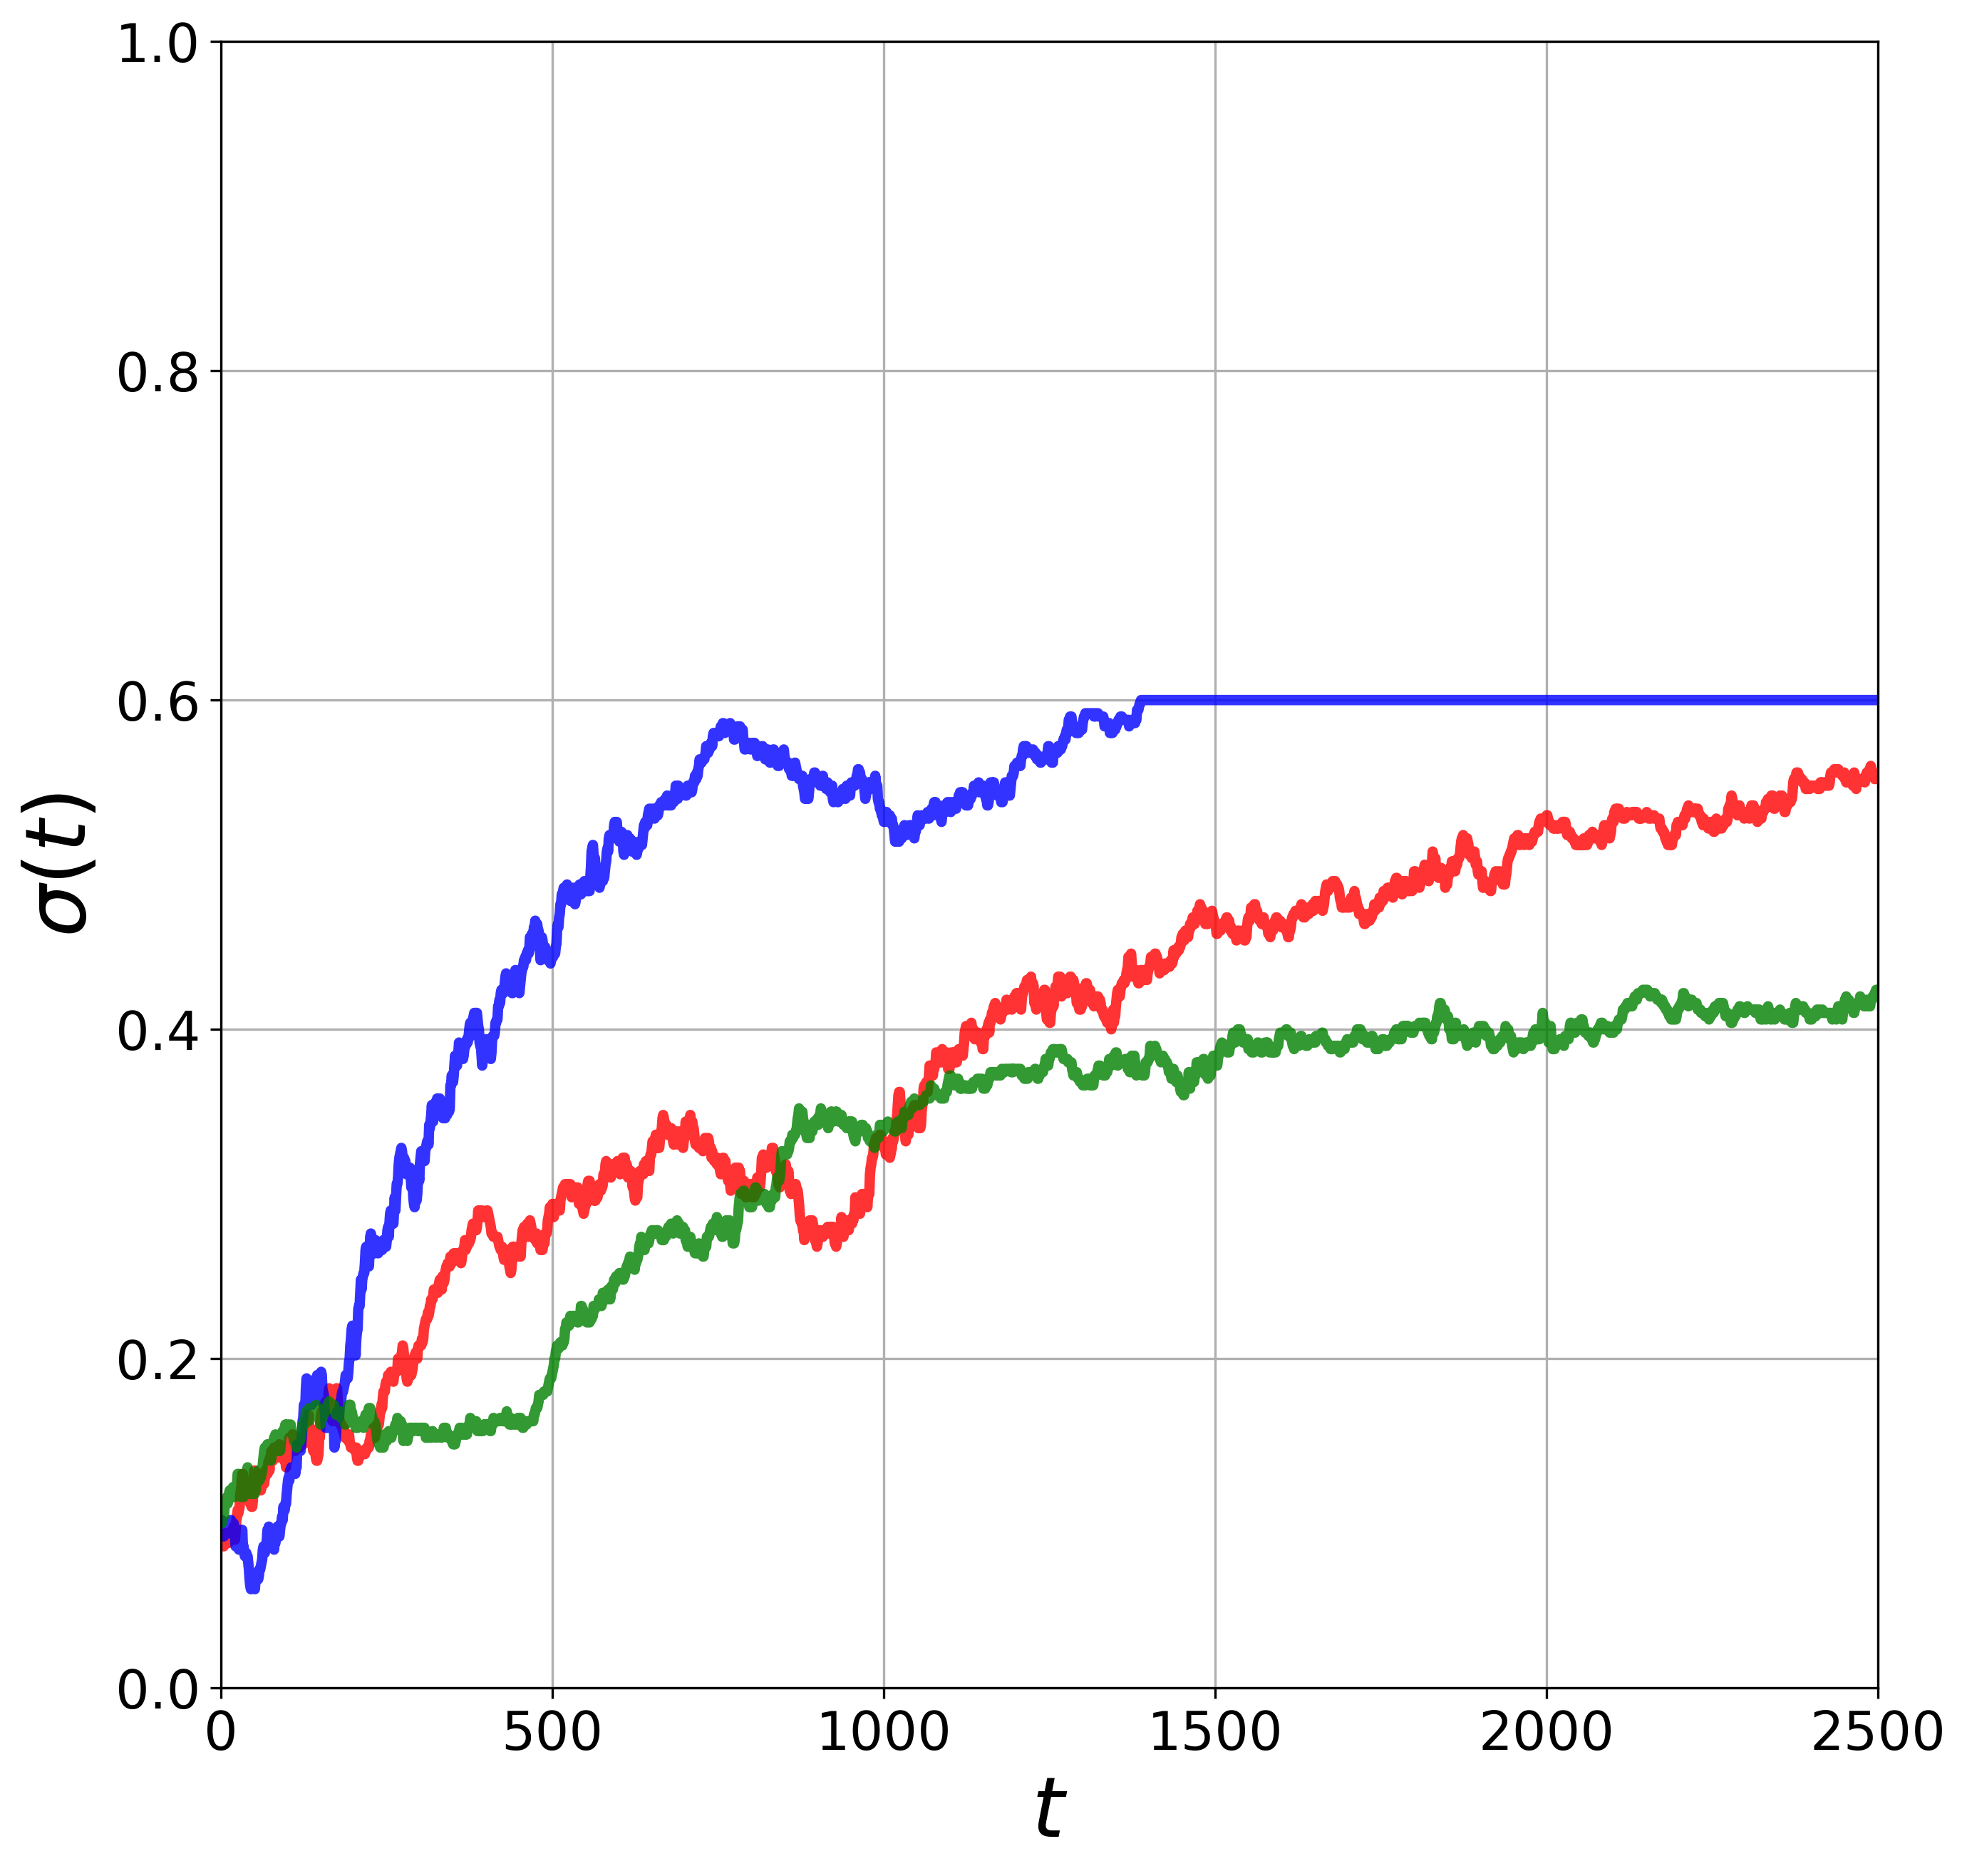

linear_e1204.png:
caching SimulationDirectory for LinearSimulation on ring(n=100,k=24), 1200 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on er(n=100,m=1204), 1204 edges (5 runs)...
caching SimulationDirectory for LinearSimulation on roc(k=4,l=25), 1204 edges (5 runs)...



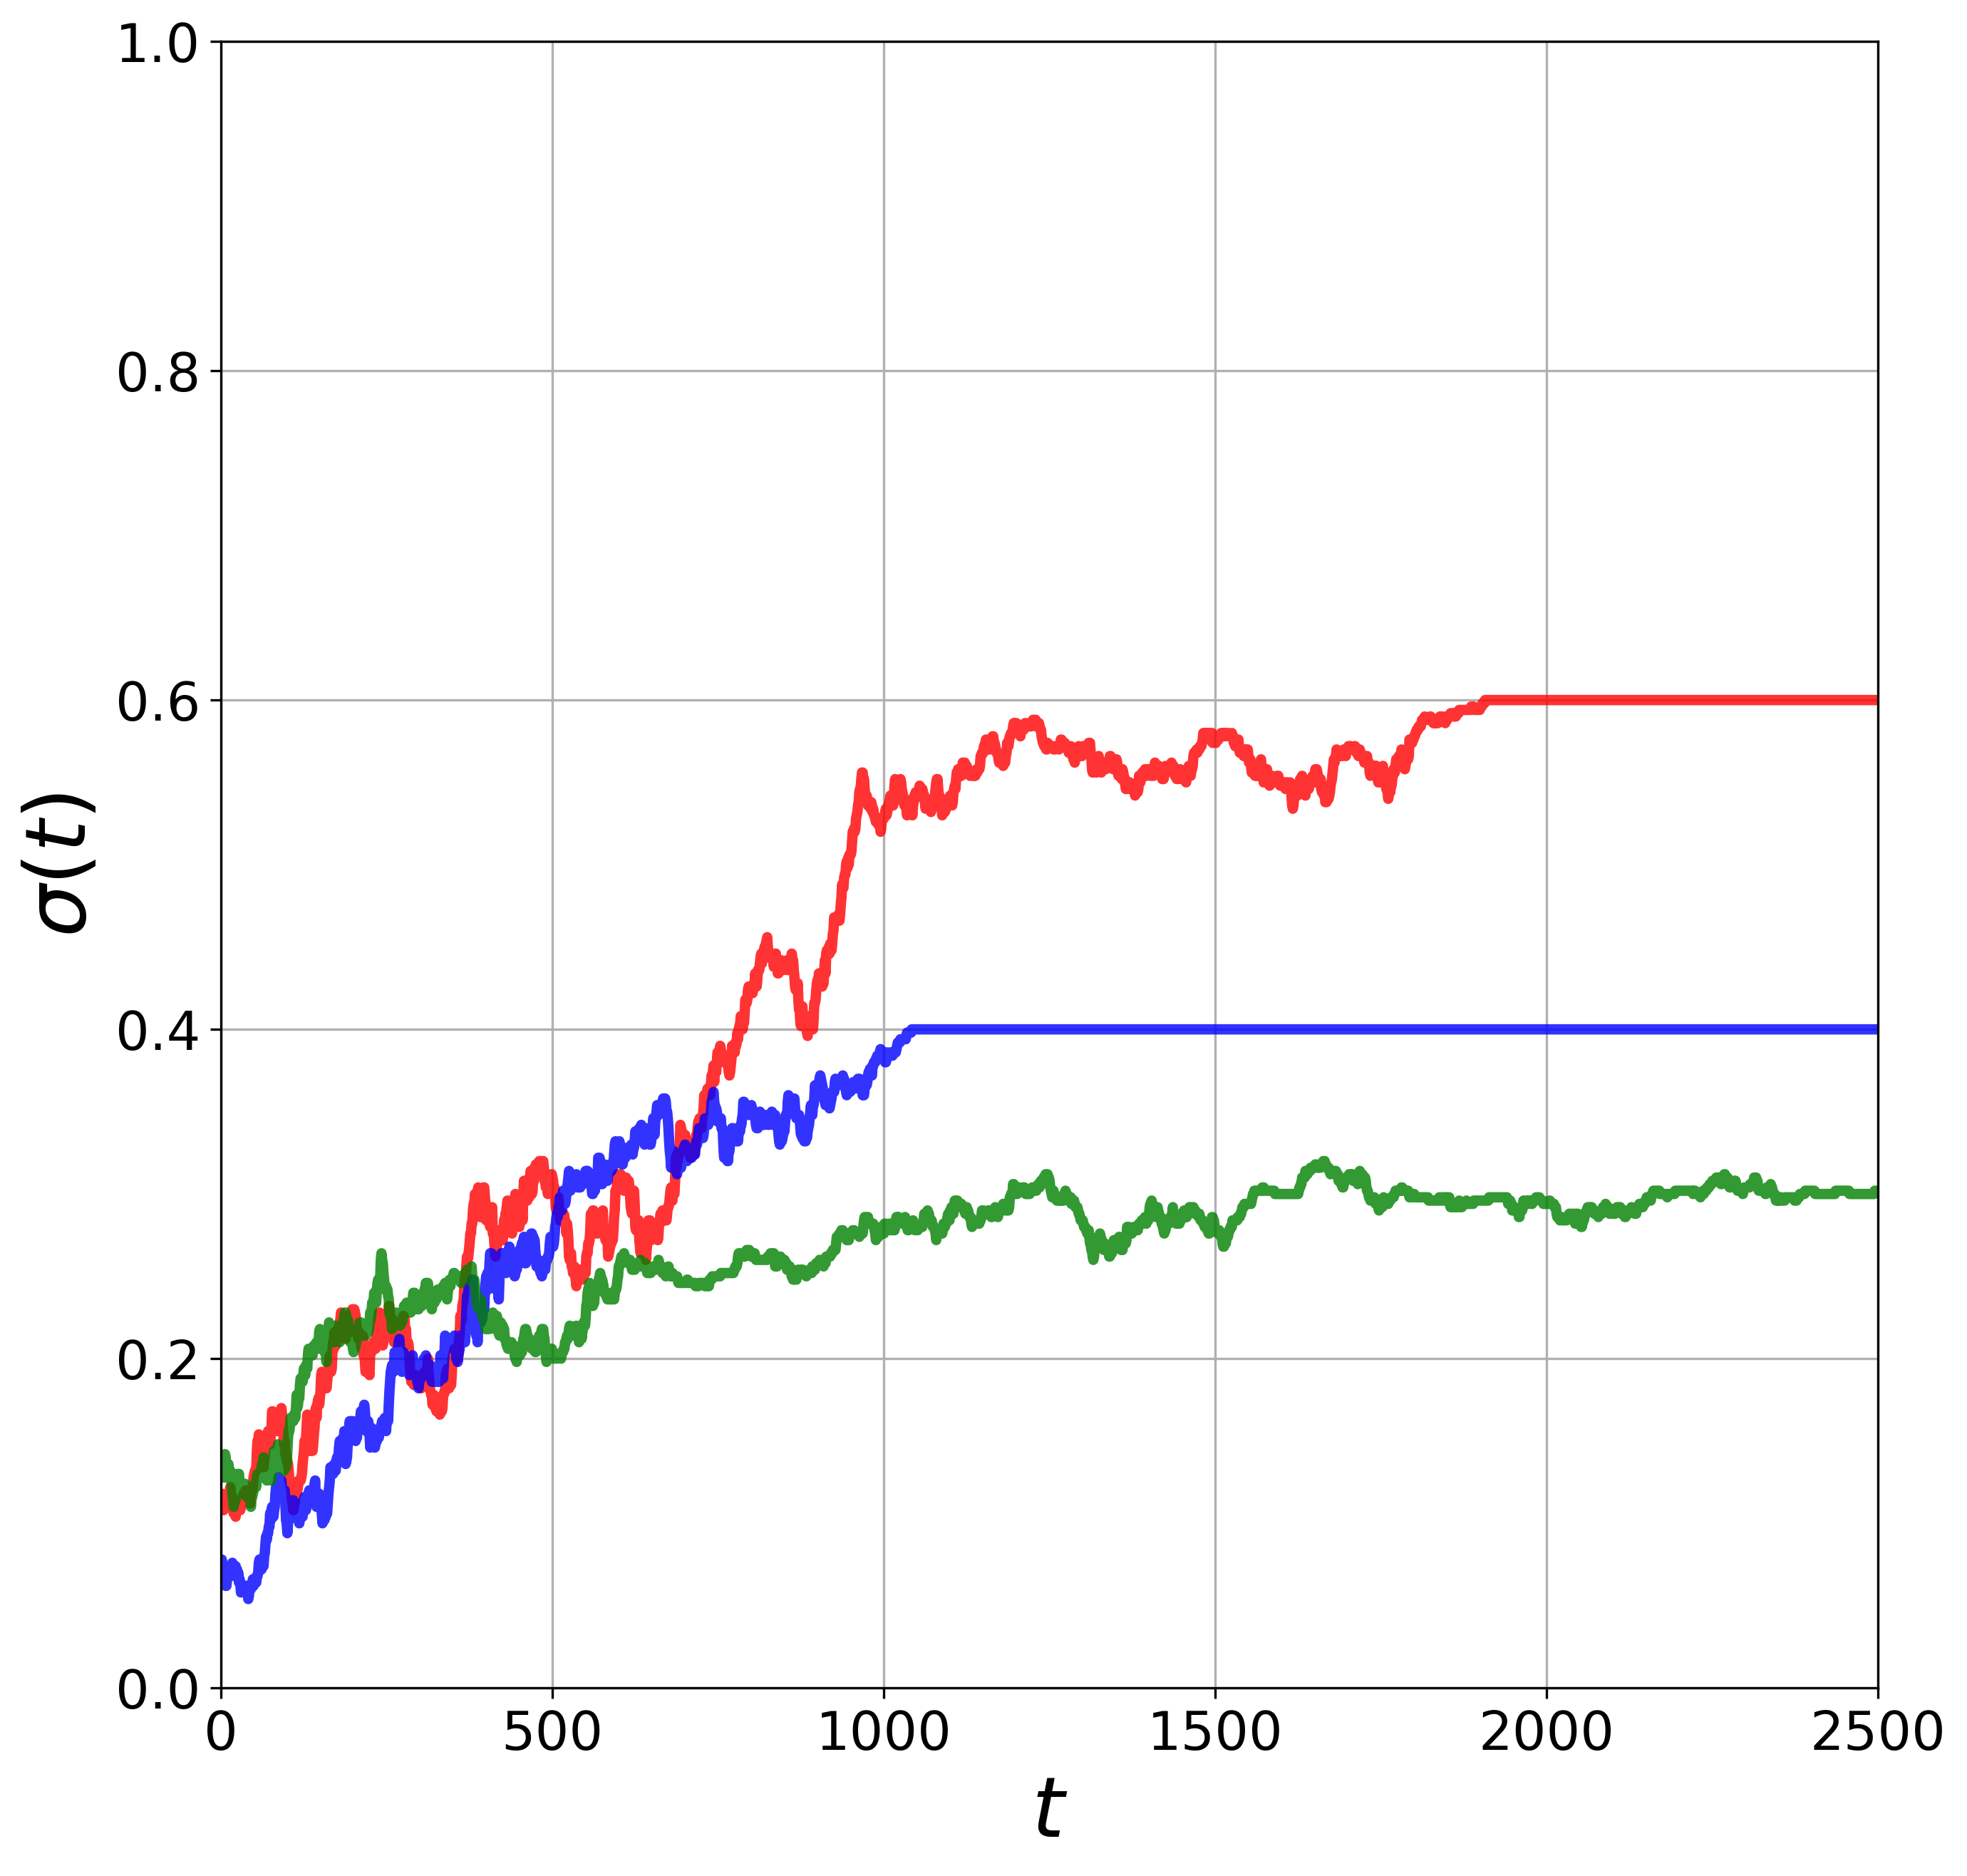

longstep_e220.png:
caching SimulationDirectory for LongstepSimulation on ring(n=100,k=4), 200 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on er(n=100,m=220), 220 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on roc(k=20,l=5), 220 edges (5 runs)...



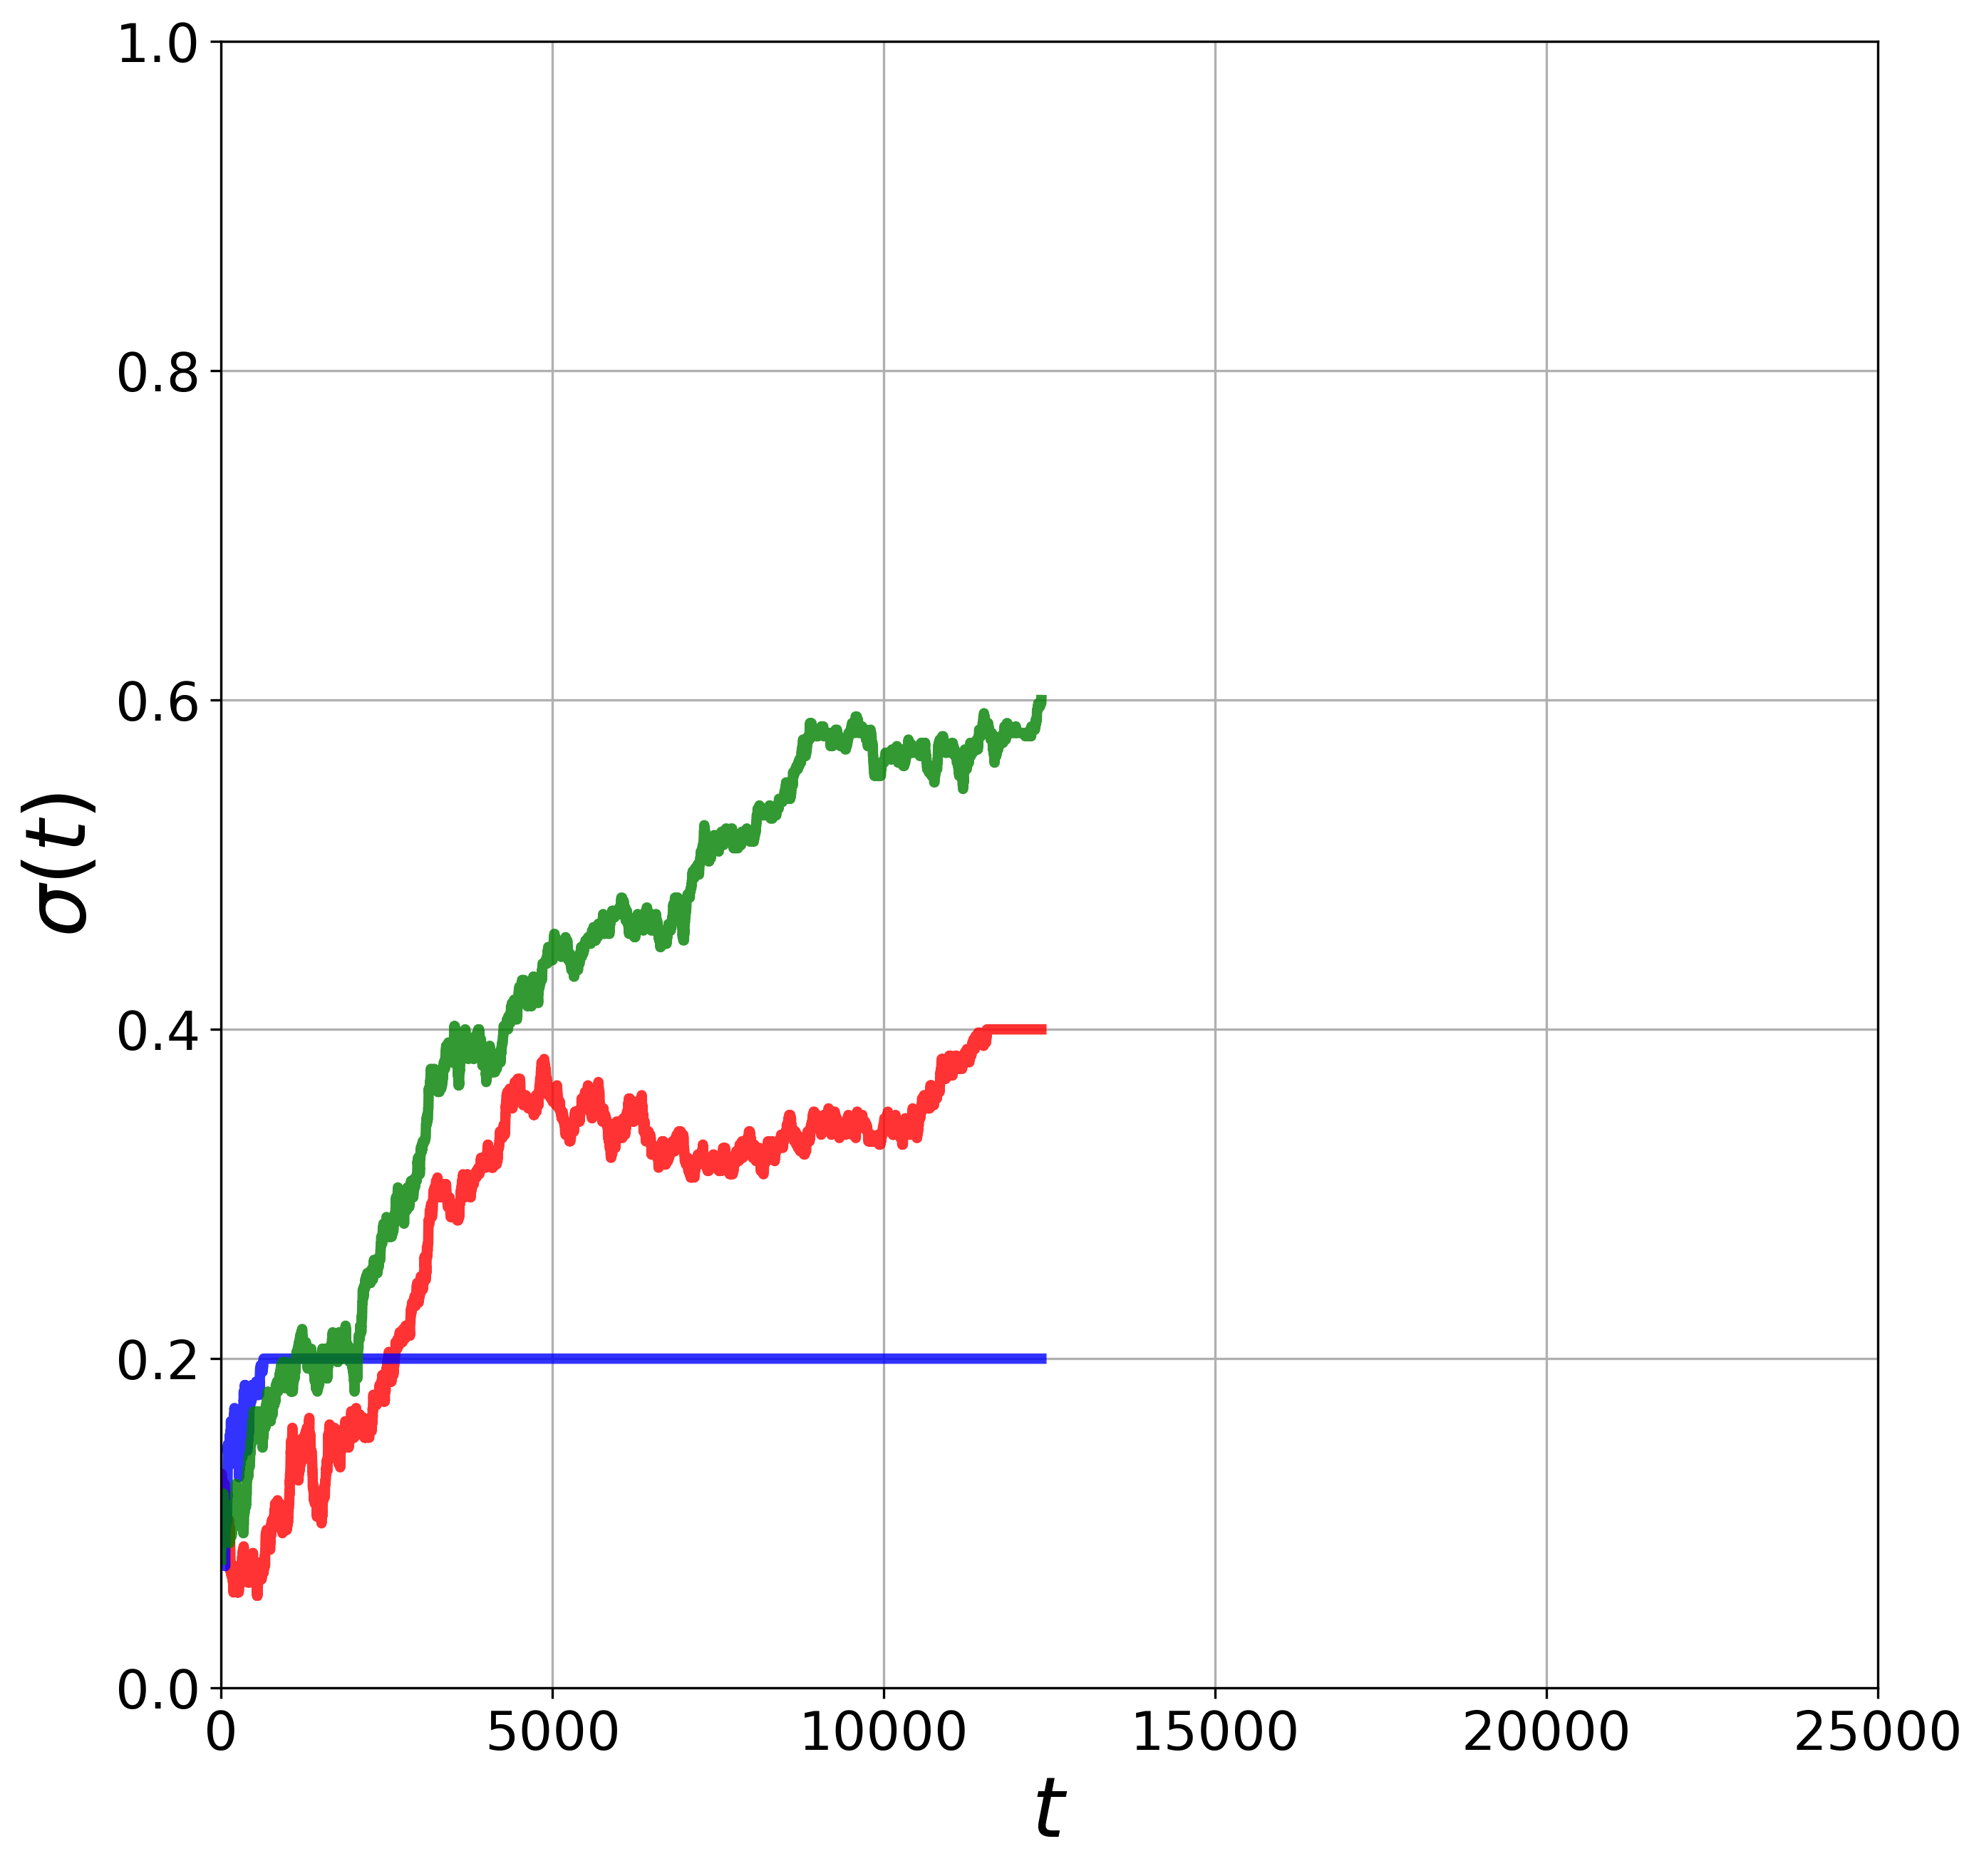

longstep_e460.png:
caching SimulationDirectory for LongstepSimulation on ring(n=100,k=10), 500 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on er(n=100,m=460), 460 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on roc(k=10,l=10), 460 edges (5 runs)...



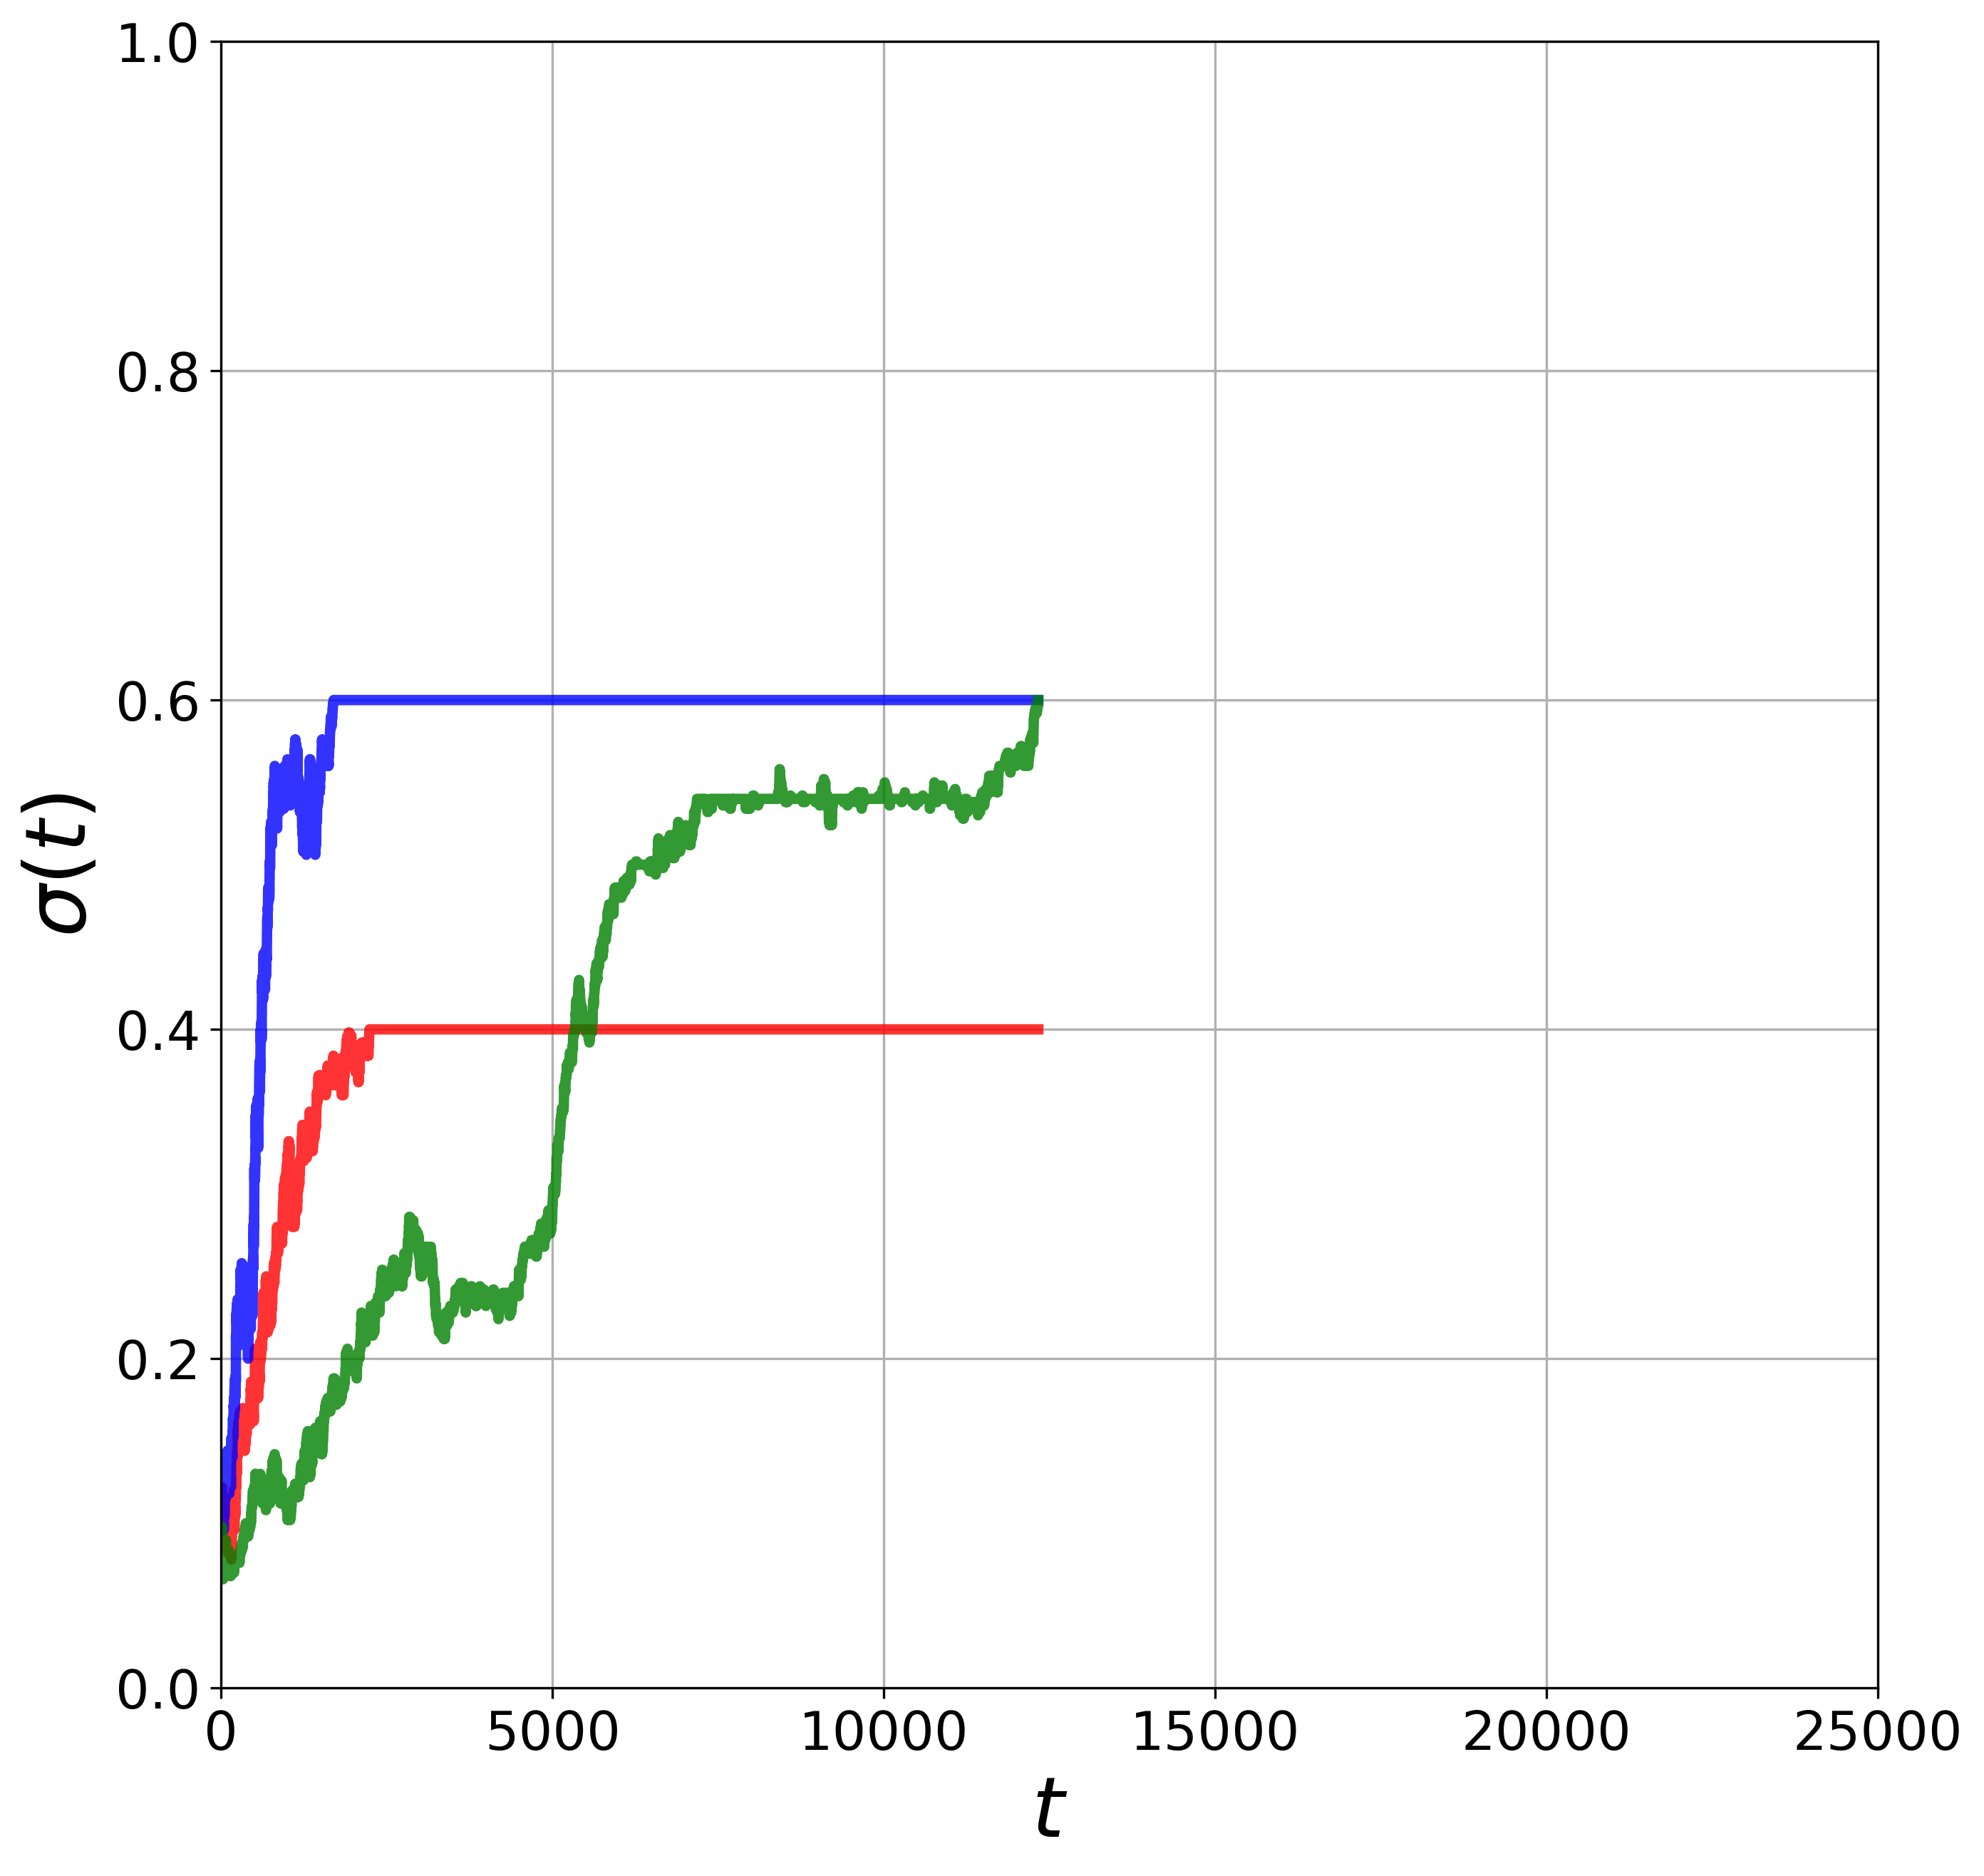

longstep_e1204.png:
caching SimulationDirectory for LongstepSimulation on ring(n=100,k=24), 1200 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on er(n=100,m=1204), 1204 edges (5 runs)...
caching SimulationDirectory for LongstepSimulation on roc(k=4,l=25), 1204 edges (5 runs)...



d:\Personal\University\sem8\ВКР\Код\Gevo\db.py:57: RuntimeWarning: Mean of empty slice.
  self.t_mean_1 = self.times[self.outcomes].mean()
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


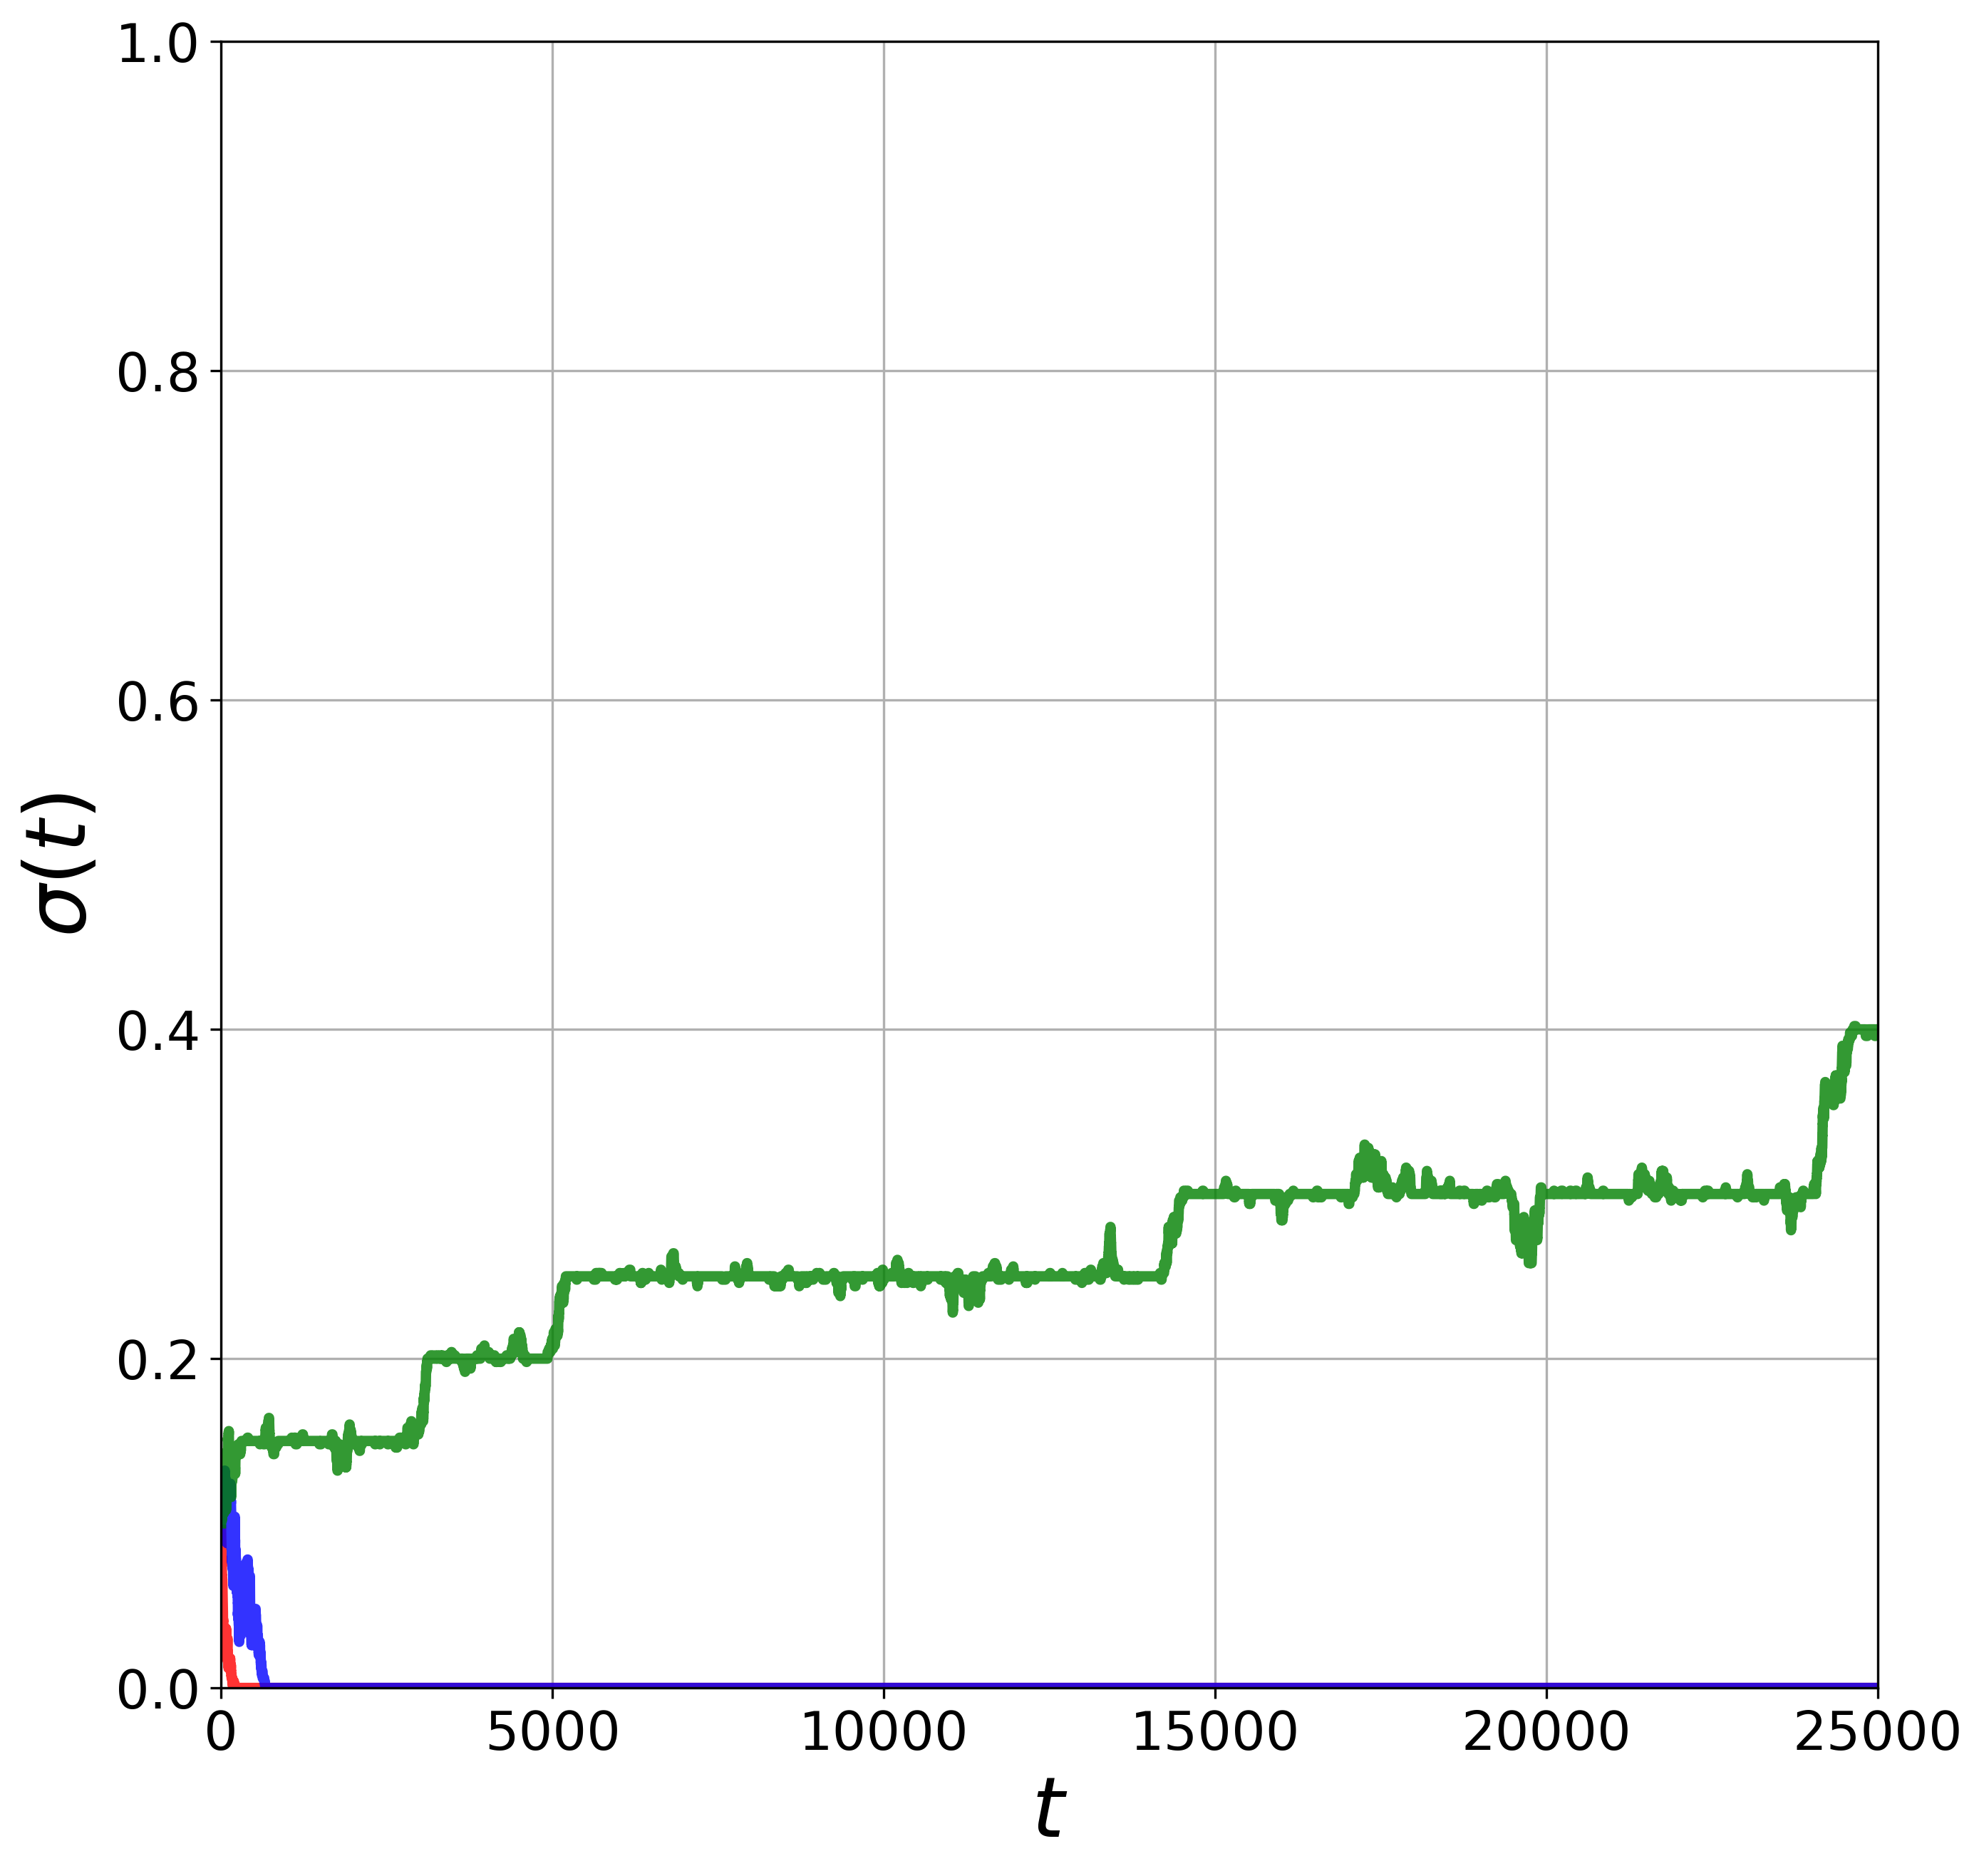

linear_e220_static.png:
caching SimulationDirectory for LinearSimulationStatic on ring(n=100,k=4), 200 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on er(n=100,m=220), 220 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on roc(k=20,l=5), 220 edges (5 runs)...



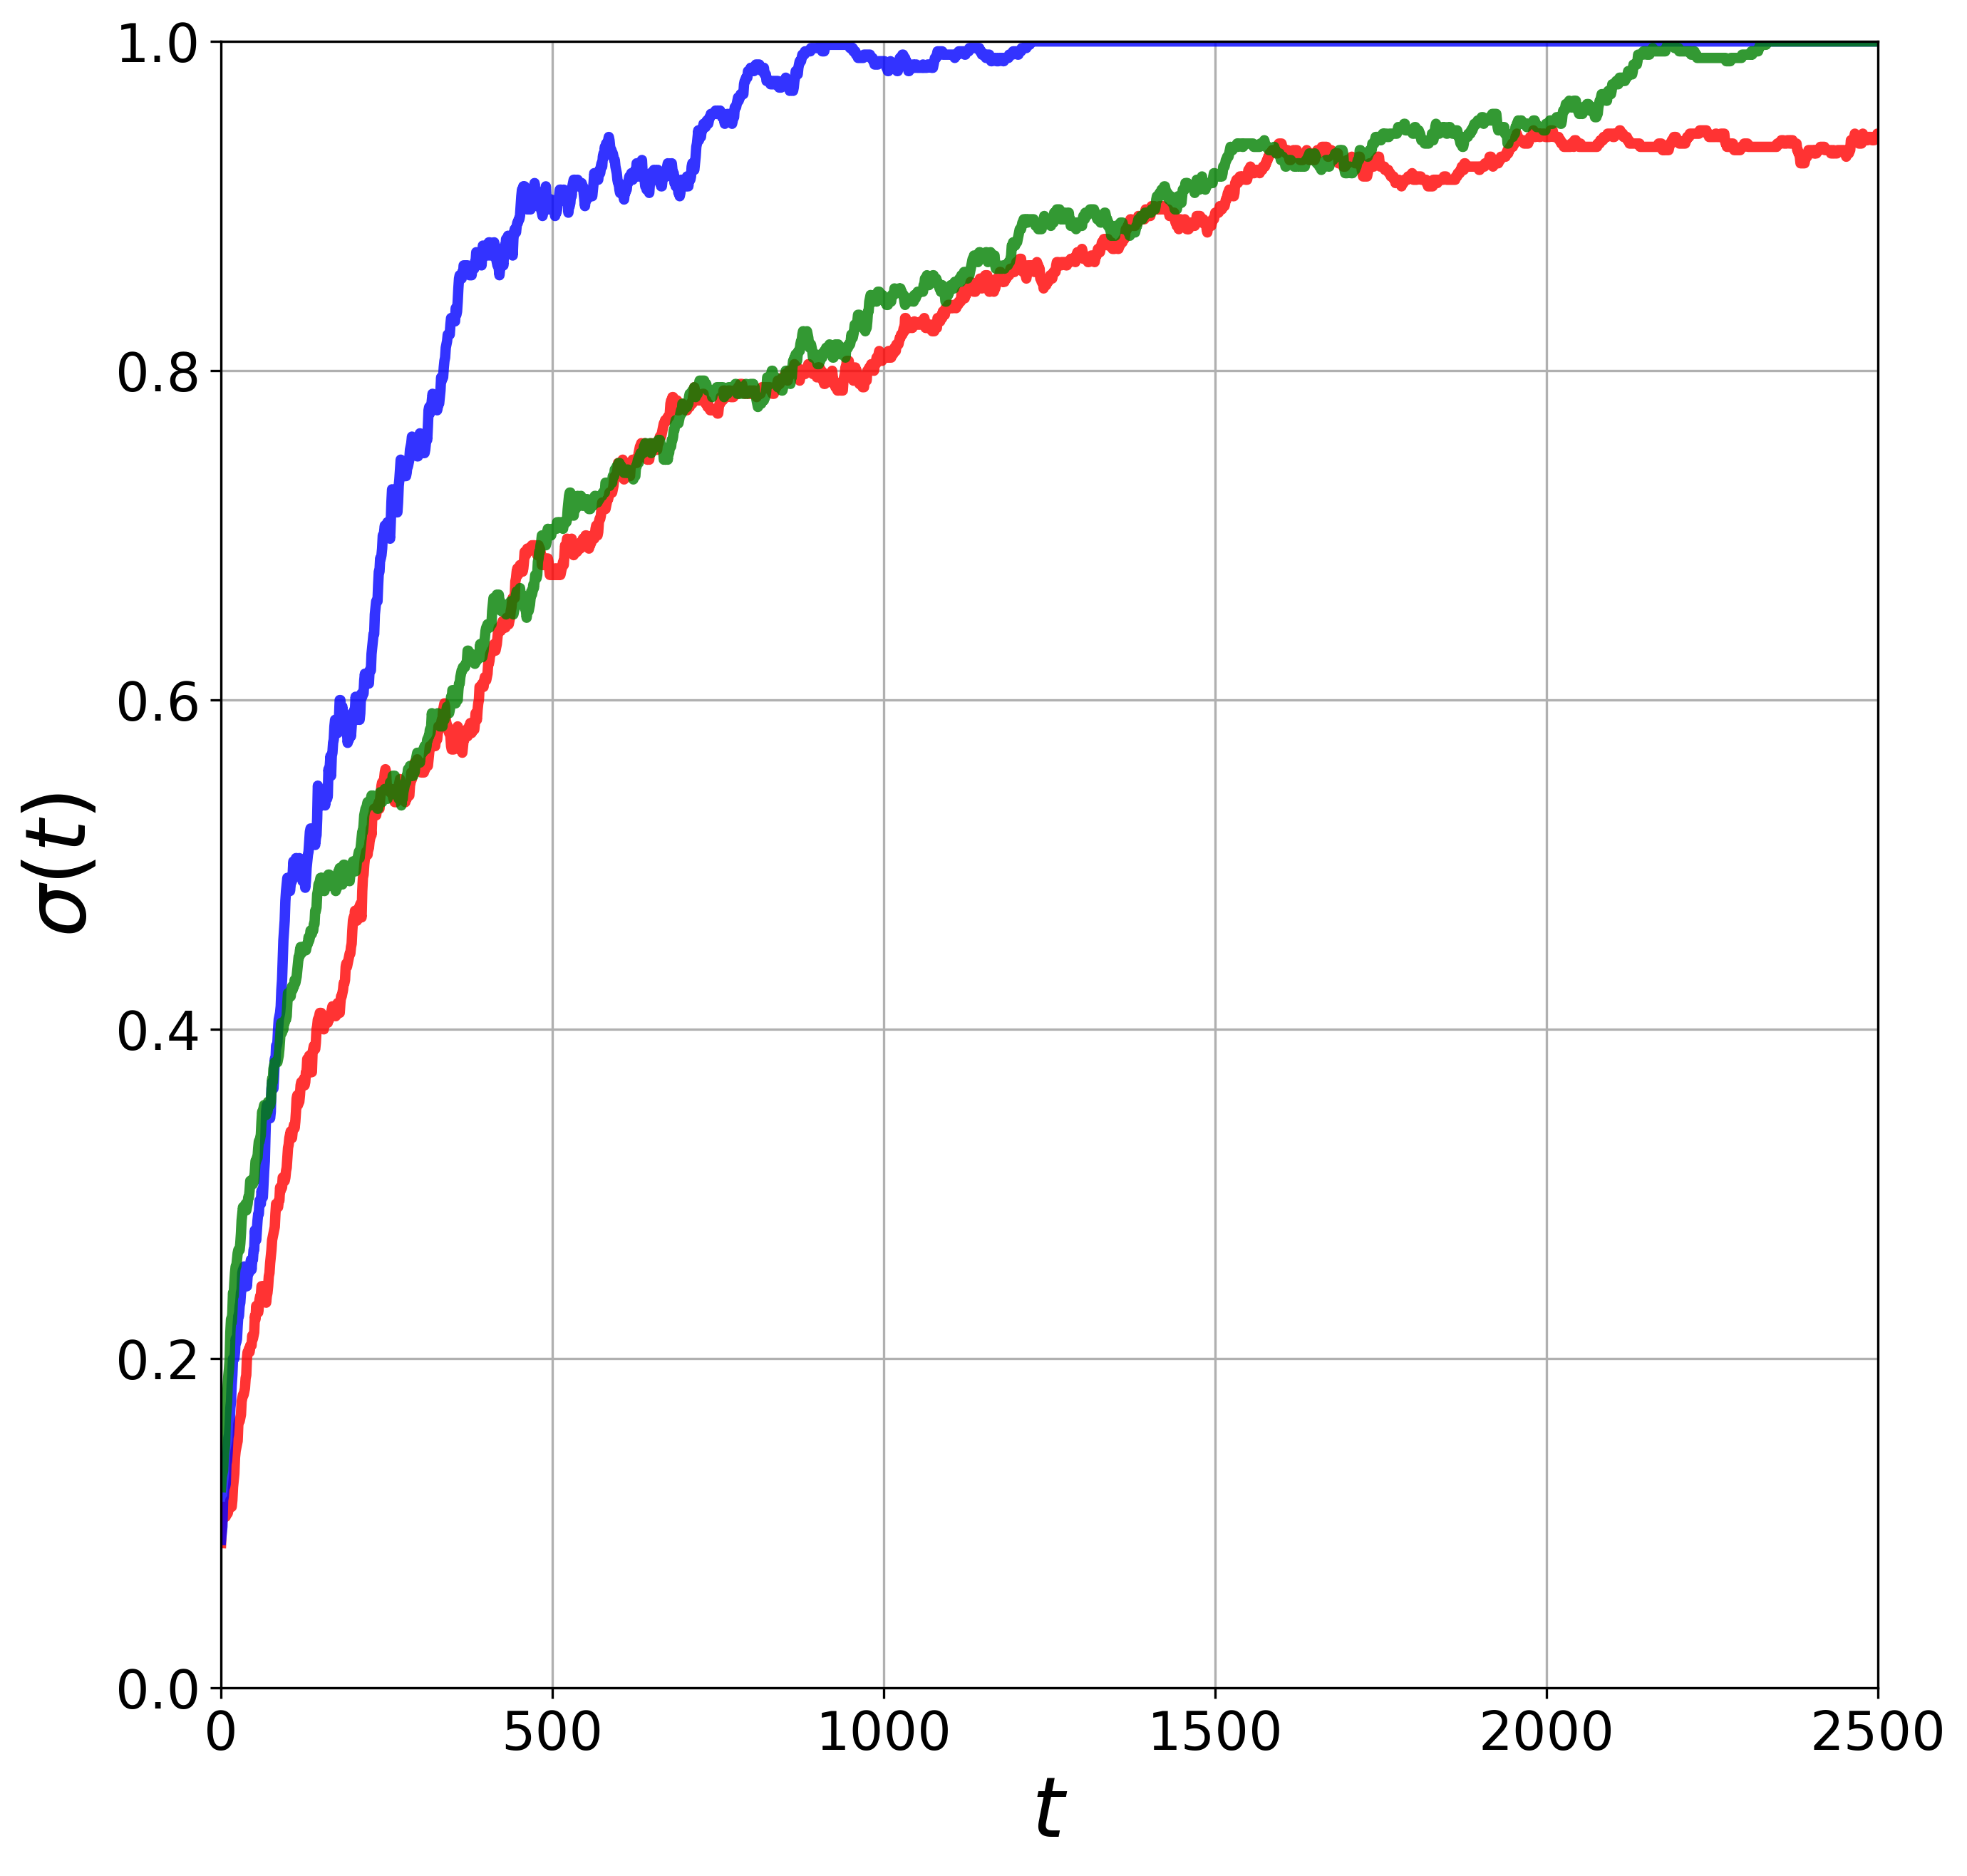

linear_e460_static.png:
caching SimulationDirectory for LinearSimulationStatic on ring(n=100,k=10), 500 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on er(n=100,m=460), 460 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on roc(k=10,l=10), 460 edges (5 runs)...



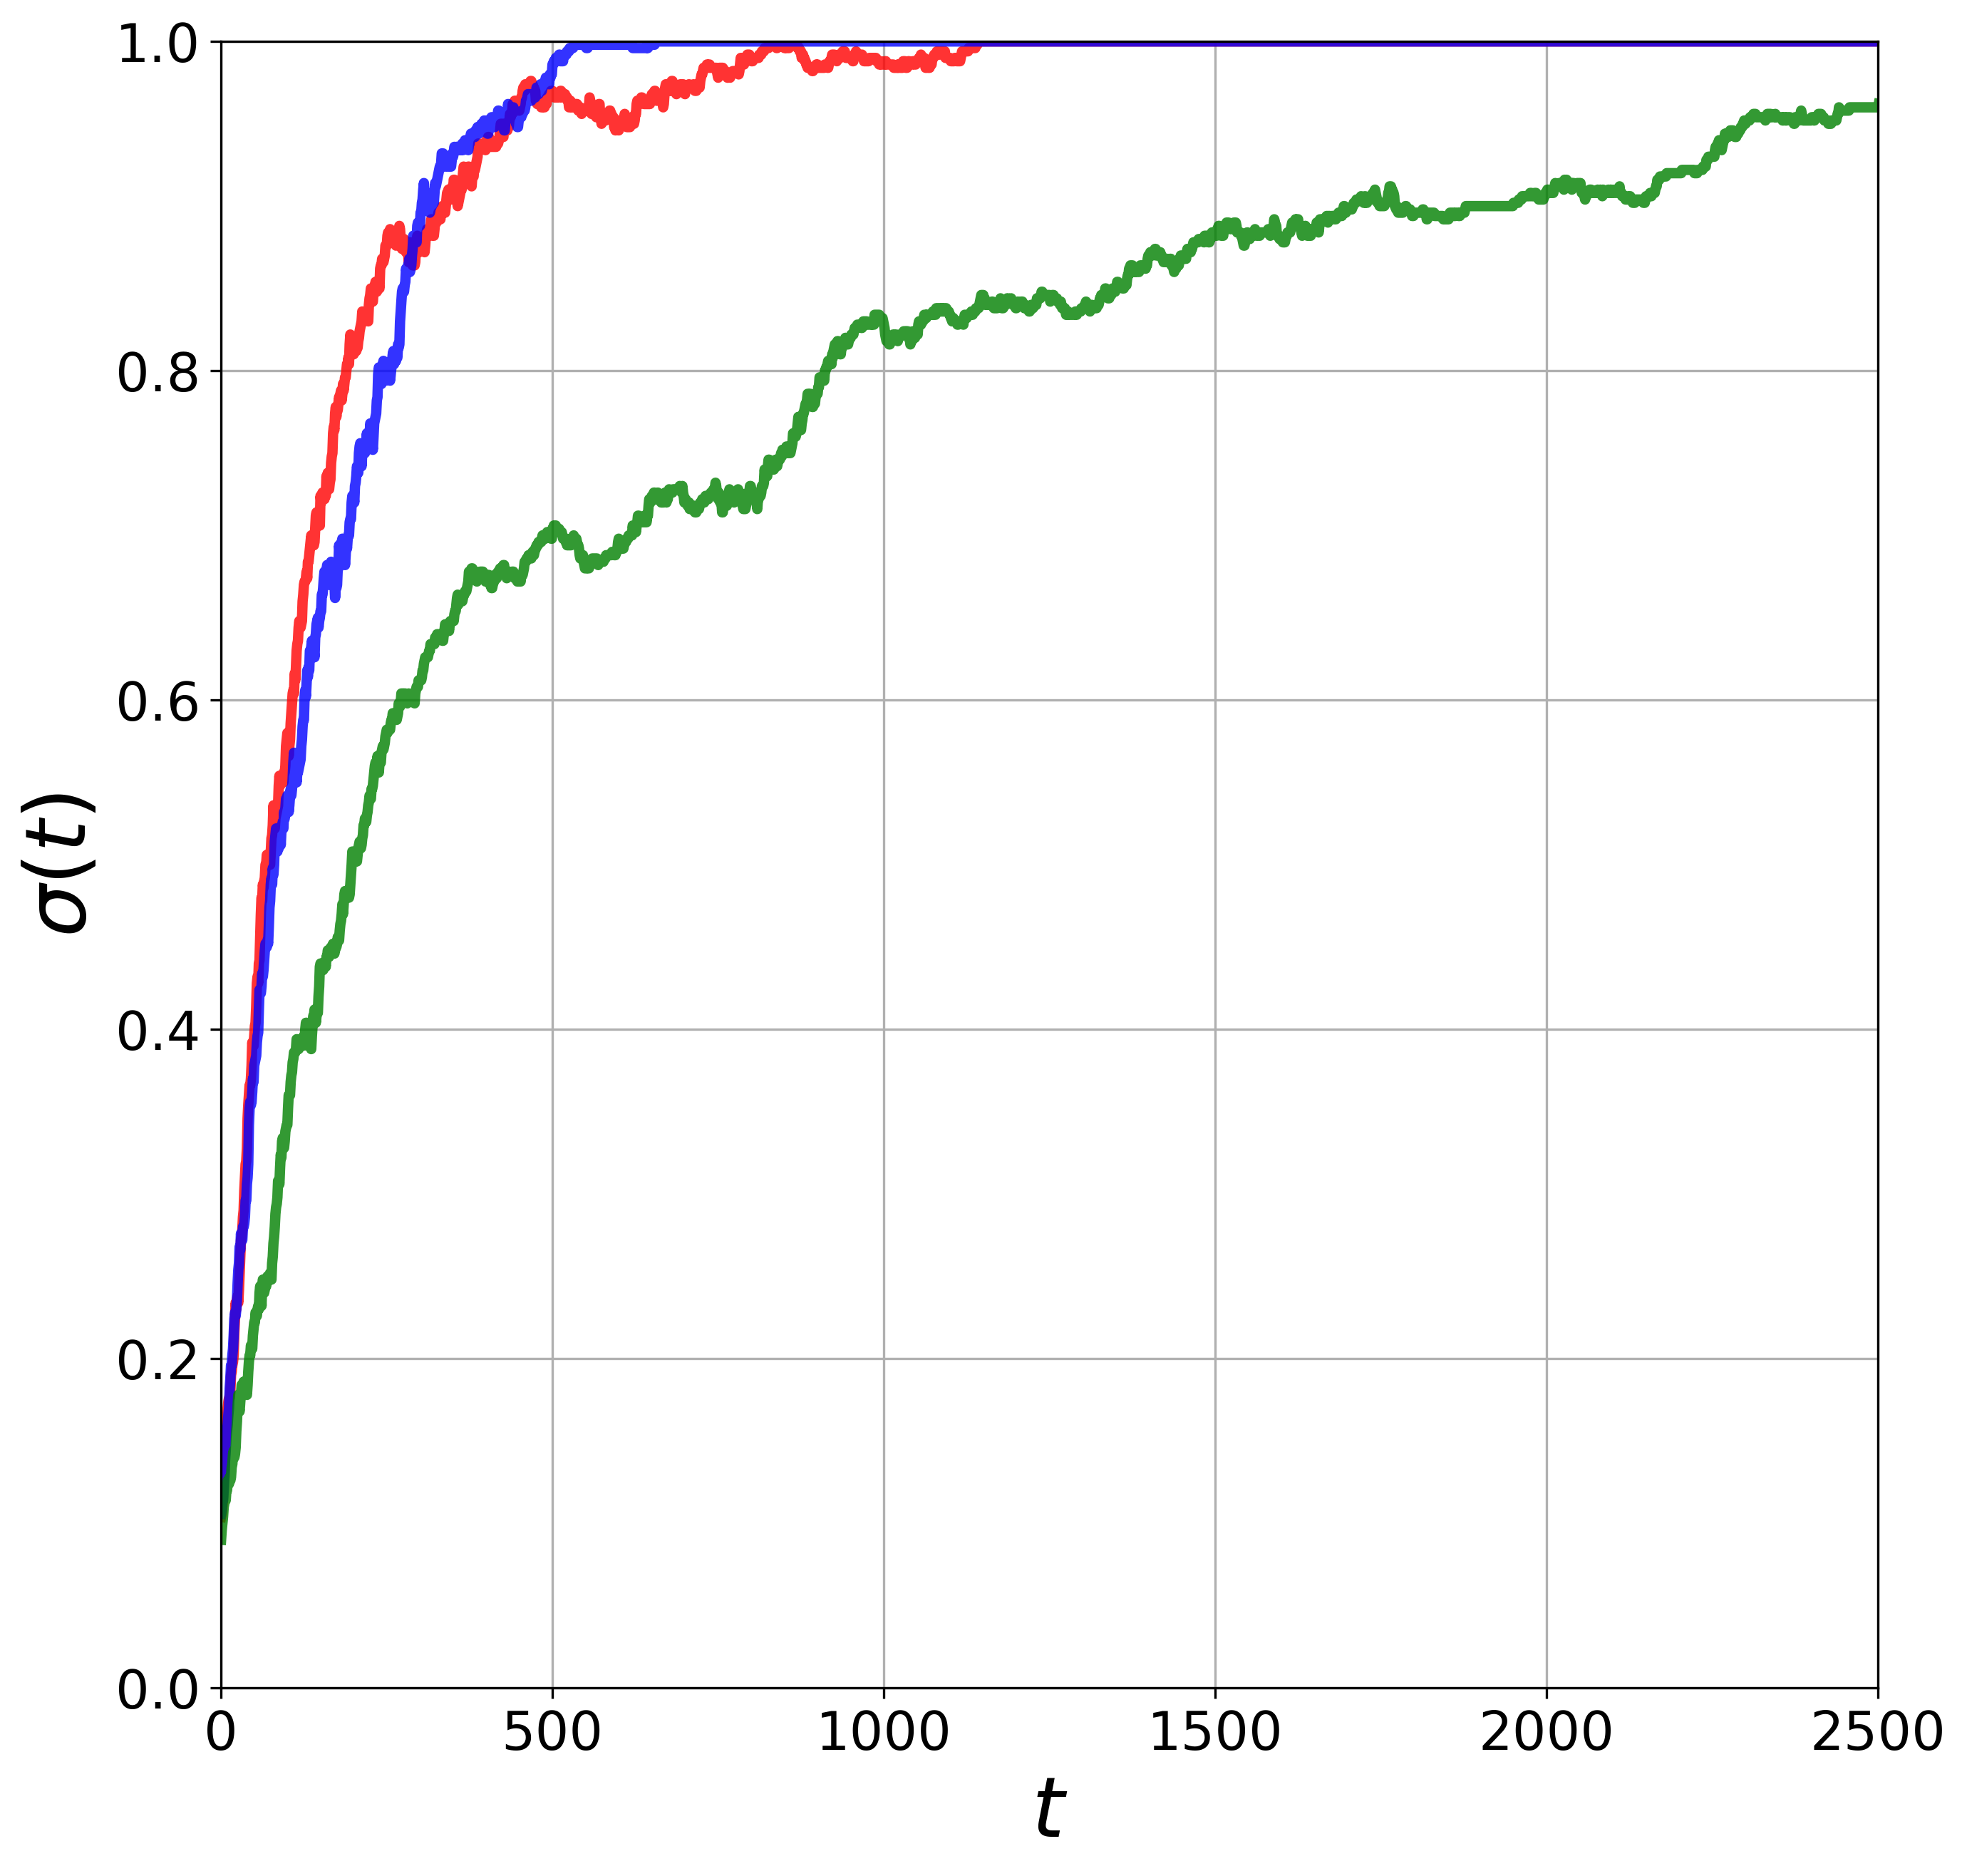

linear_e1204_static.png:
caching SimulationDirectory for LinearSimulationStatic on ring(n=100,k=24), 1200 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on er(n=100,m=1204), 1204 edges (5 runs)...
caching SimulationDirectory for LinearSimulationStatic on roc(k=4,l=25), 1204 edges (5 runs)...



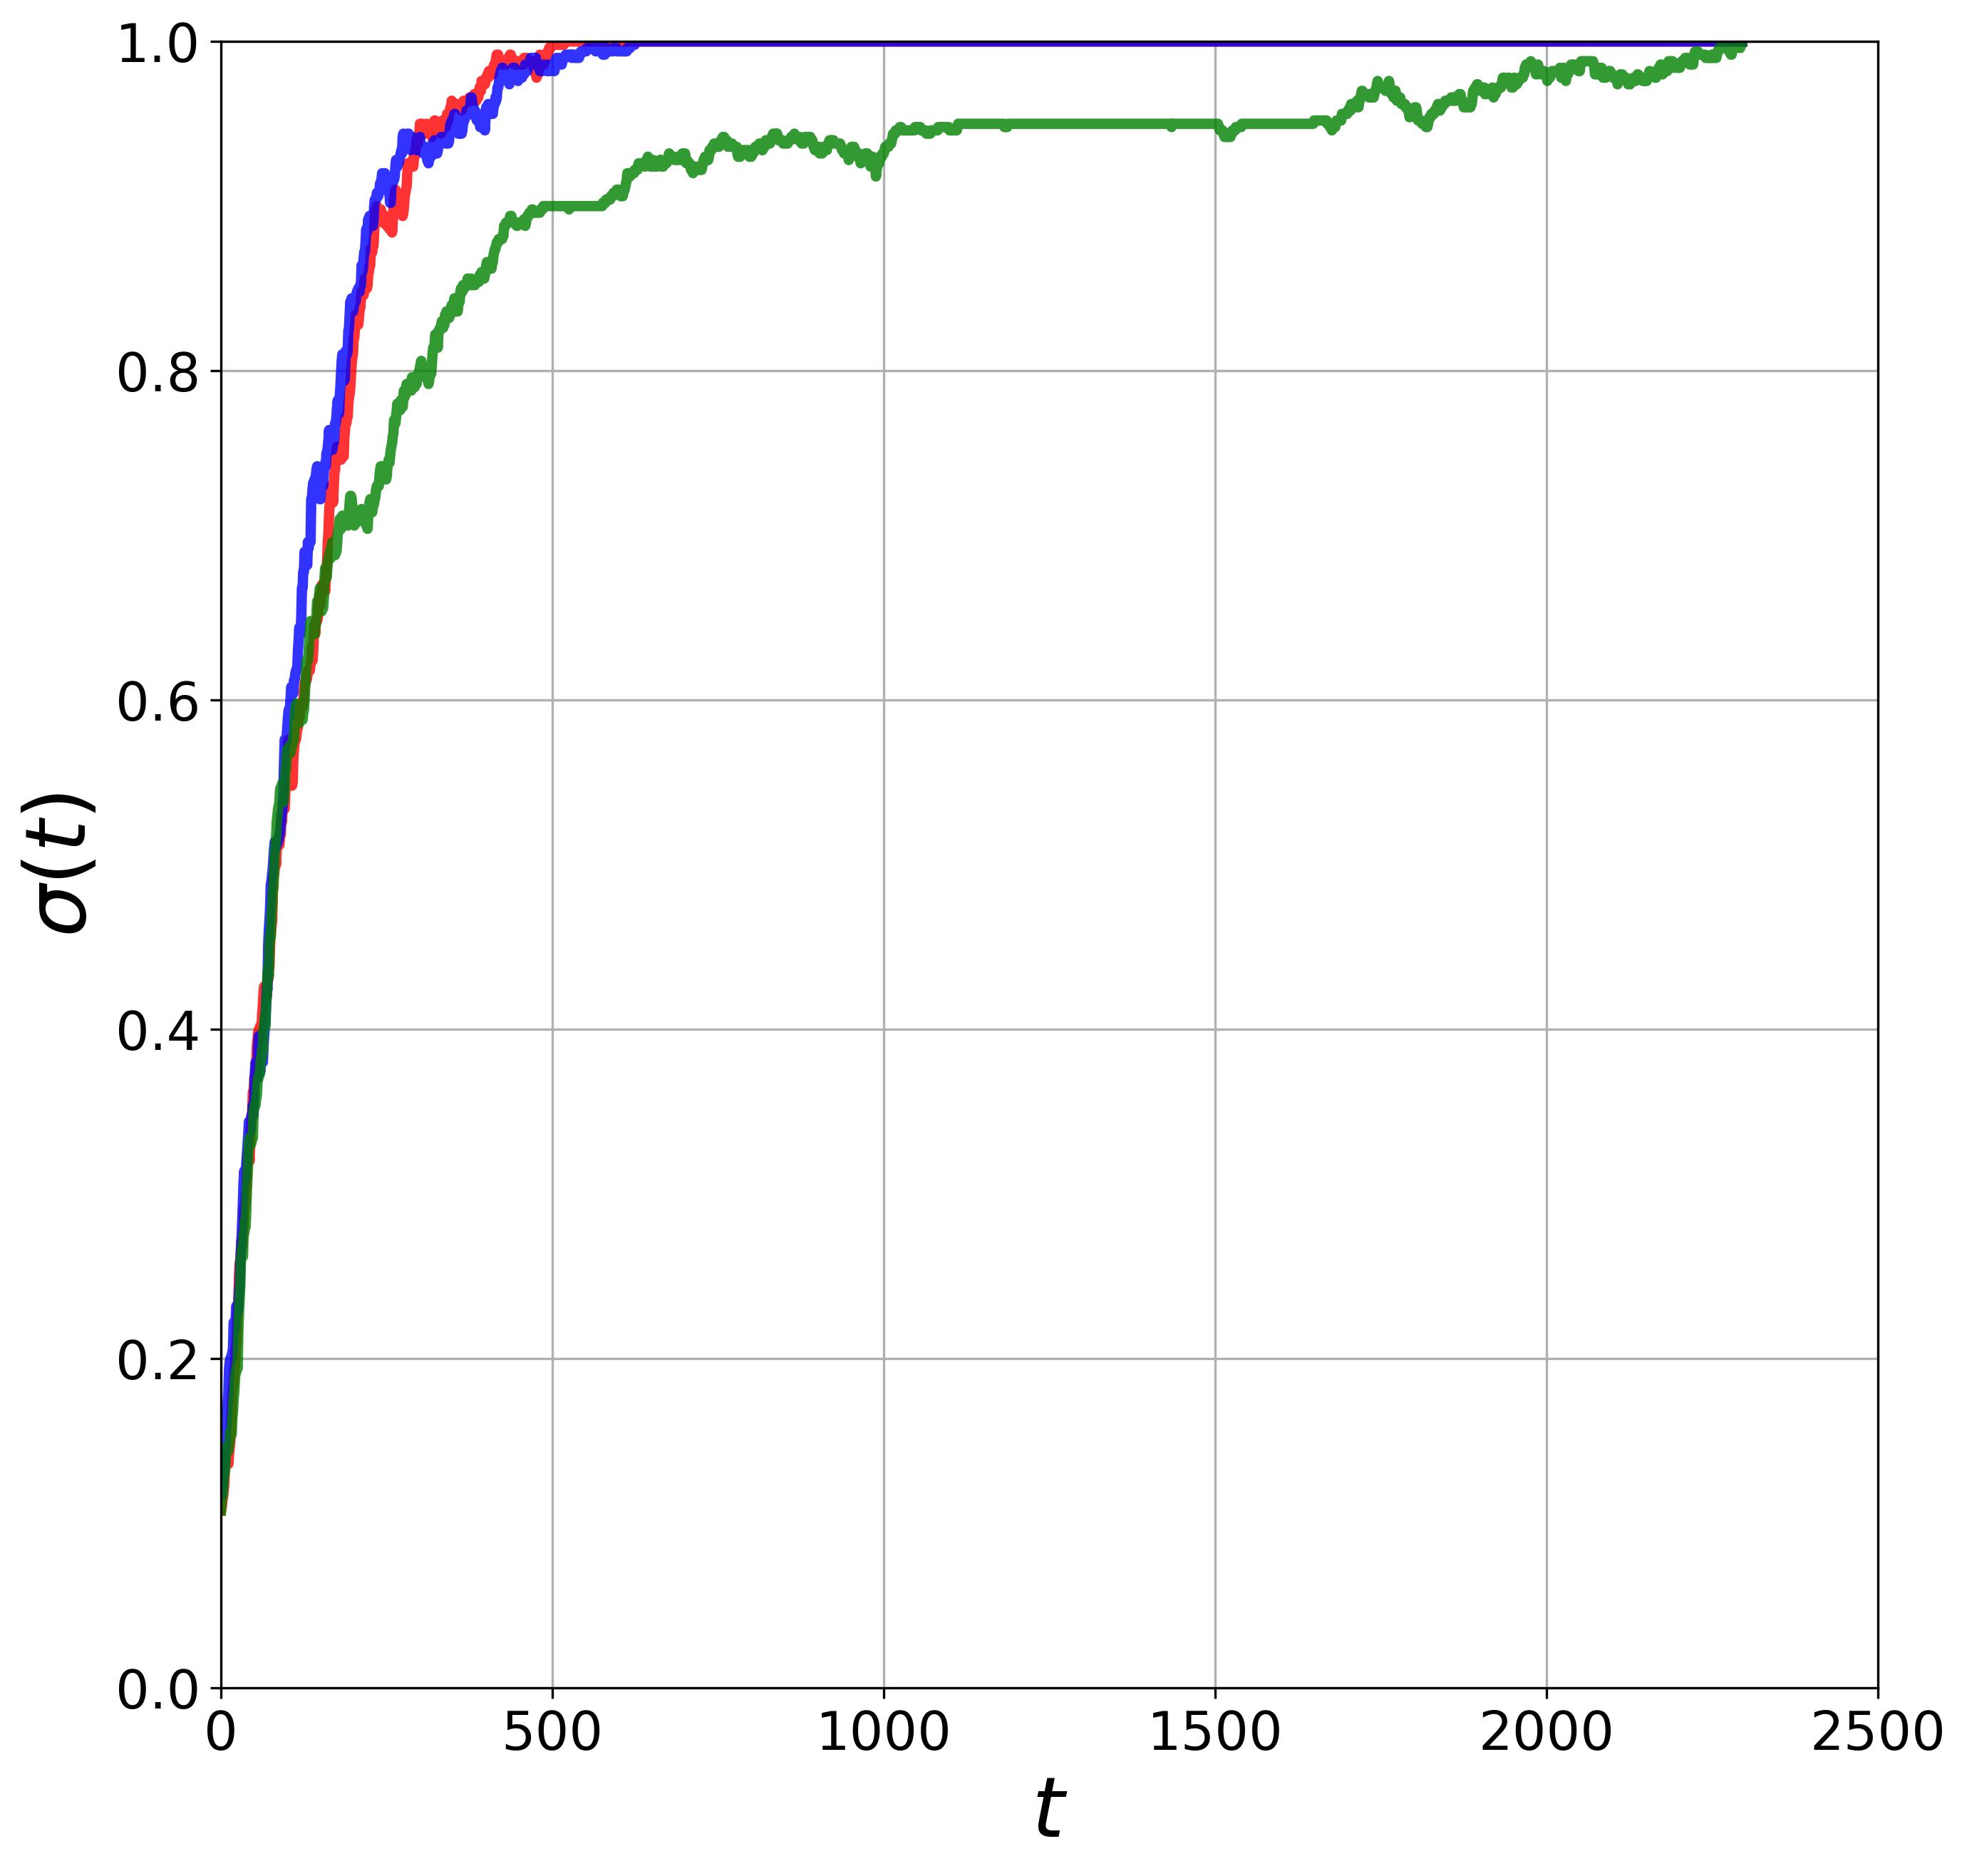

longstep_e220_static.png:
caching SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=4), 200 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on er(n=100,m=220), 220 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on roc(k=20,l=5), 220 edges (5 runs)...



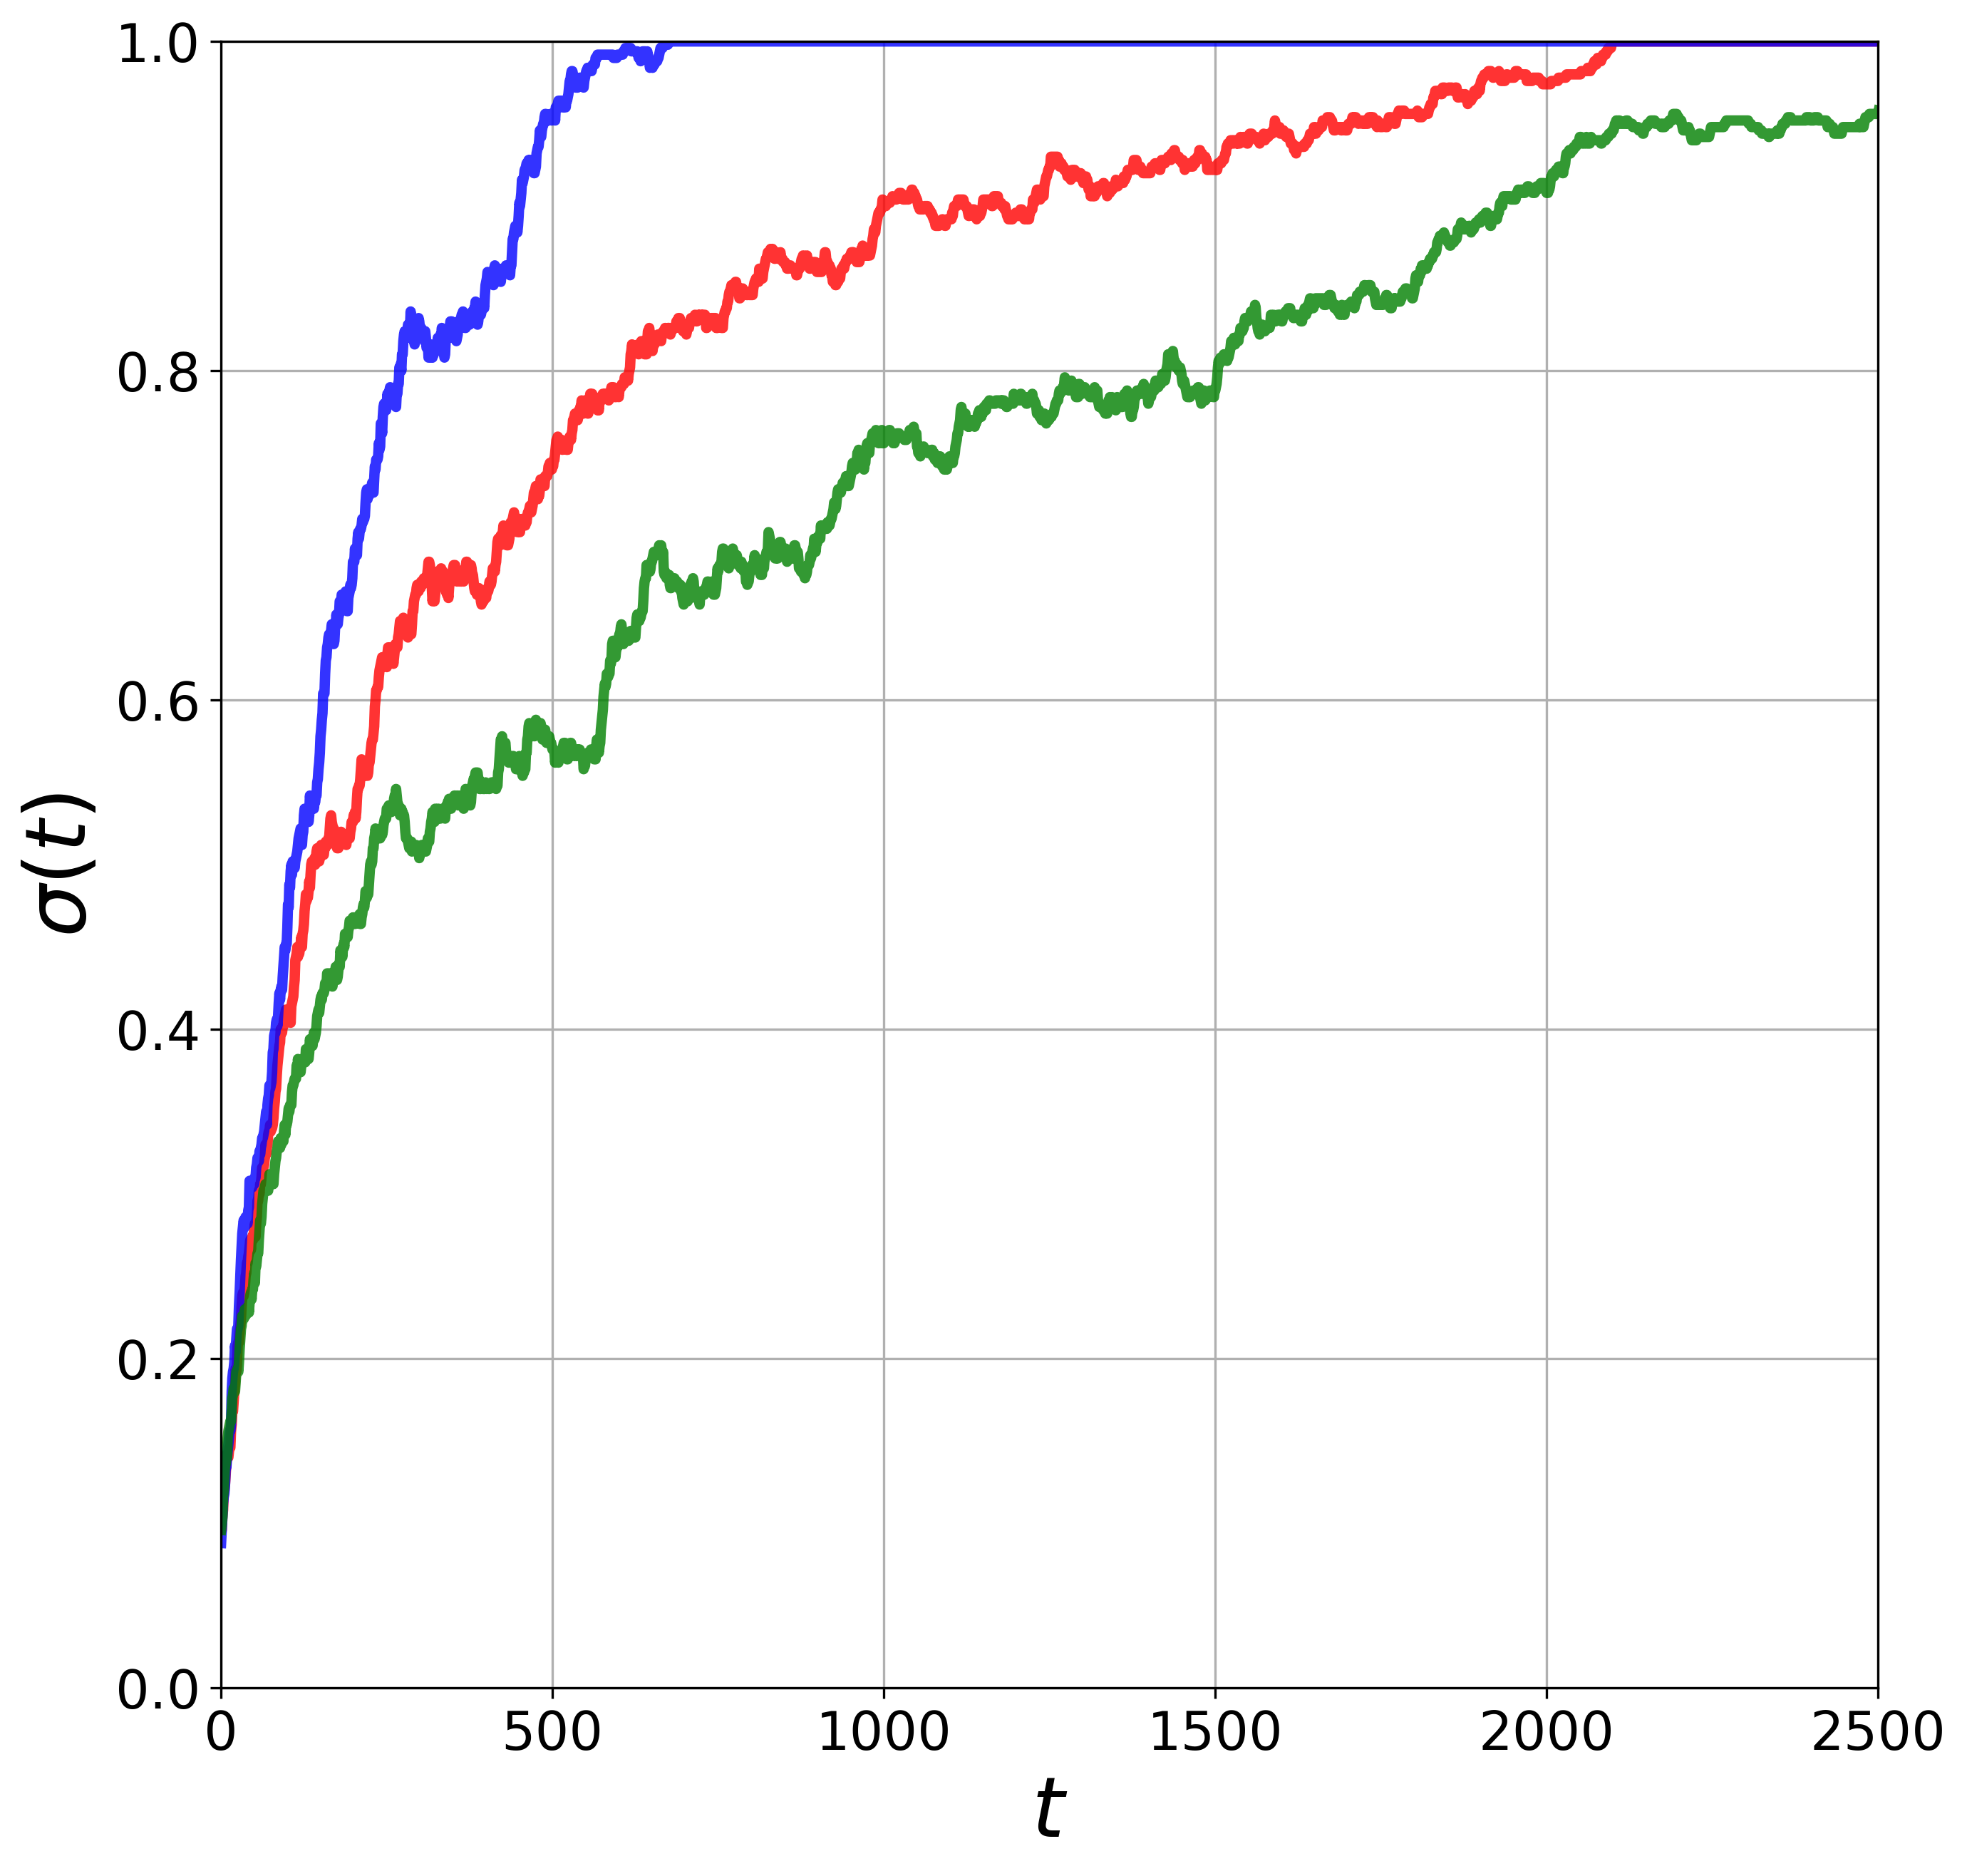

longstep_e460_static.png:
caching SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=10), 500 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on er(n=100,m=460), 460 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on roc(k=10,l=10), 460 edges (5 runs)...



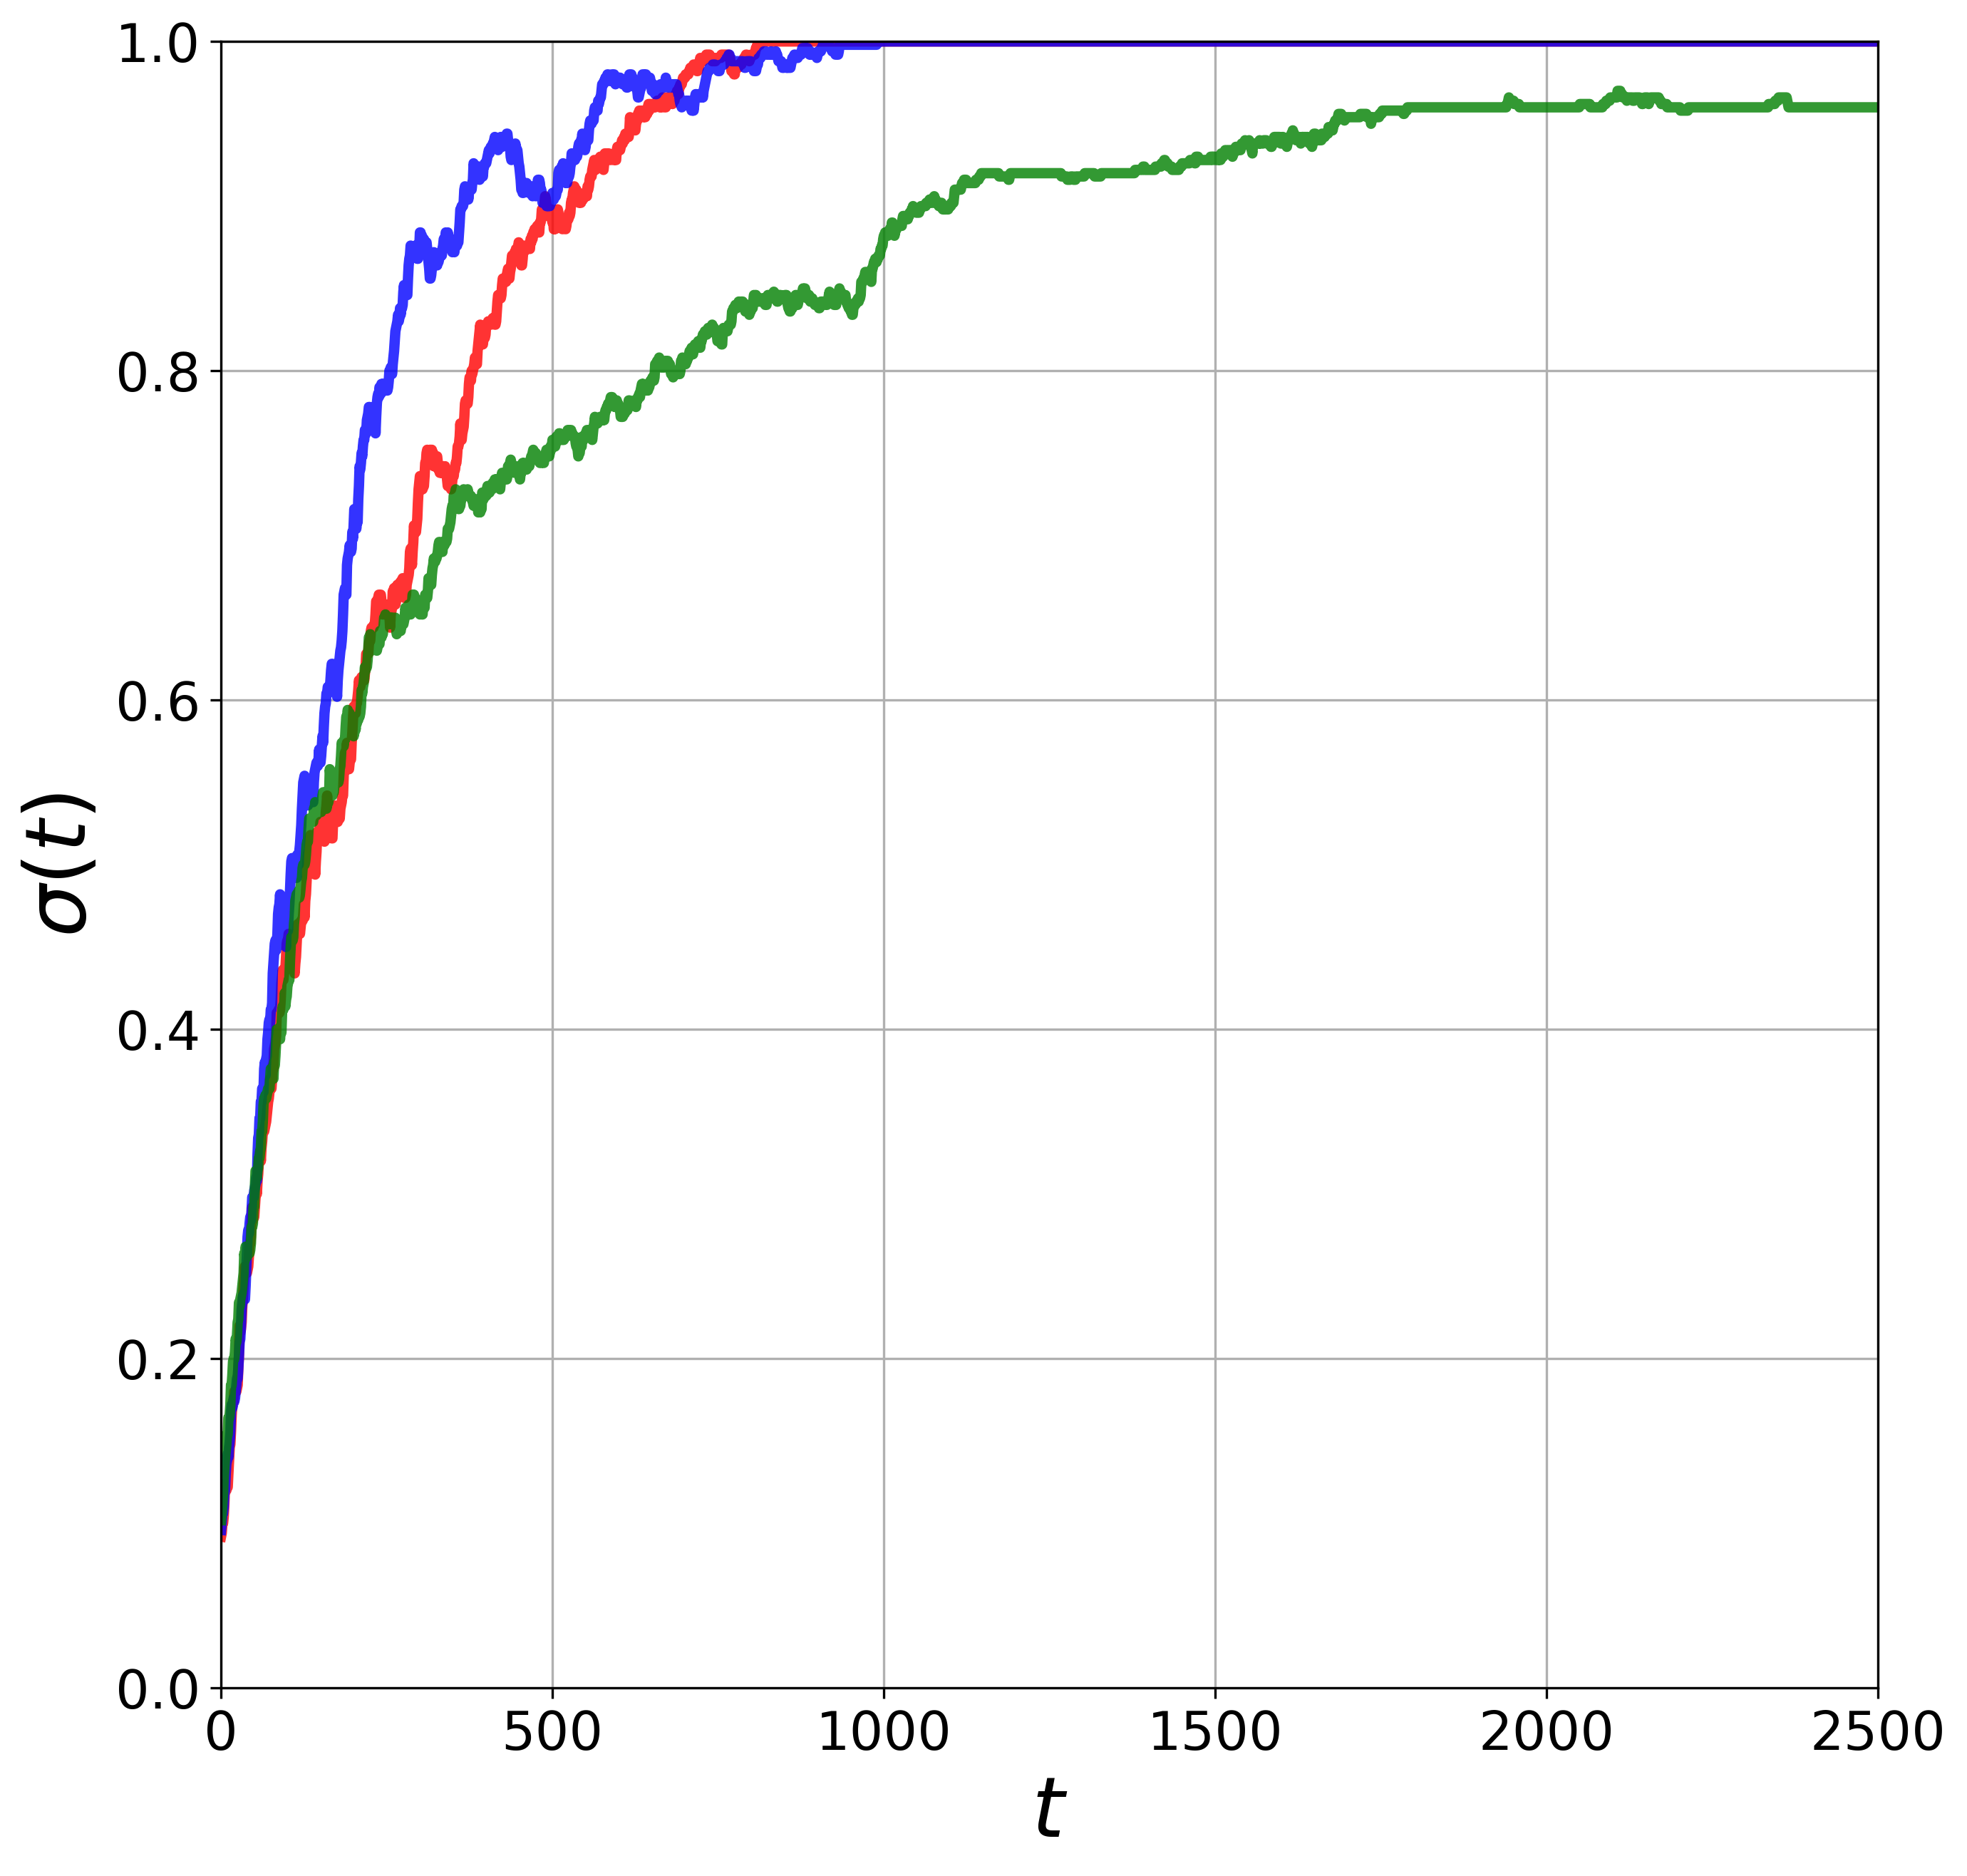

longstep_e1204_static.png:
caching SimulationDirectory for LongstepSimulationStatic on ring(n=100,k=24), 1200 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on er(n=100,m=1204), 1204 edges (5 runs)...
caching SimulationDirectory for LongstepSimulationStatic on roc(k=4,l=25), 1204 edges (5 runs)...



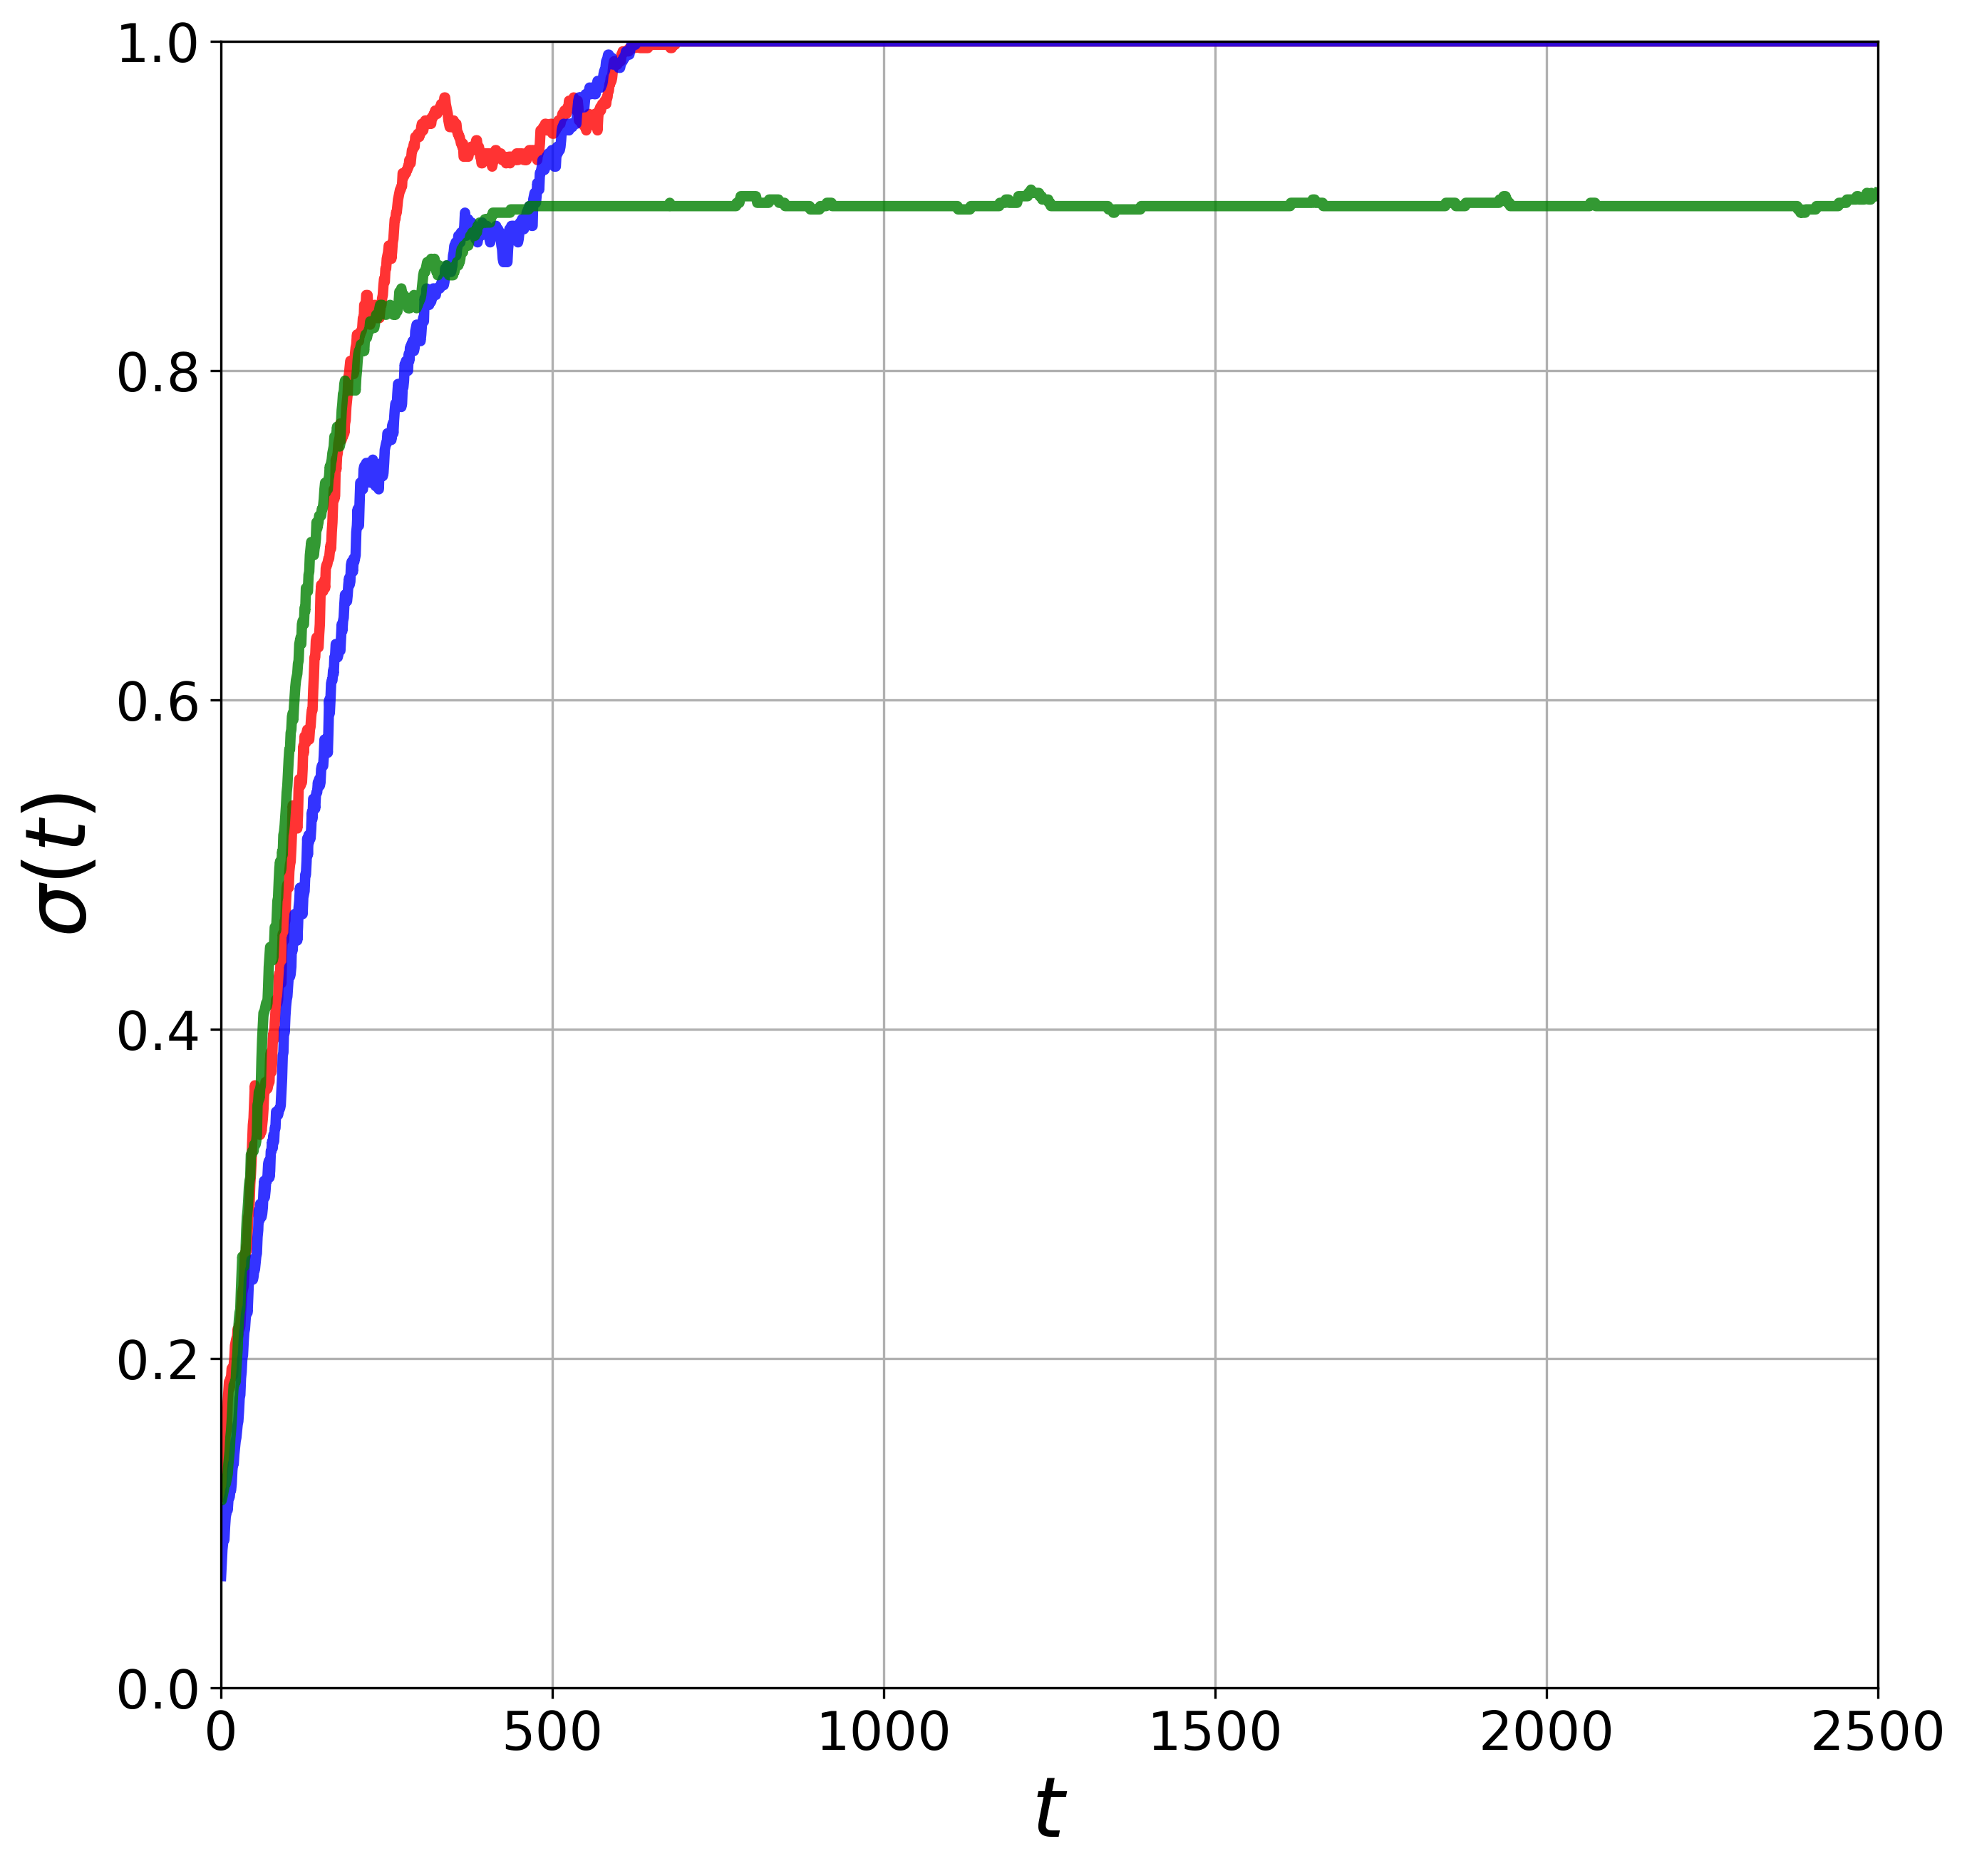

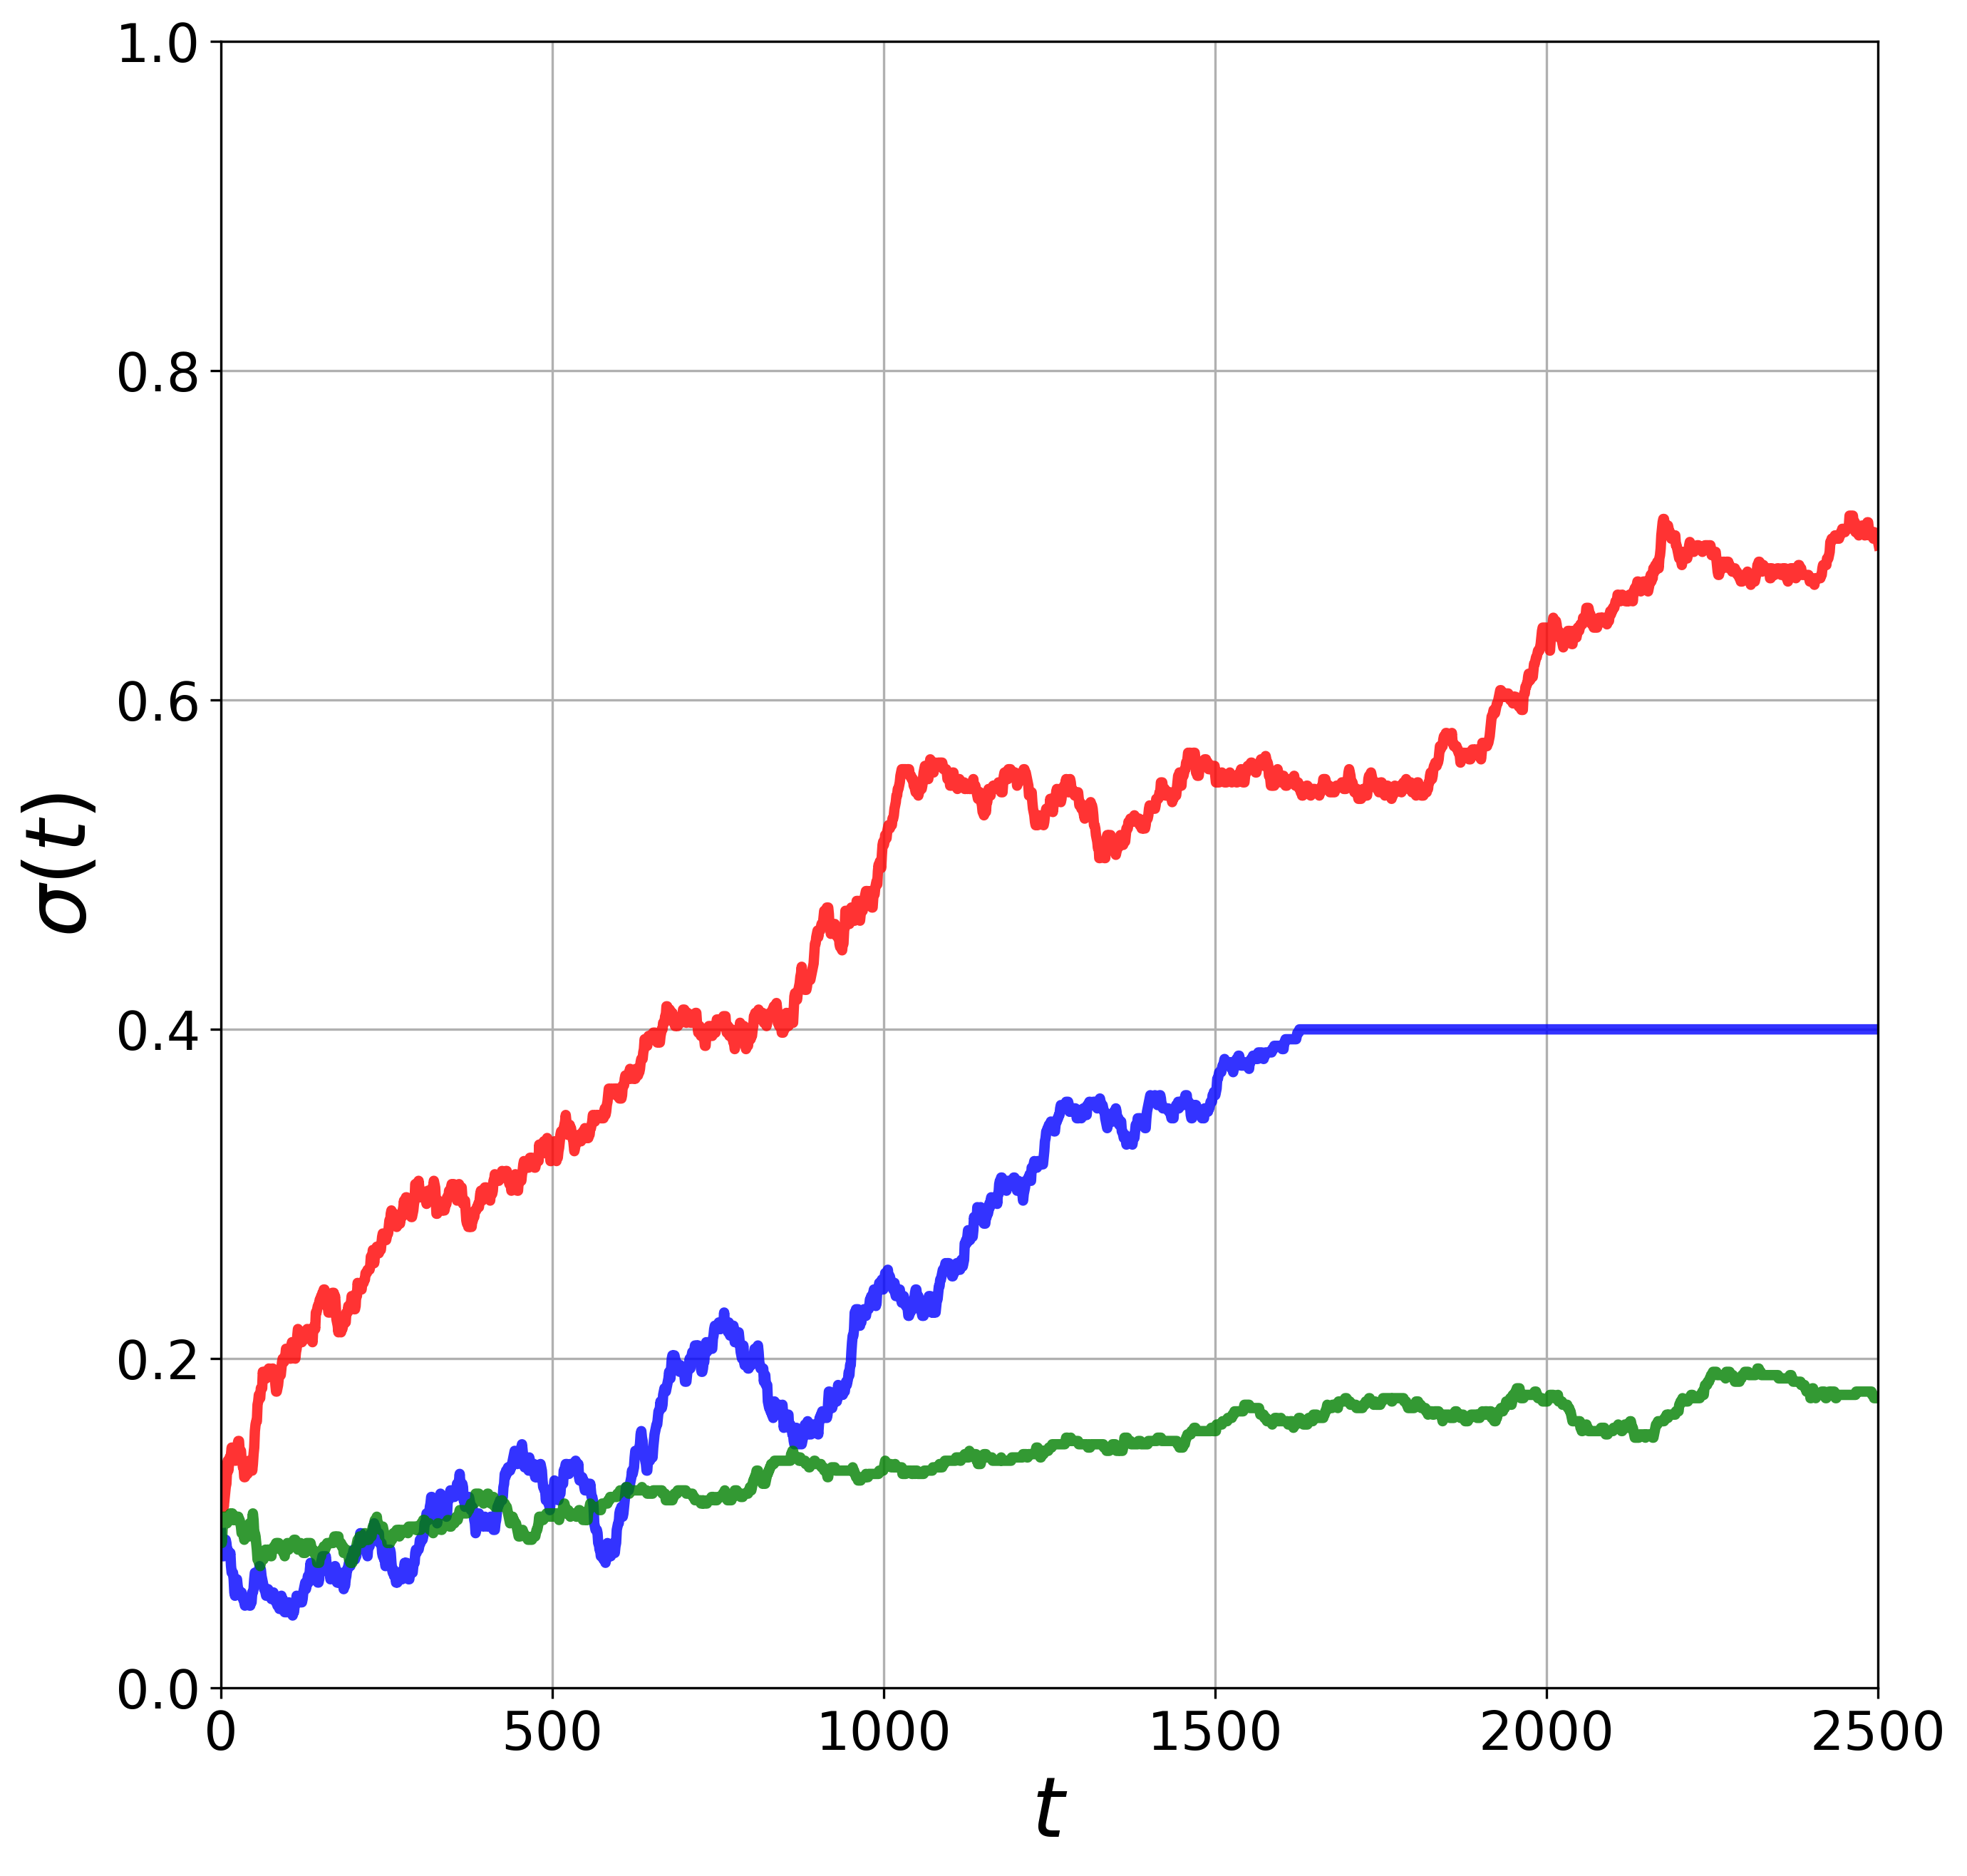

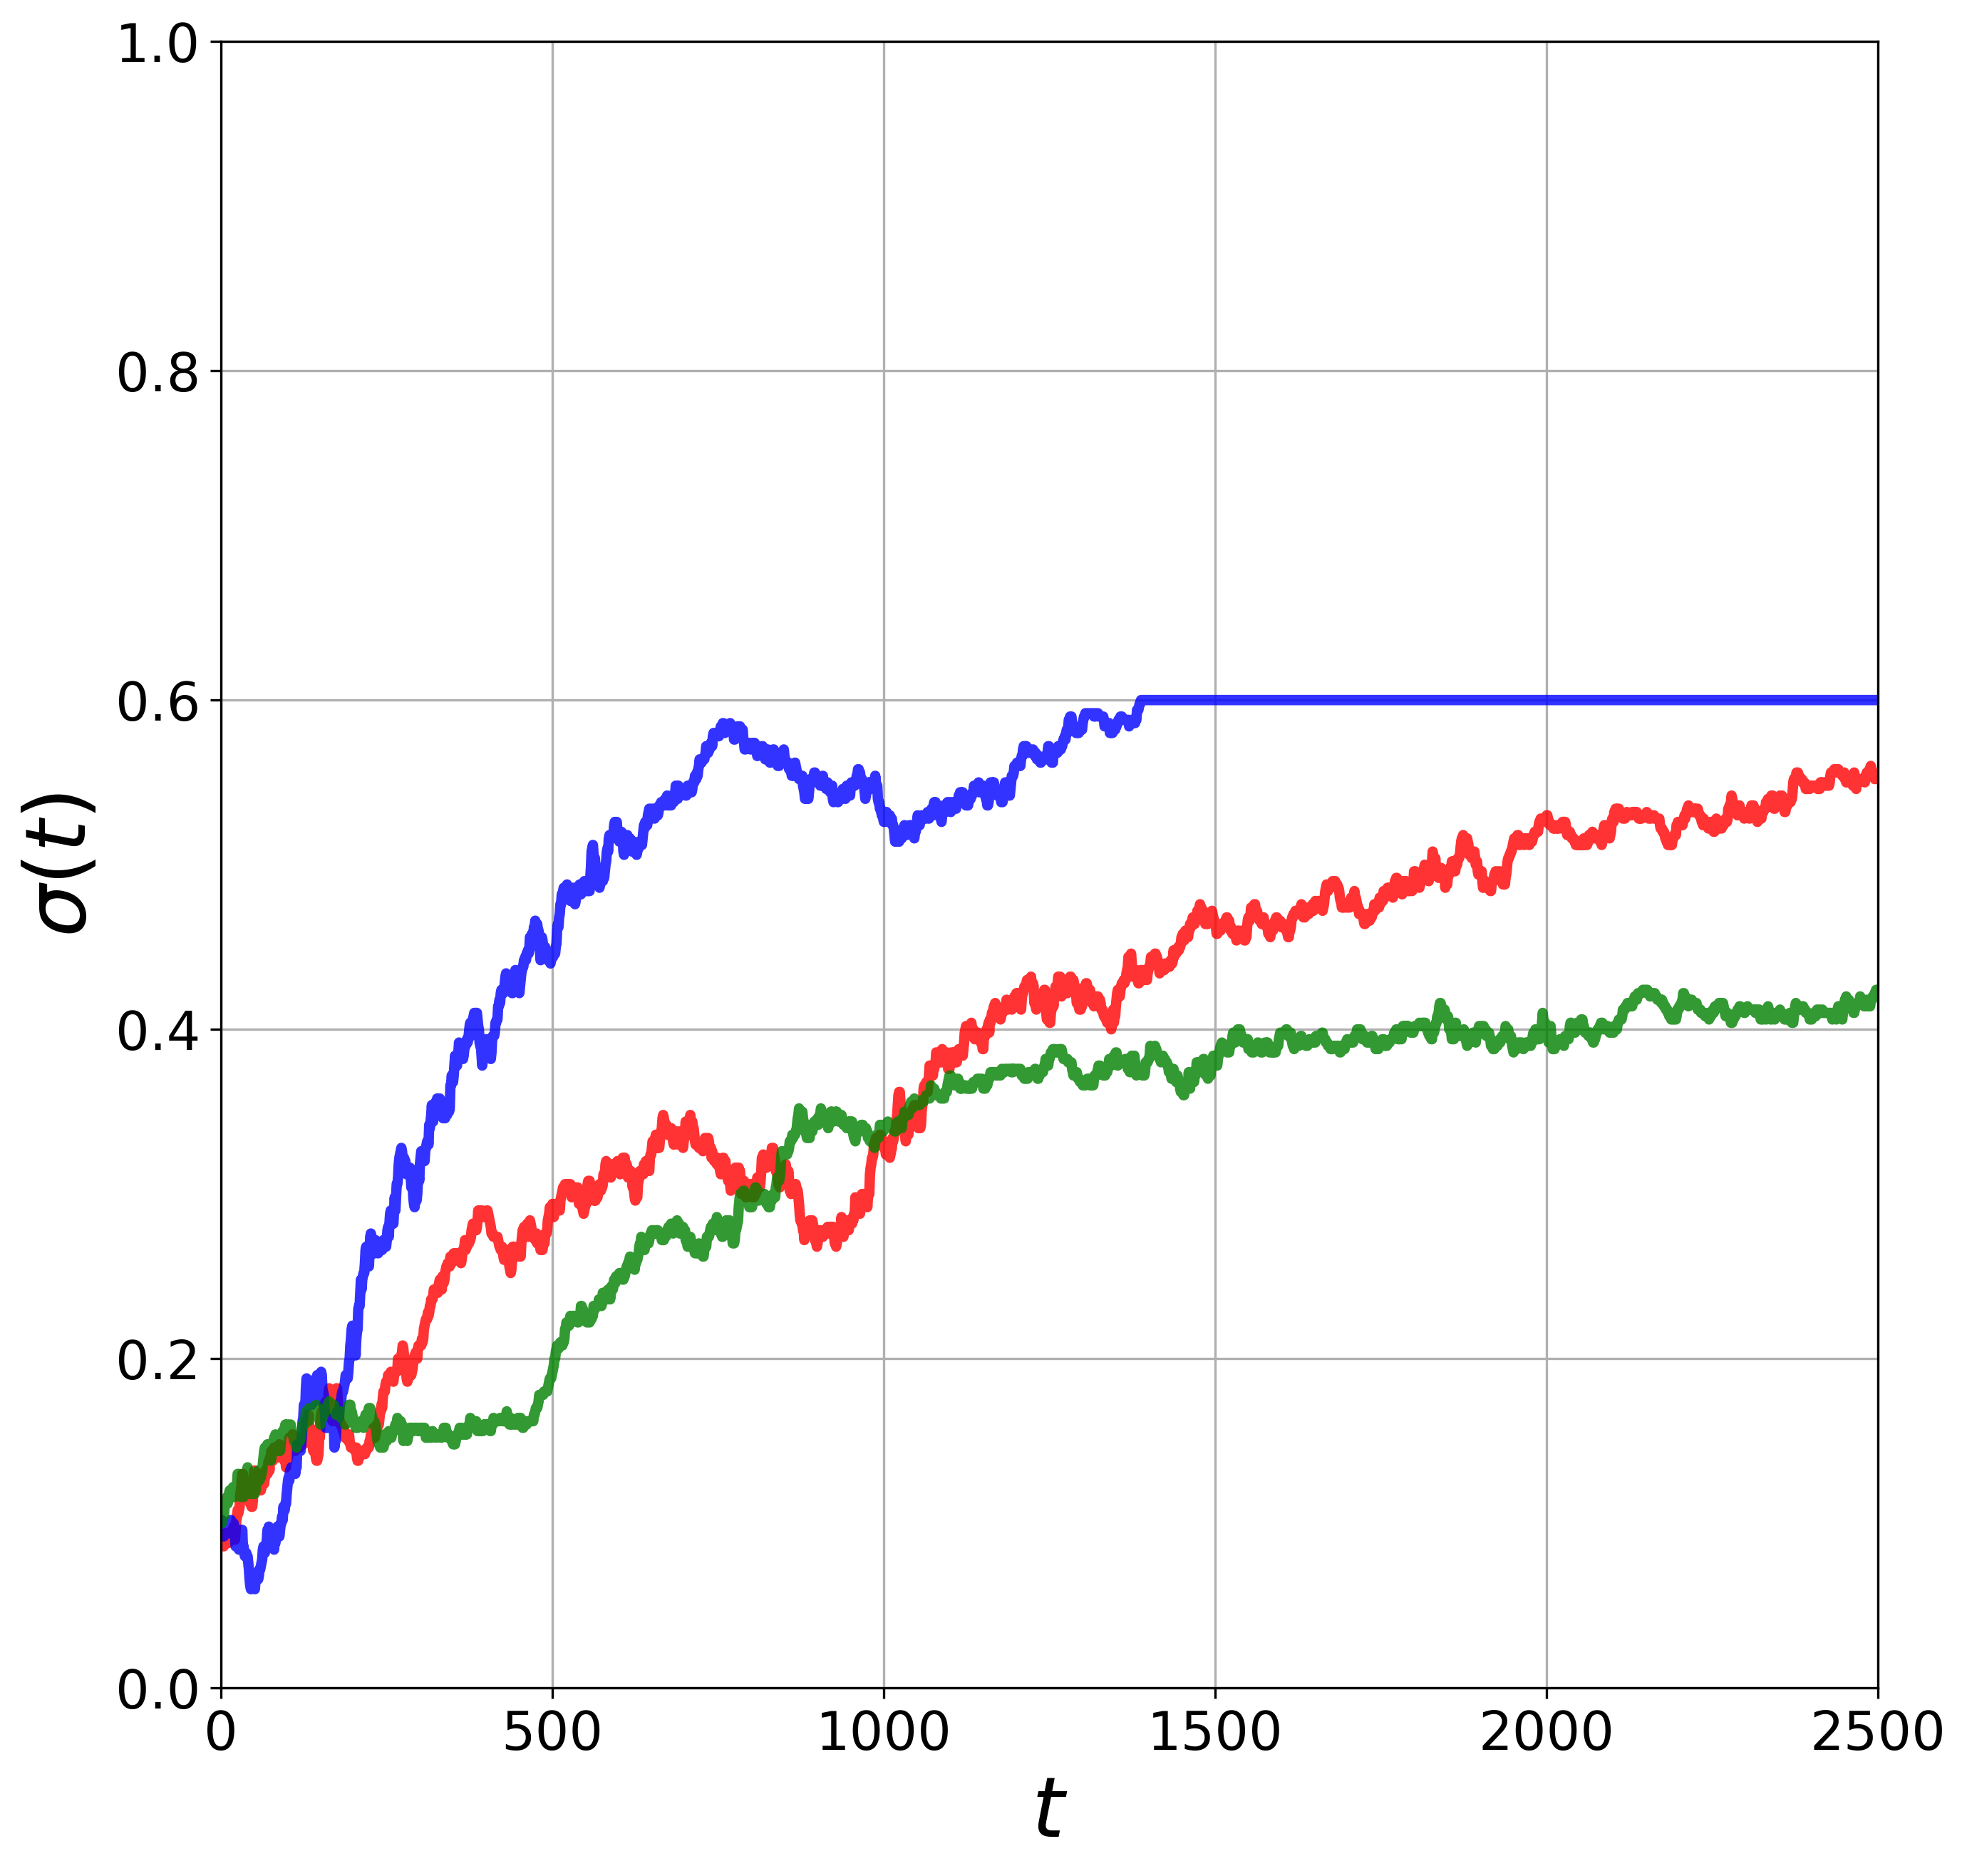

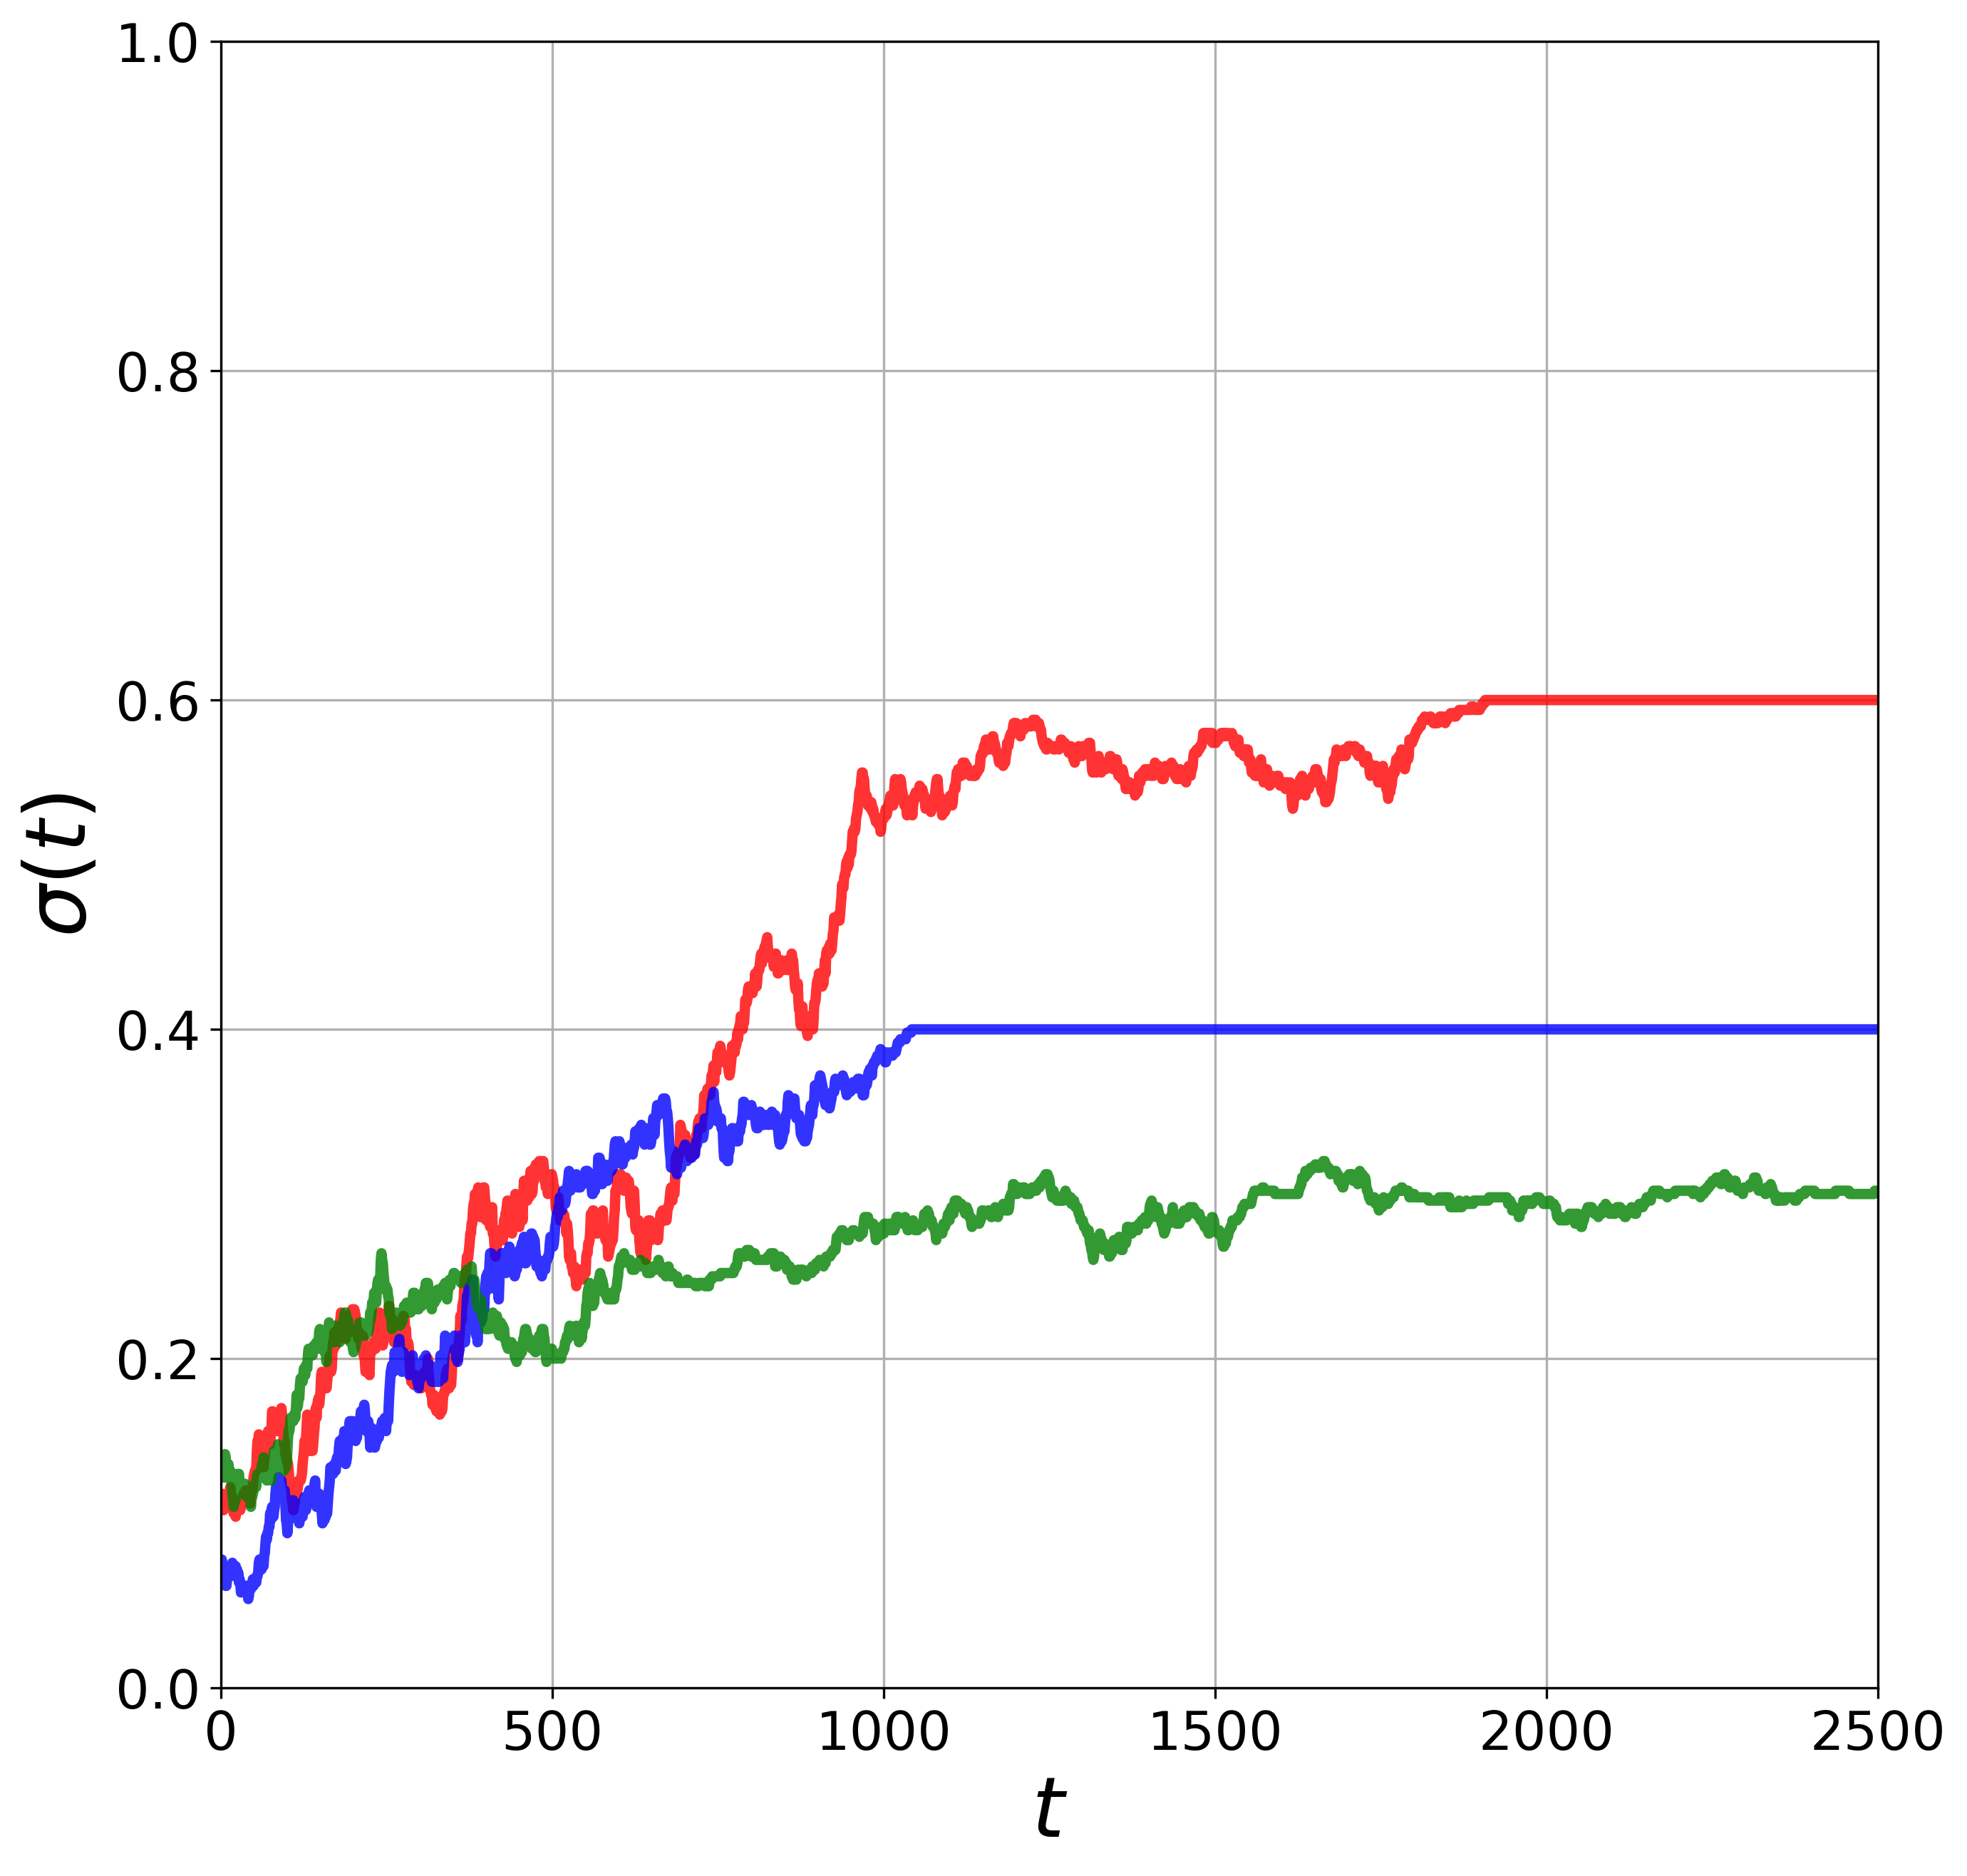

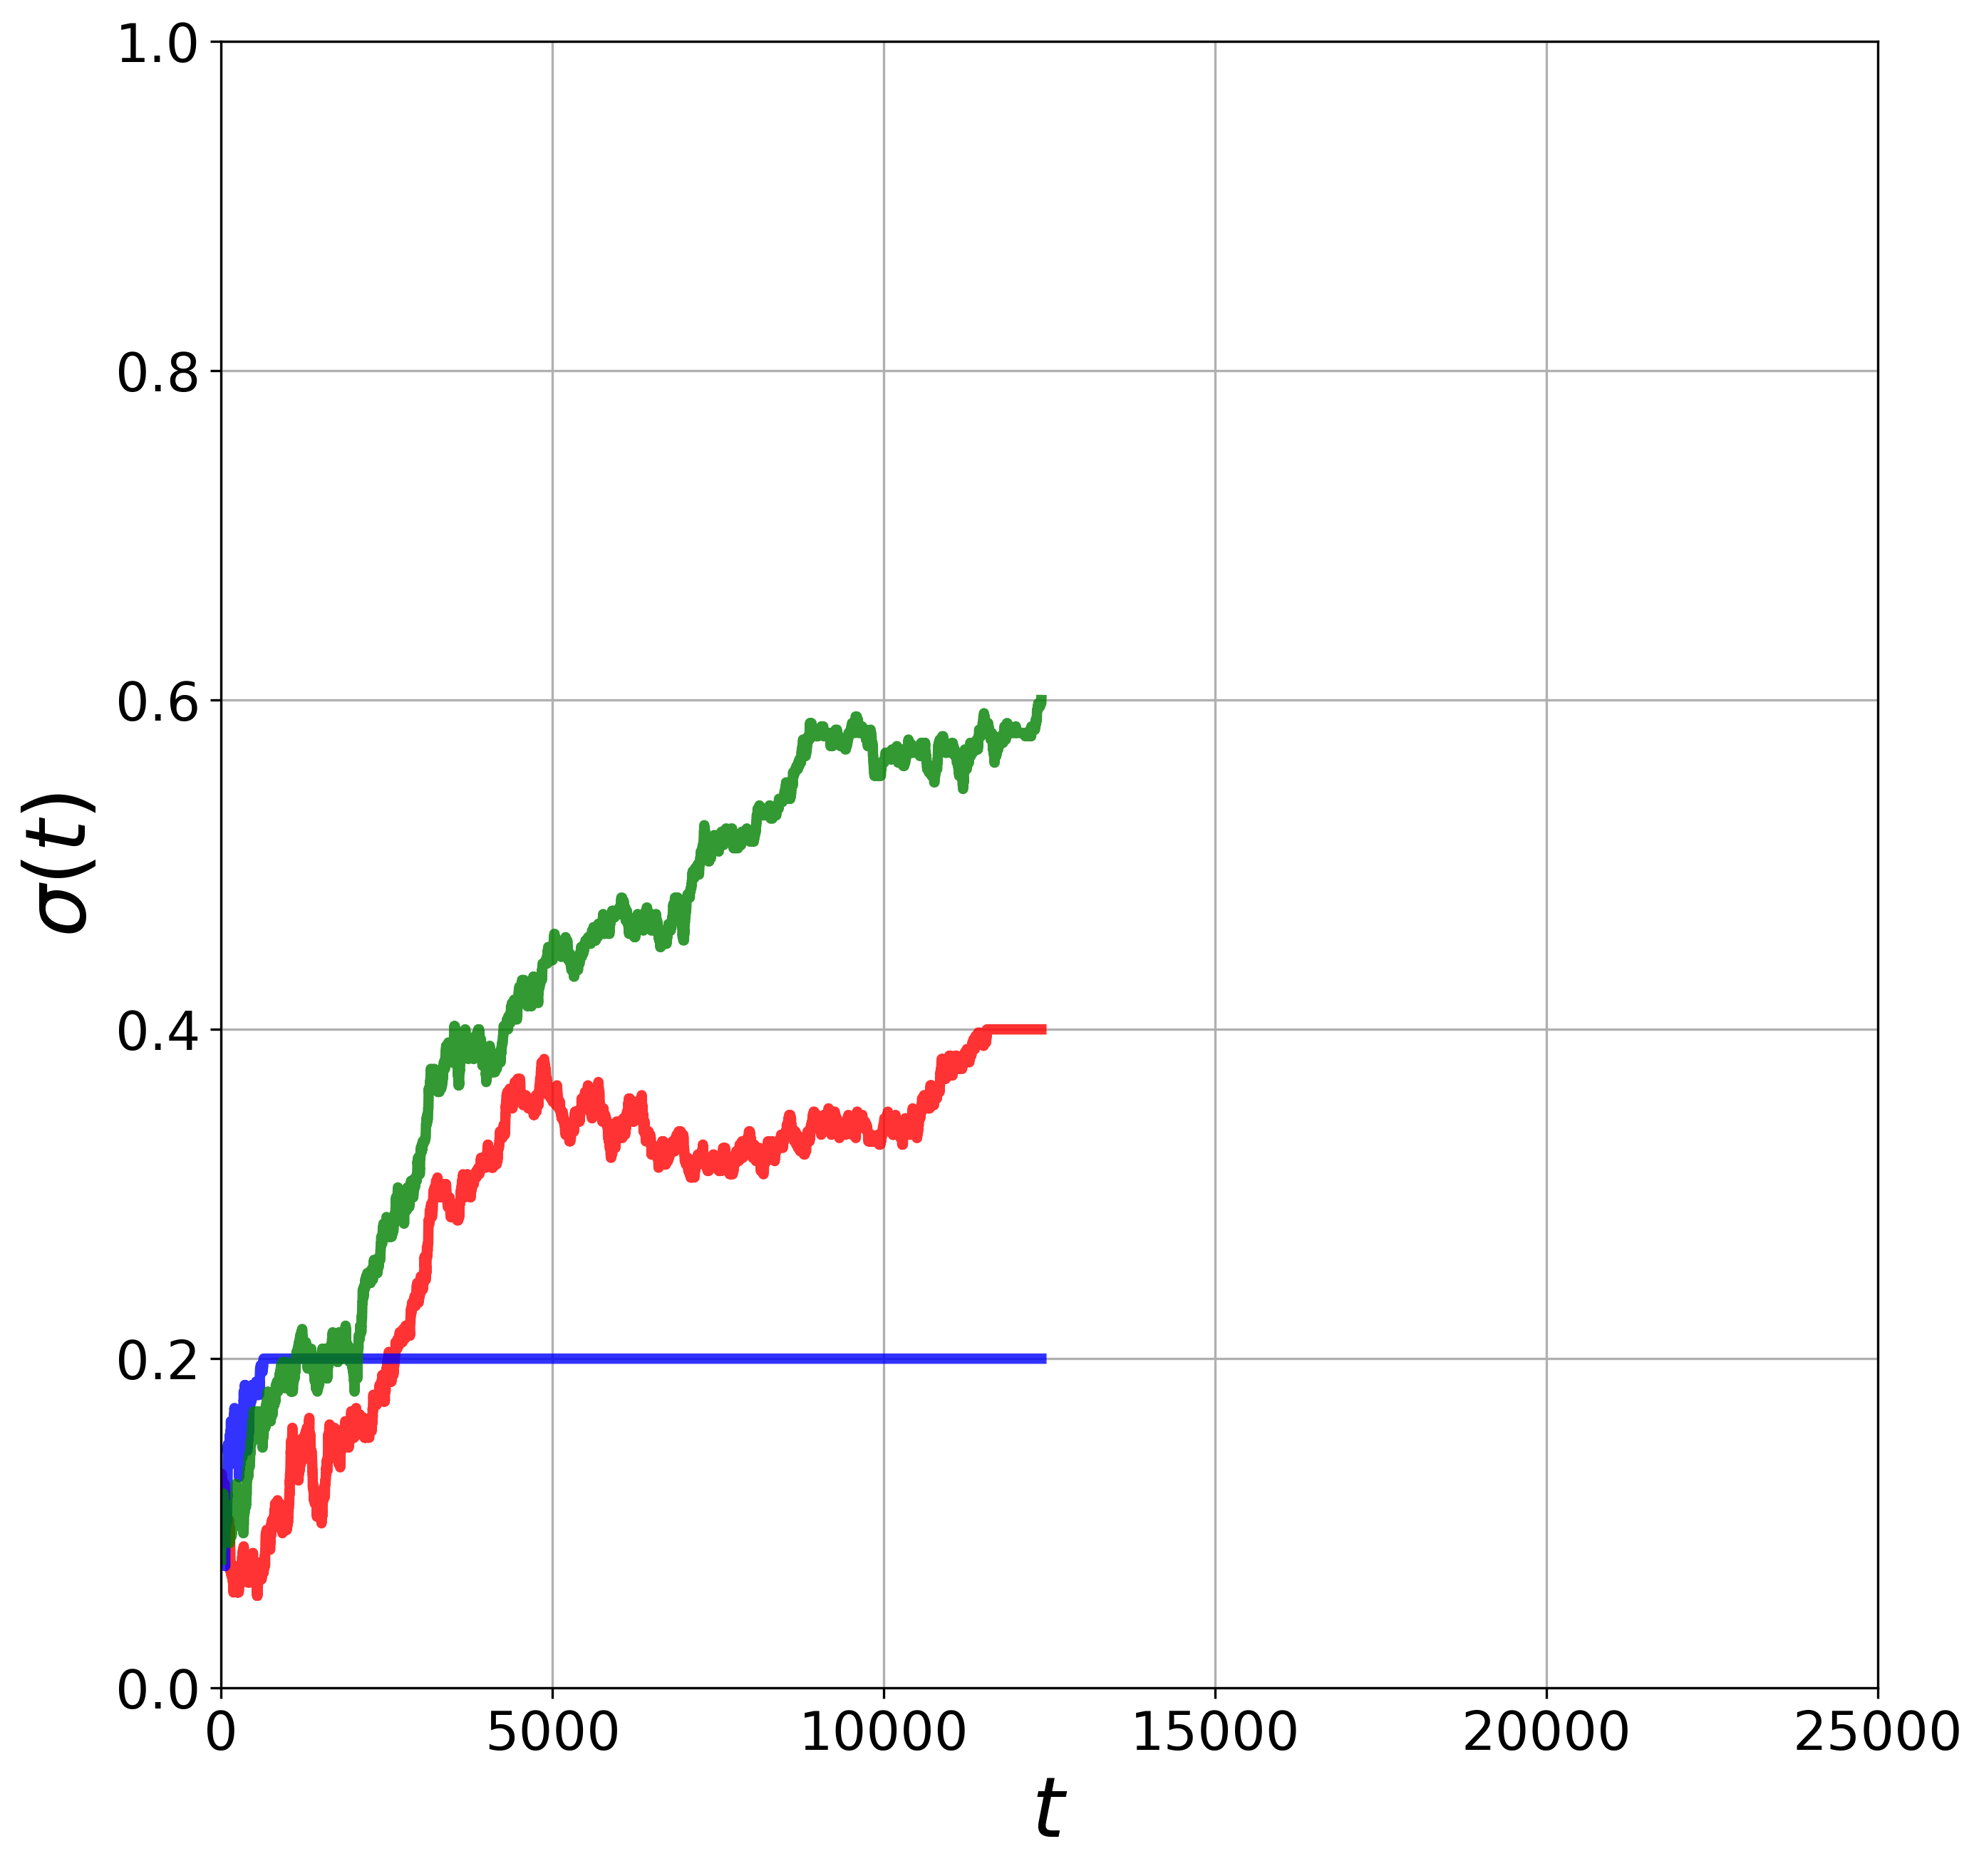

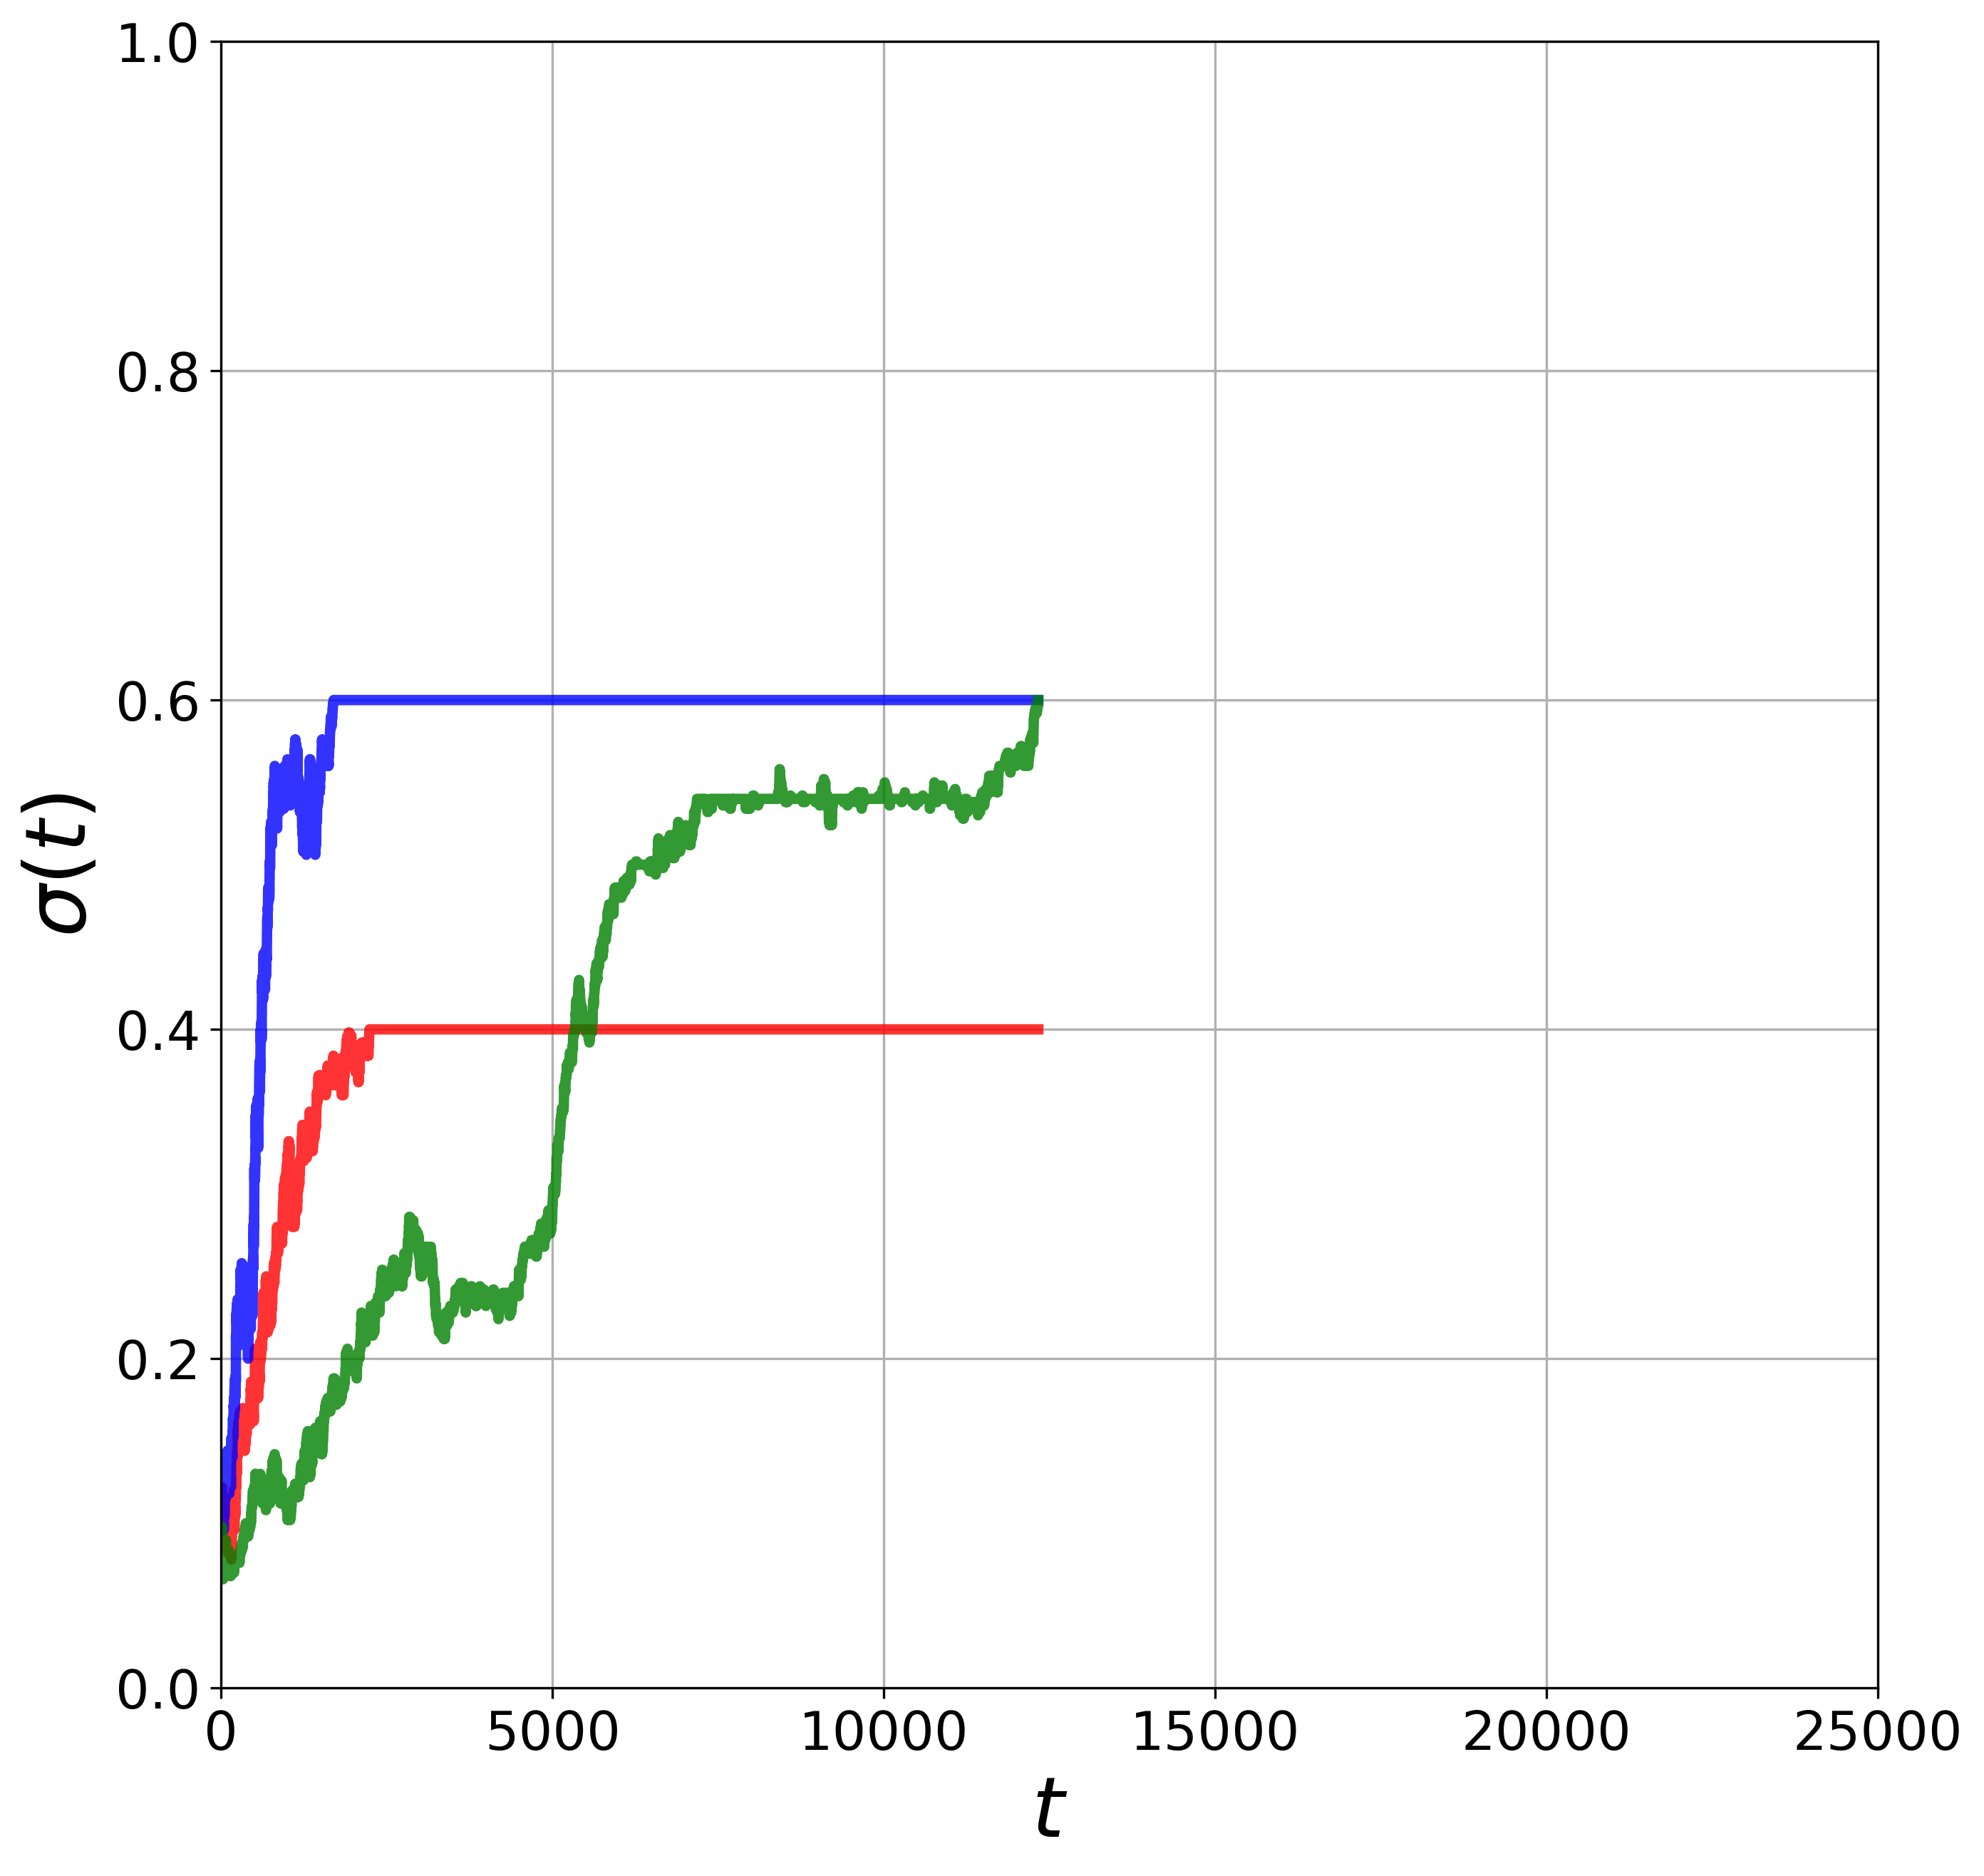

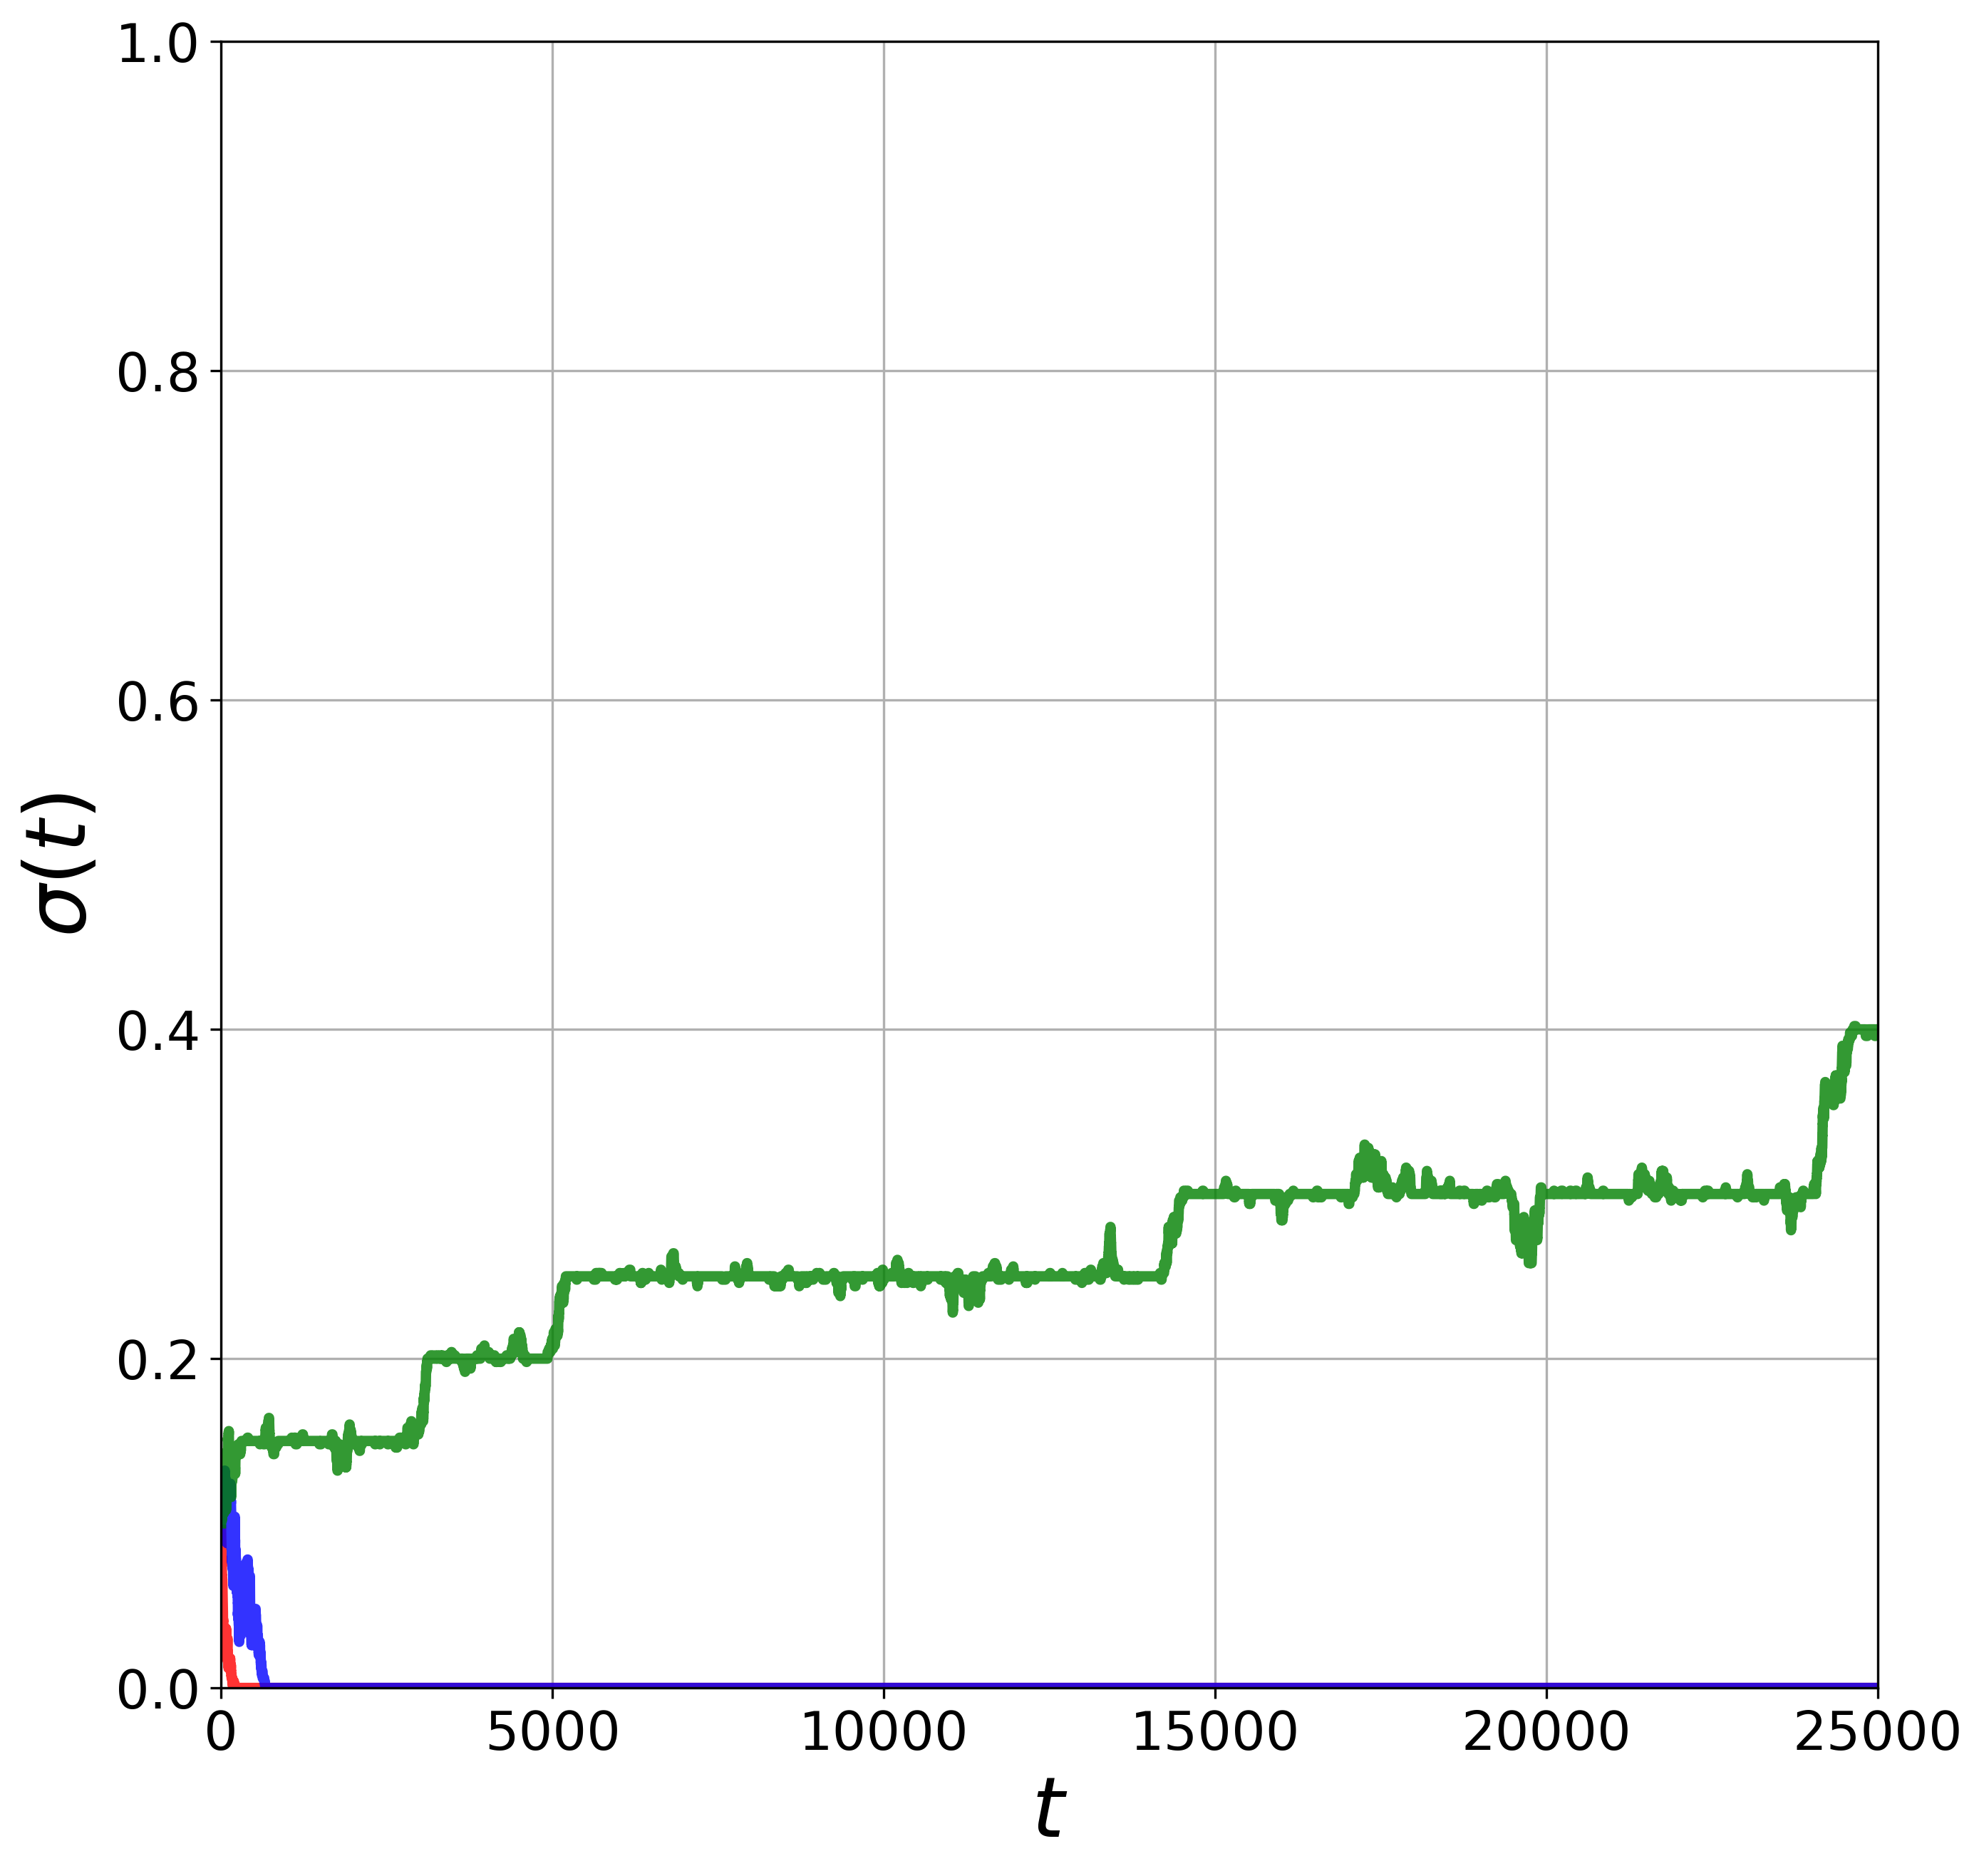

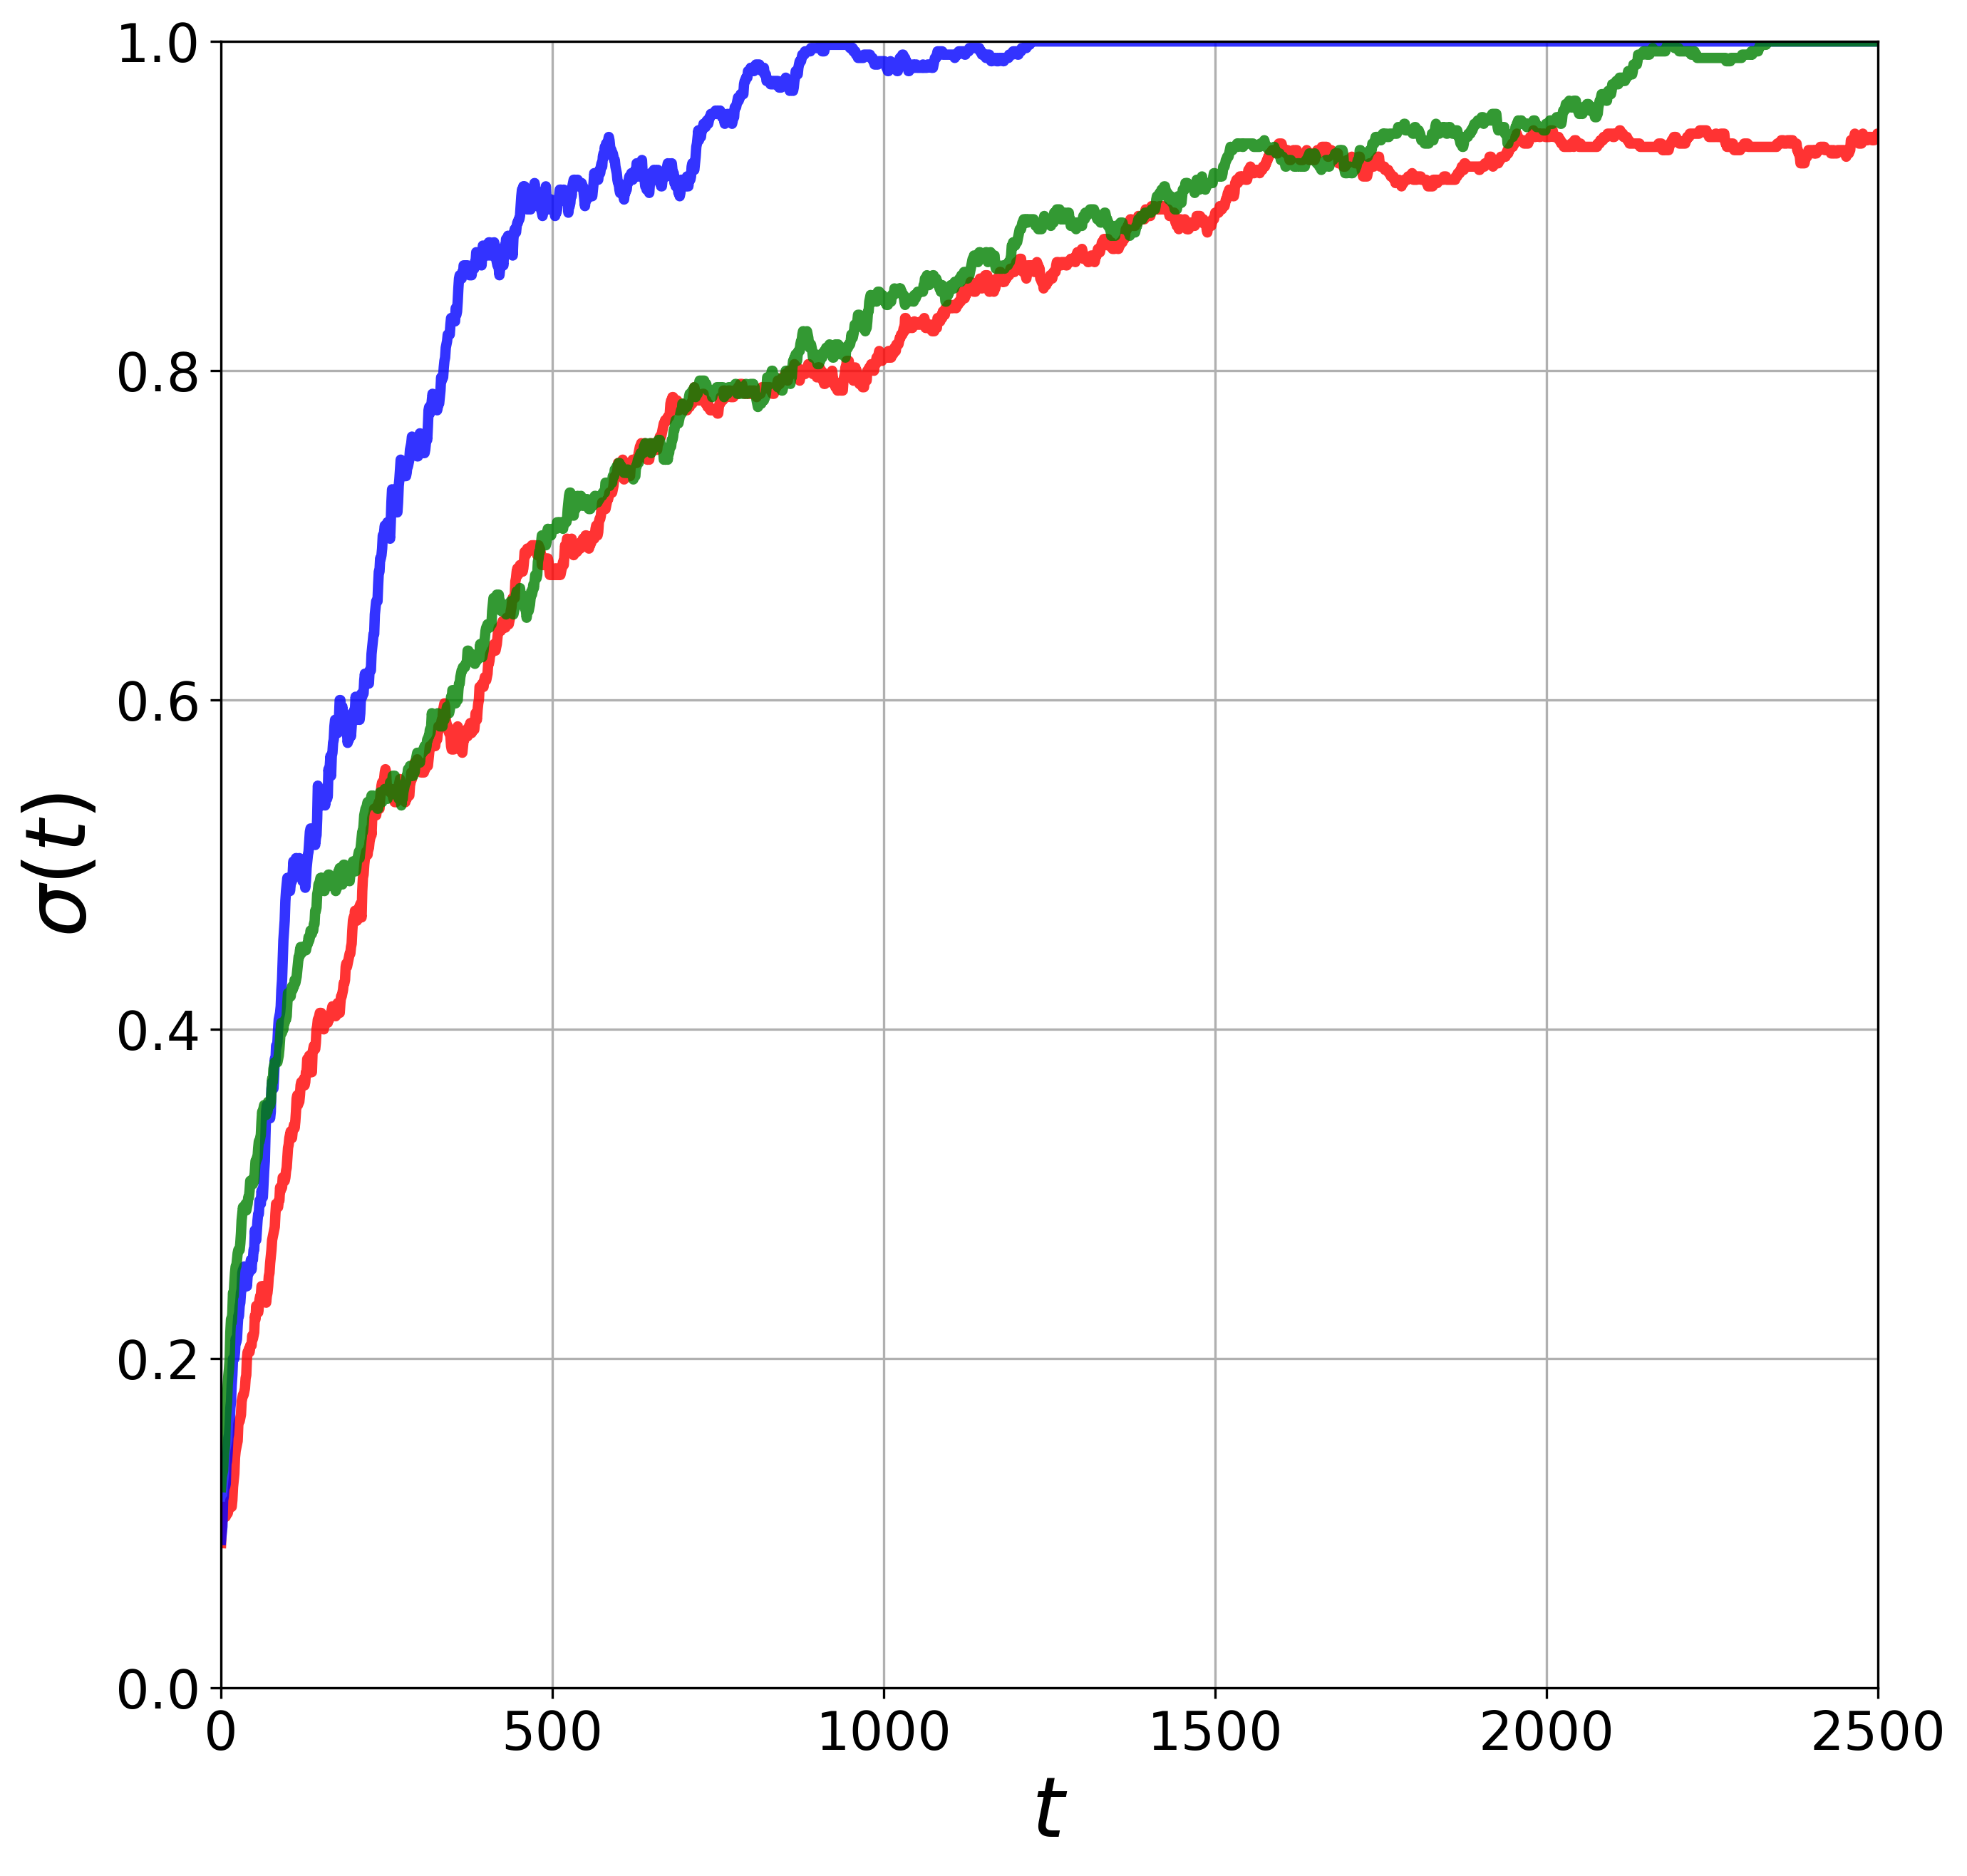

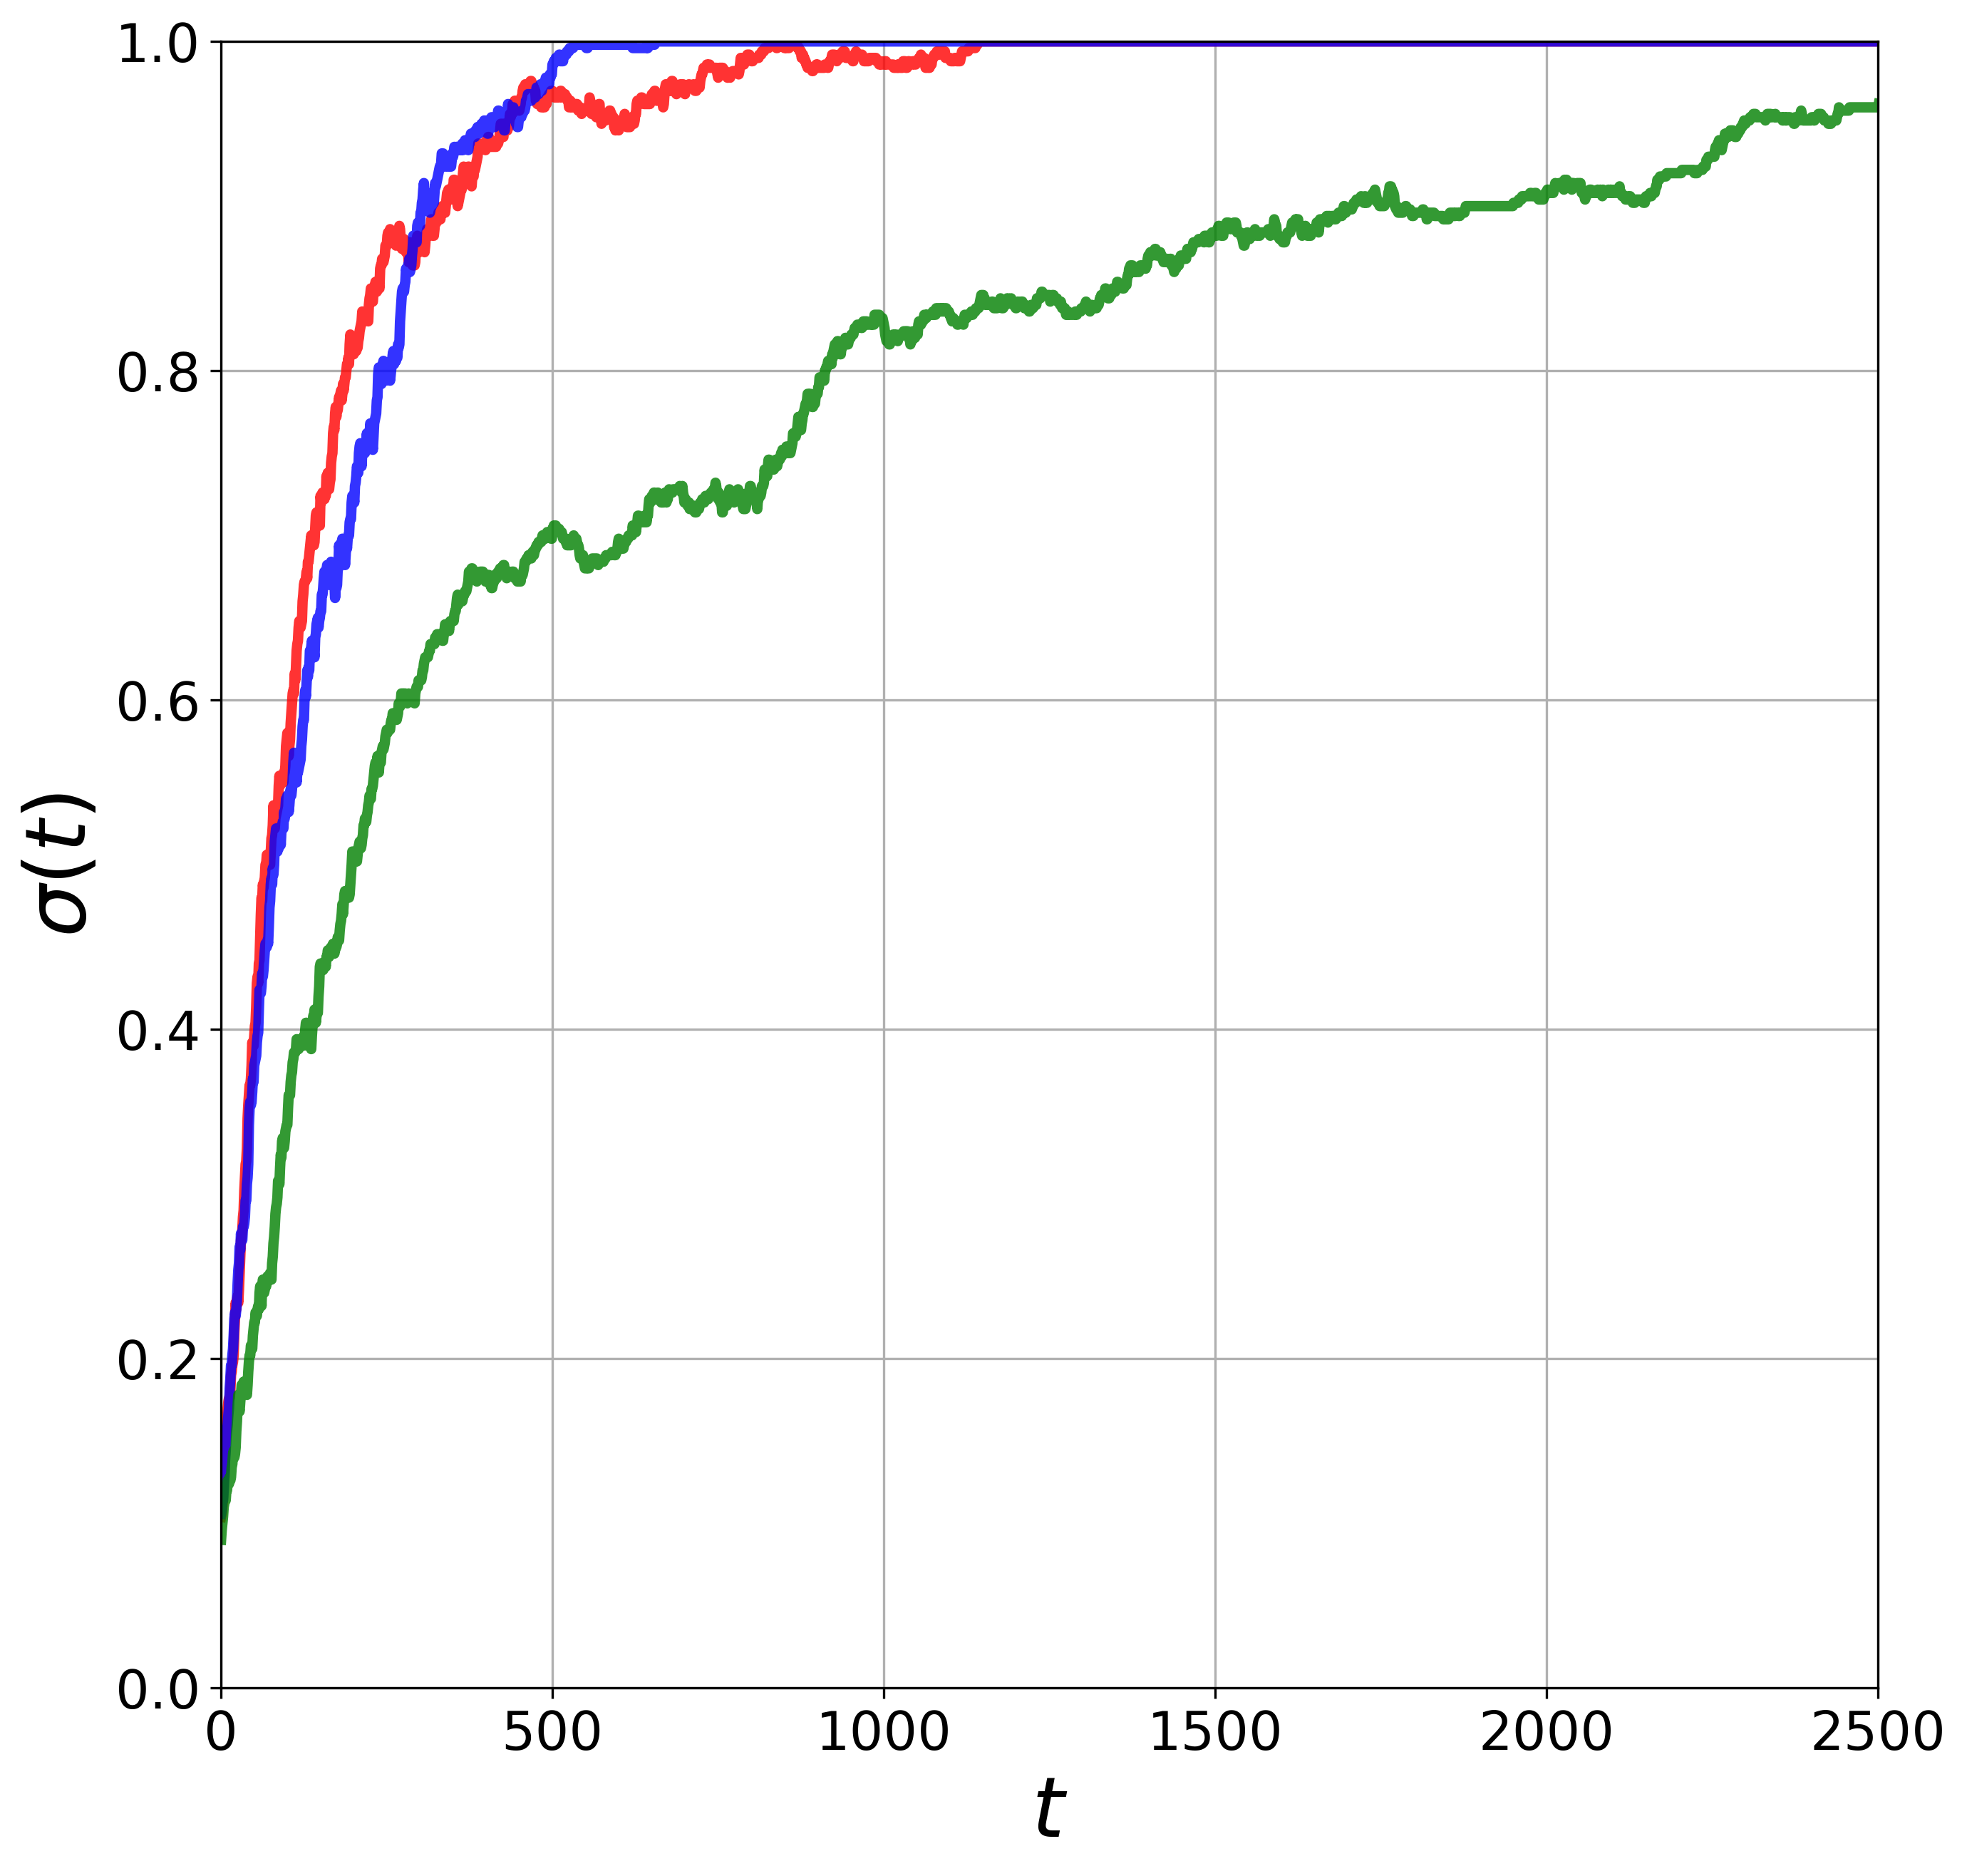

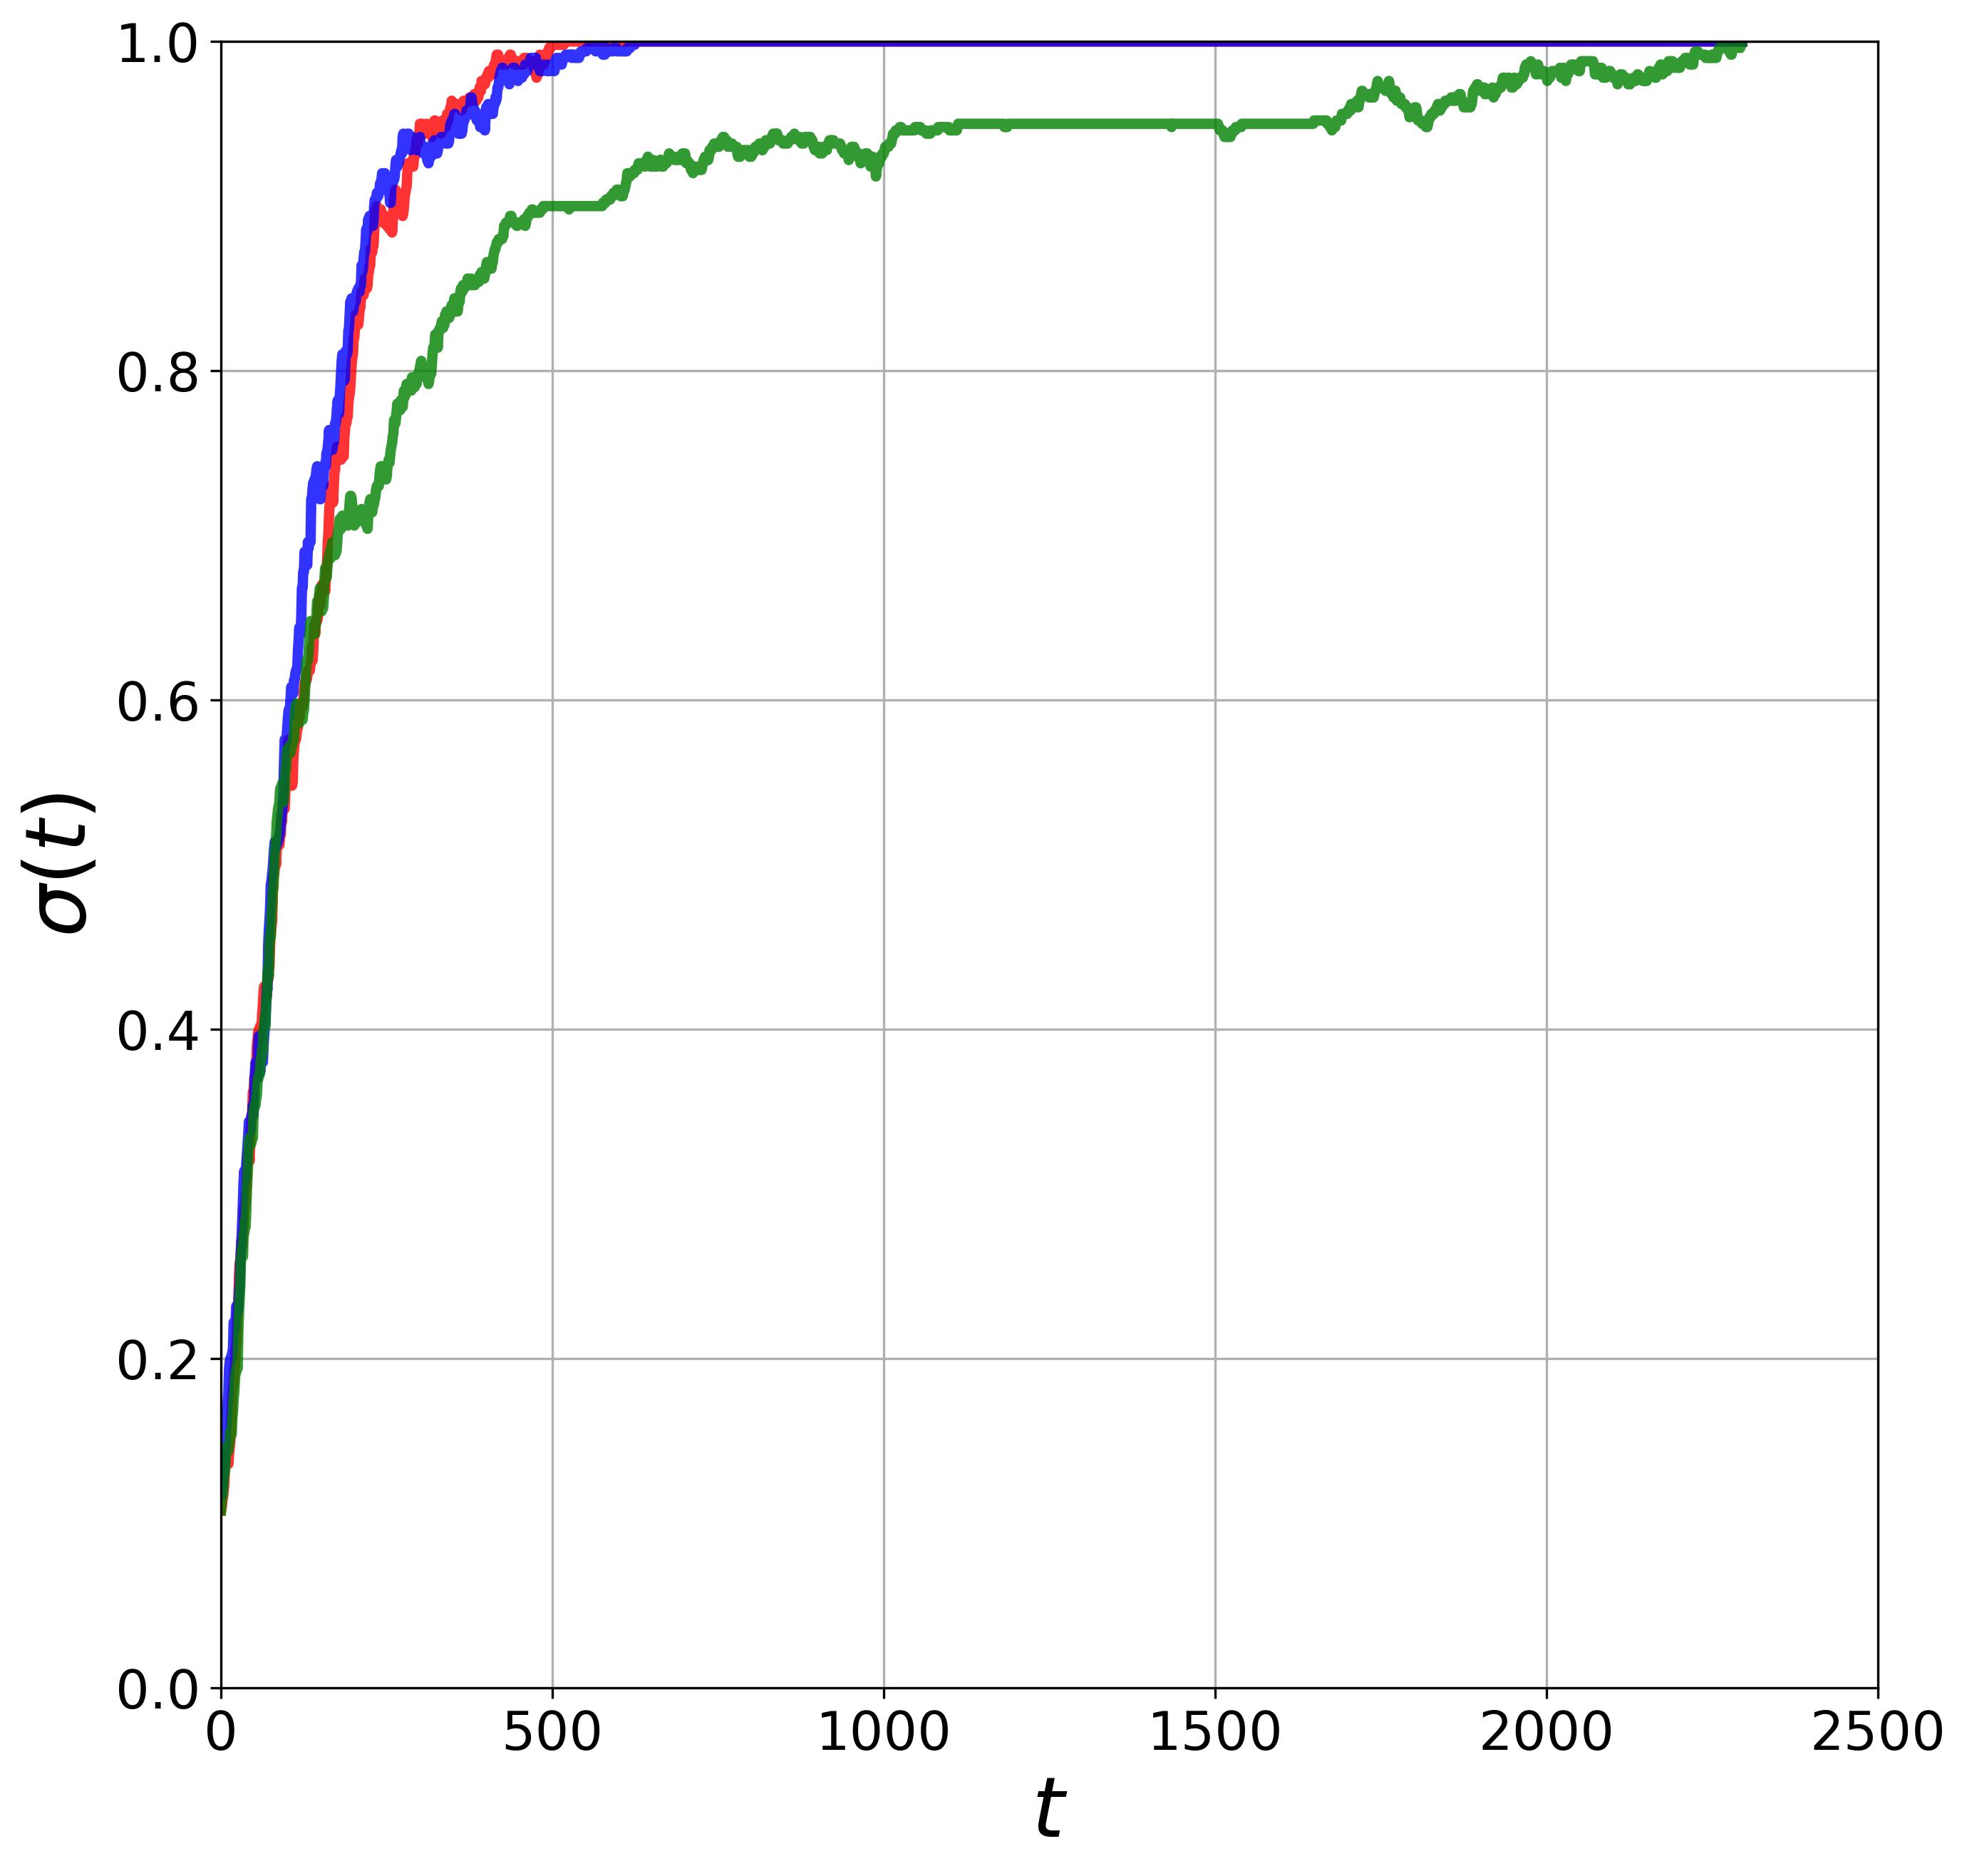

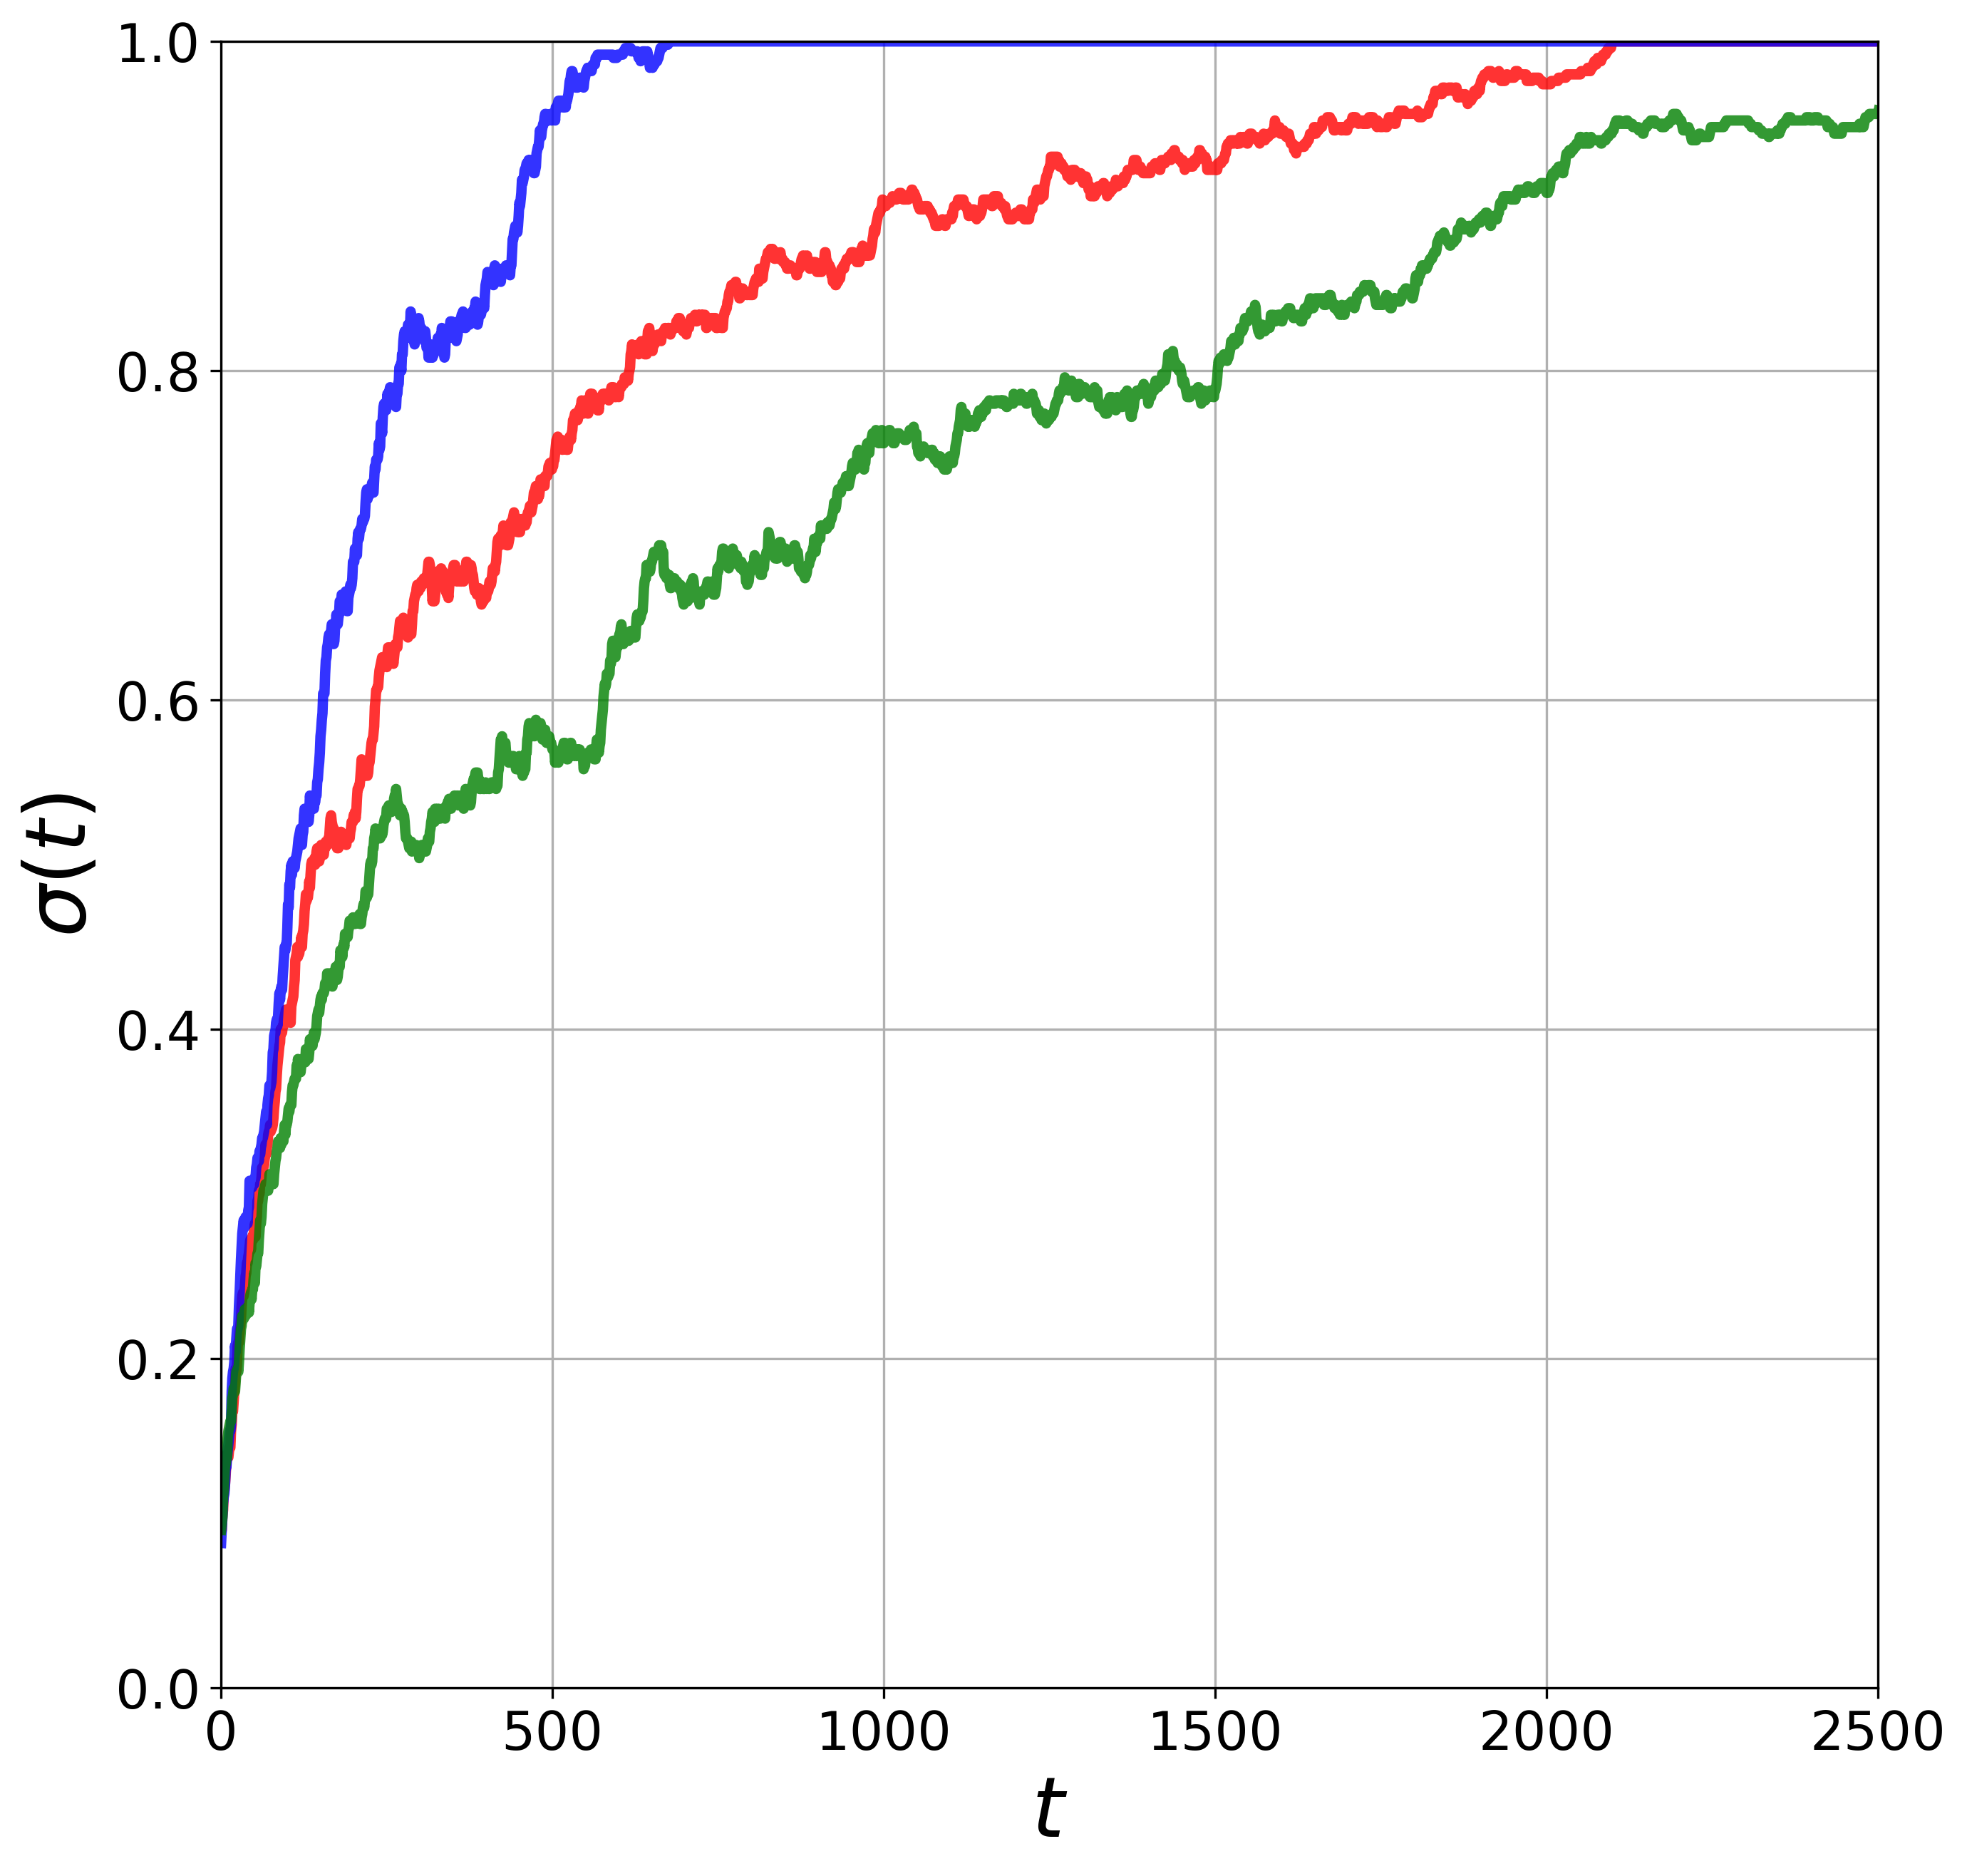

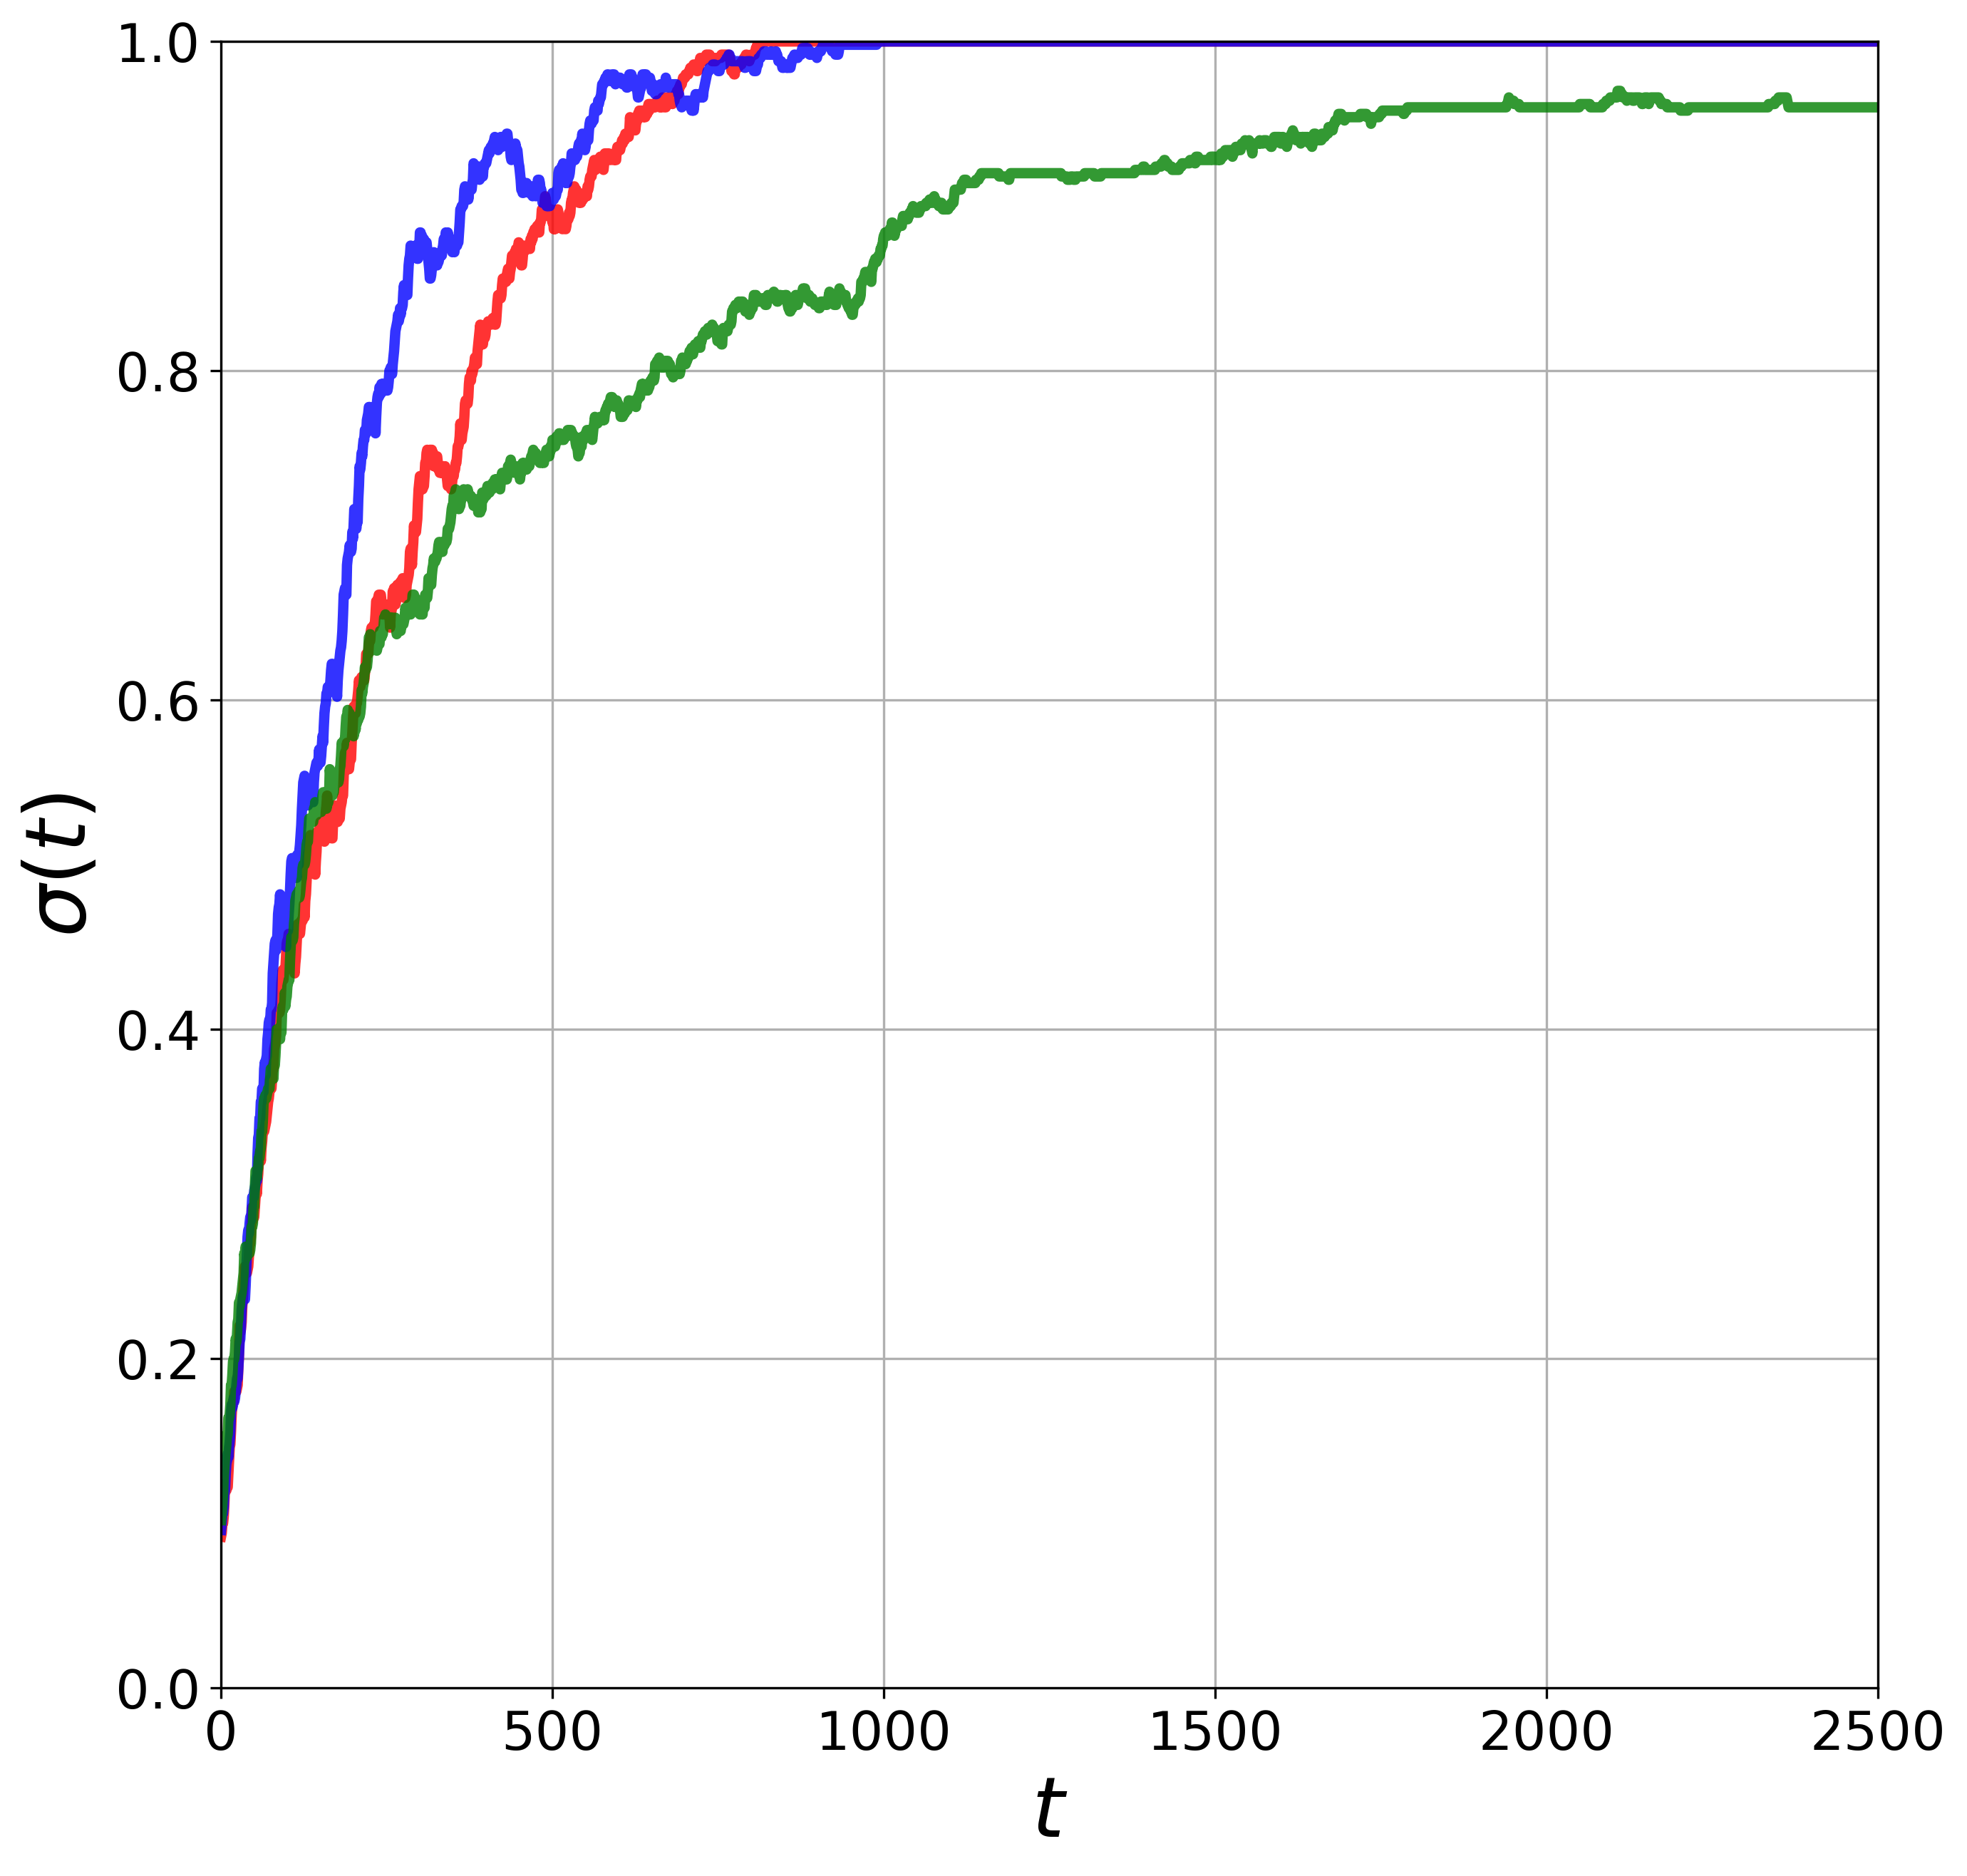

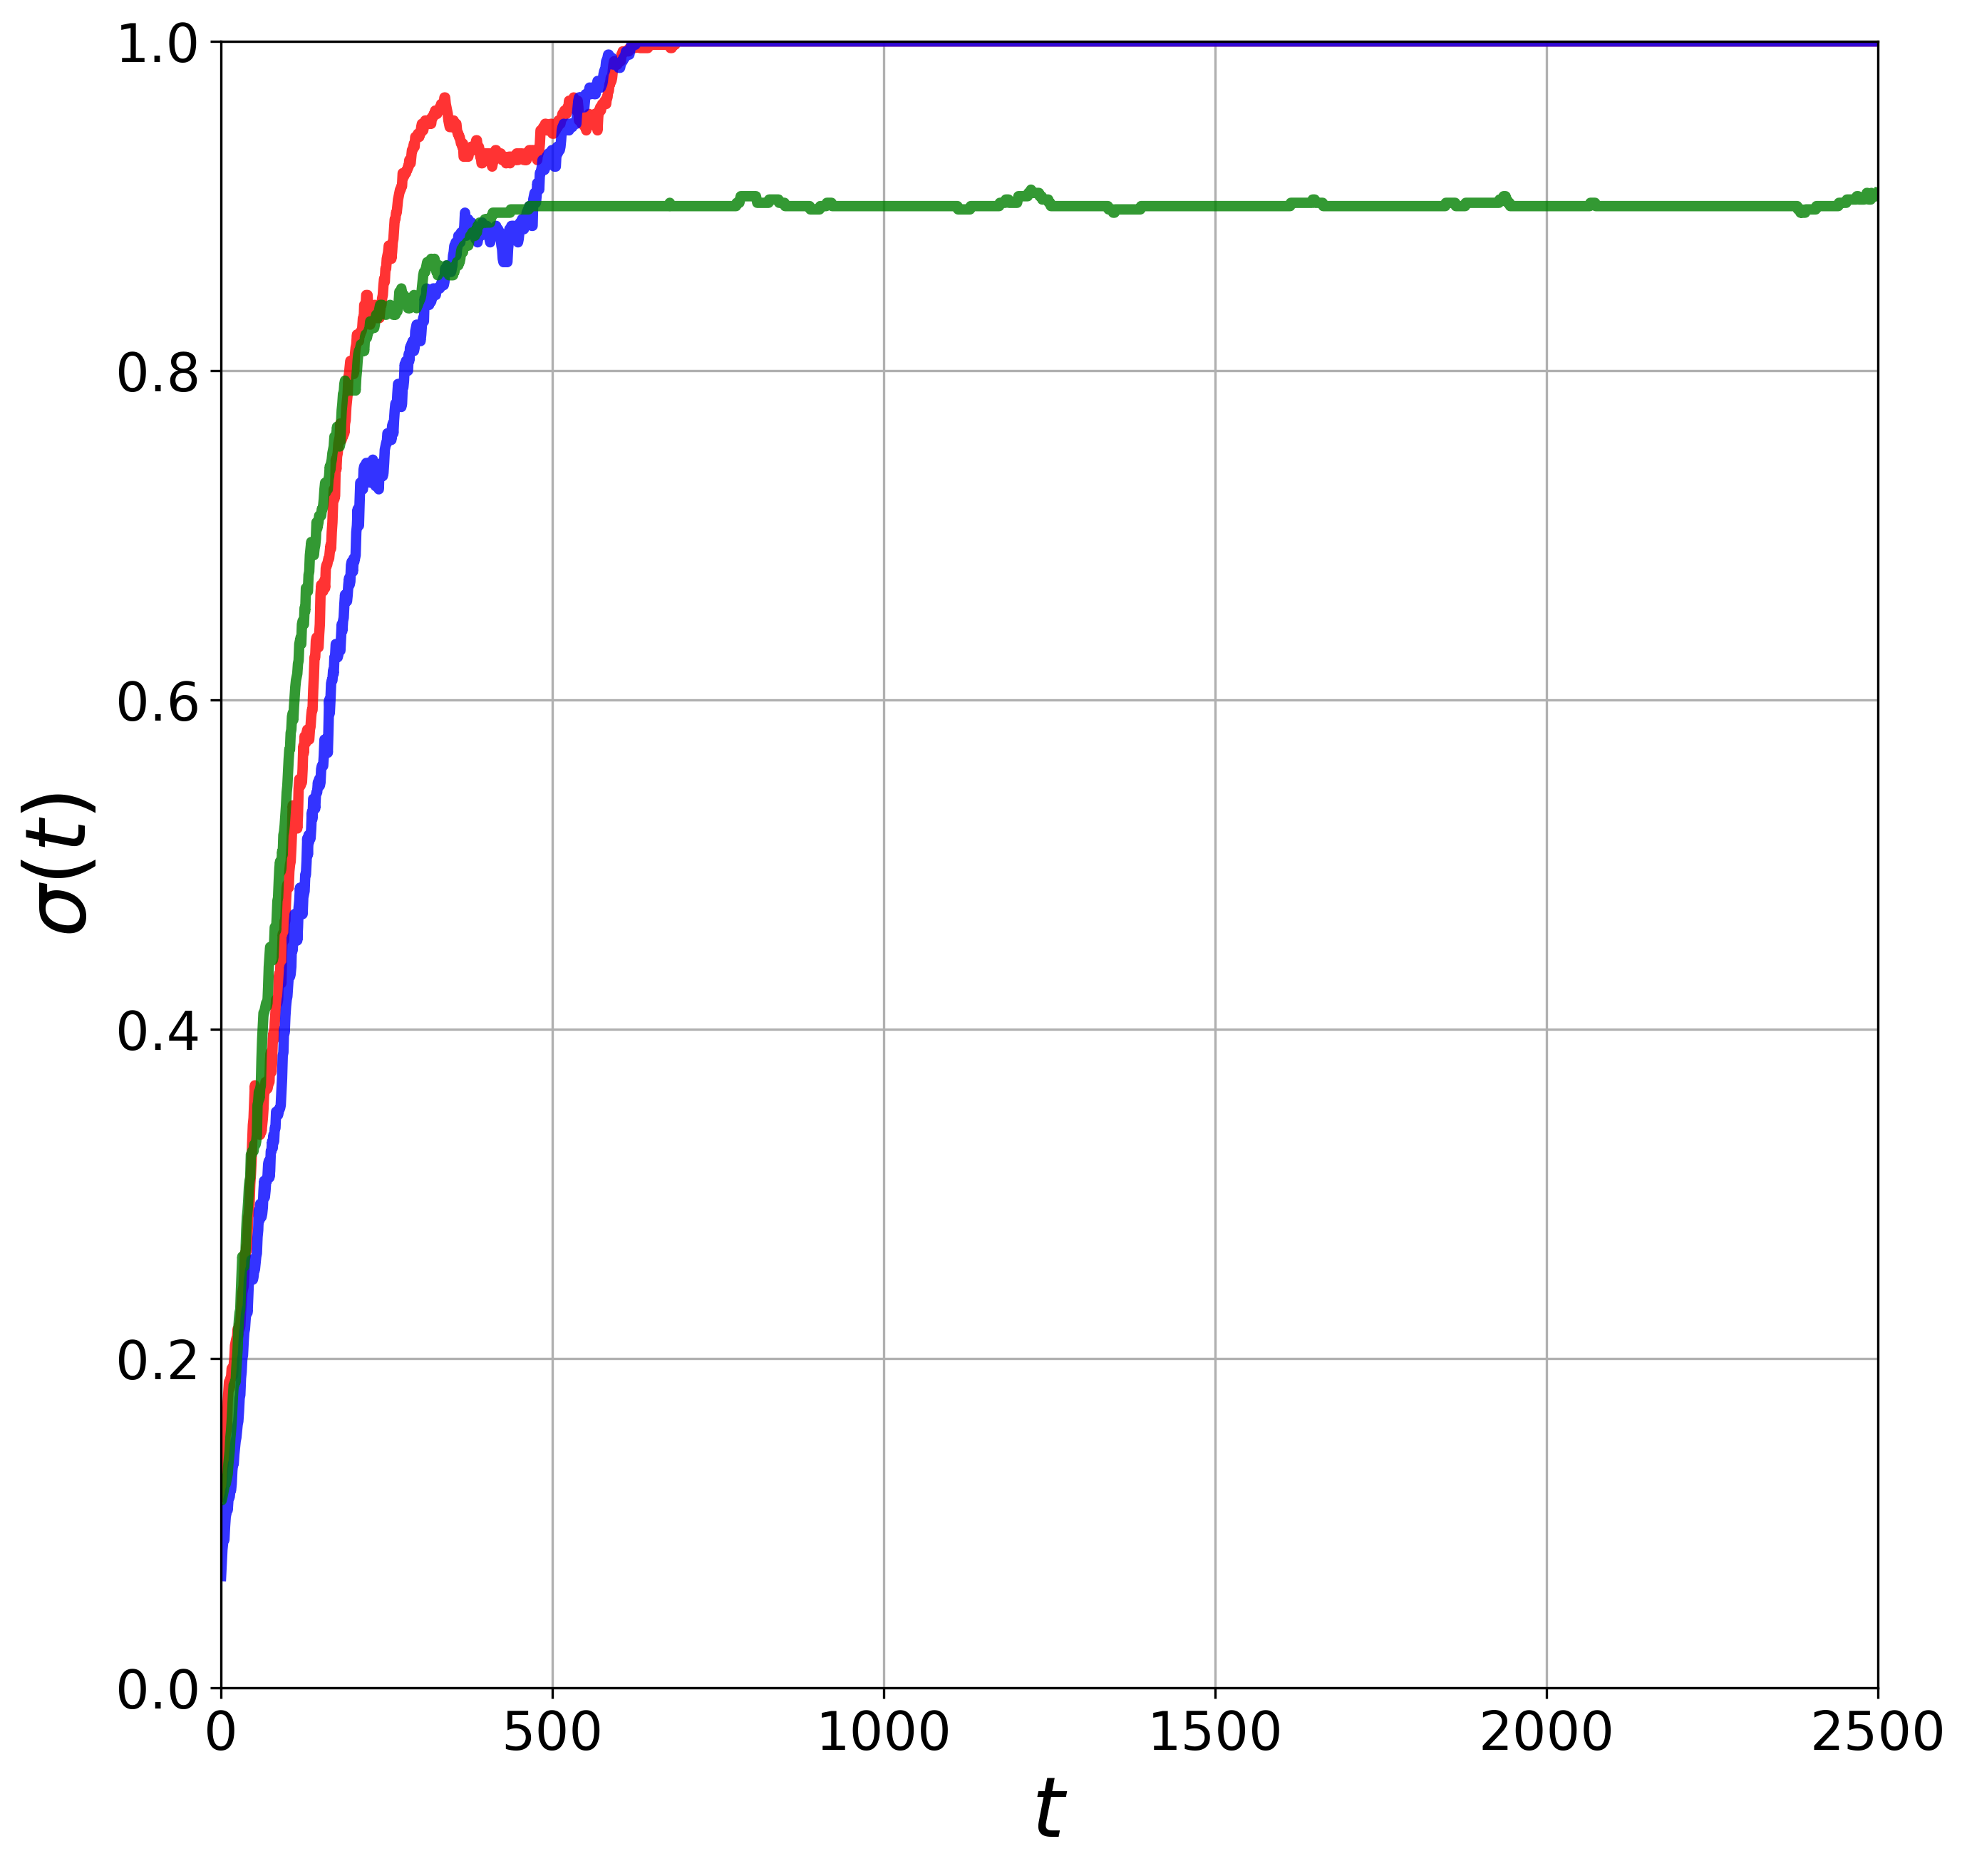

In [8]:
statics = [
    False,
    True
]

func_types = [
    FunctionType.linear,
    FunctionType.longstep
]

nums_edges = [
    220,
    460,
    1204
]

sdb = SimulationDatabase(path='output')
for static in statics:
    for func_type in func_types:
        for num_edges in nums_edges:
            
            sdirs = [
                sdir
                for sdir in sdb.sdirs
                if (sdir.sim.func_type == func_type) and
                (static is isinstance(sdir.sim, StaticSimulation)) and
                (num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70) and
                (sdir.sim.graph.graph_type != GraphType.complete)
            ]
            if len(sdirs) != 3:
                raise RuntimeError(f"Expected 3 SimulationDirectories after filter, got {len(sdirs)}.")
            
            sim = sdirs[1].sim
            fname = f"{sim.func_type}_e{sim.graph.graph.number_of_edges()}" + "_static" * static + ".png"
            print(f"{fname}:")
            splot = SigmaPlot(linewidth=3.5, alpha=.8, ax_tick_size=18, ax_label_size=28)
            
            gc.collect()
            
            for sdir in sdirs:
                print(f'caching {sdir}...')
                sdir.cache()
            print()
            x_max = max([sdir.t_max for sdir in sdirs])
            
            for sdir in sdirs:
                splot.plot(sdir, color=color[sdir.sim.graph.graph_type], x_max=x_max, label=label[sdir.sim.graph.graph_type])
            xright = 2500 if static else x_right[sim.func_type]
            splot.update_axlims(x_right=xright)

            # display
            display(splot.fig)

            # # save
            # splot.fig.savefig(
            #     os.path.join('plots', fname),
            #     bbox_inches='tight',
            #     pad_inches=0
            # )

## Plot three

In [9]:
num_edges = 1204
sdb = SimulationDatabase(path='output')
sdirs = [
    sdir
    for sdir in sdb.sdirs
    if sdir.sim.func_type == FunctionType.linear and
    not isinstance(sdir.sim, StaticSimulation) and
    num_edges - 70 <= sdir.sim.graph.graph.number_of_edges() <= num_edges + 70 and
    sdir.sim.graph.graph_type != GraphType.complete
]
print(sdirs)
for sdir in sdirs:
    sdir.cache()

[SimulationDirectory_linear_ring_e1200_run5, SimulationDirectory_linear_er_e1204_run5, SimulationDirectory_linear_roc_e1204_run5]


In [10]:
%%capture
x_max = max([sdir.t_max for sdir in sdirs])
splot = SigmaPlot(linewidth=3.5, alpha=.8, ax_tick_size=18, ax_label_size=28)
# splot.x_label = "время"
# splot.y_label = "доля вершин в состоянии 1"
# splot._setup()
for sdir in sdirs:
    splot.plot(sdir, color=color[sdir.sim.graph.graph_type], x_max=x_max)
splot.update_axlims(x_right=2500)

### Display

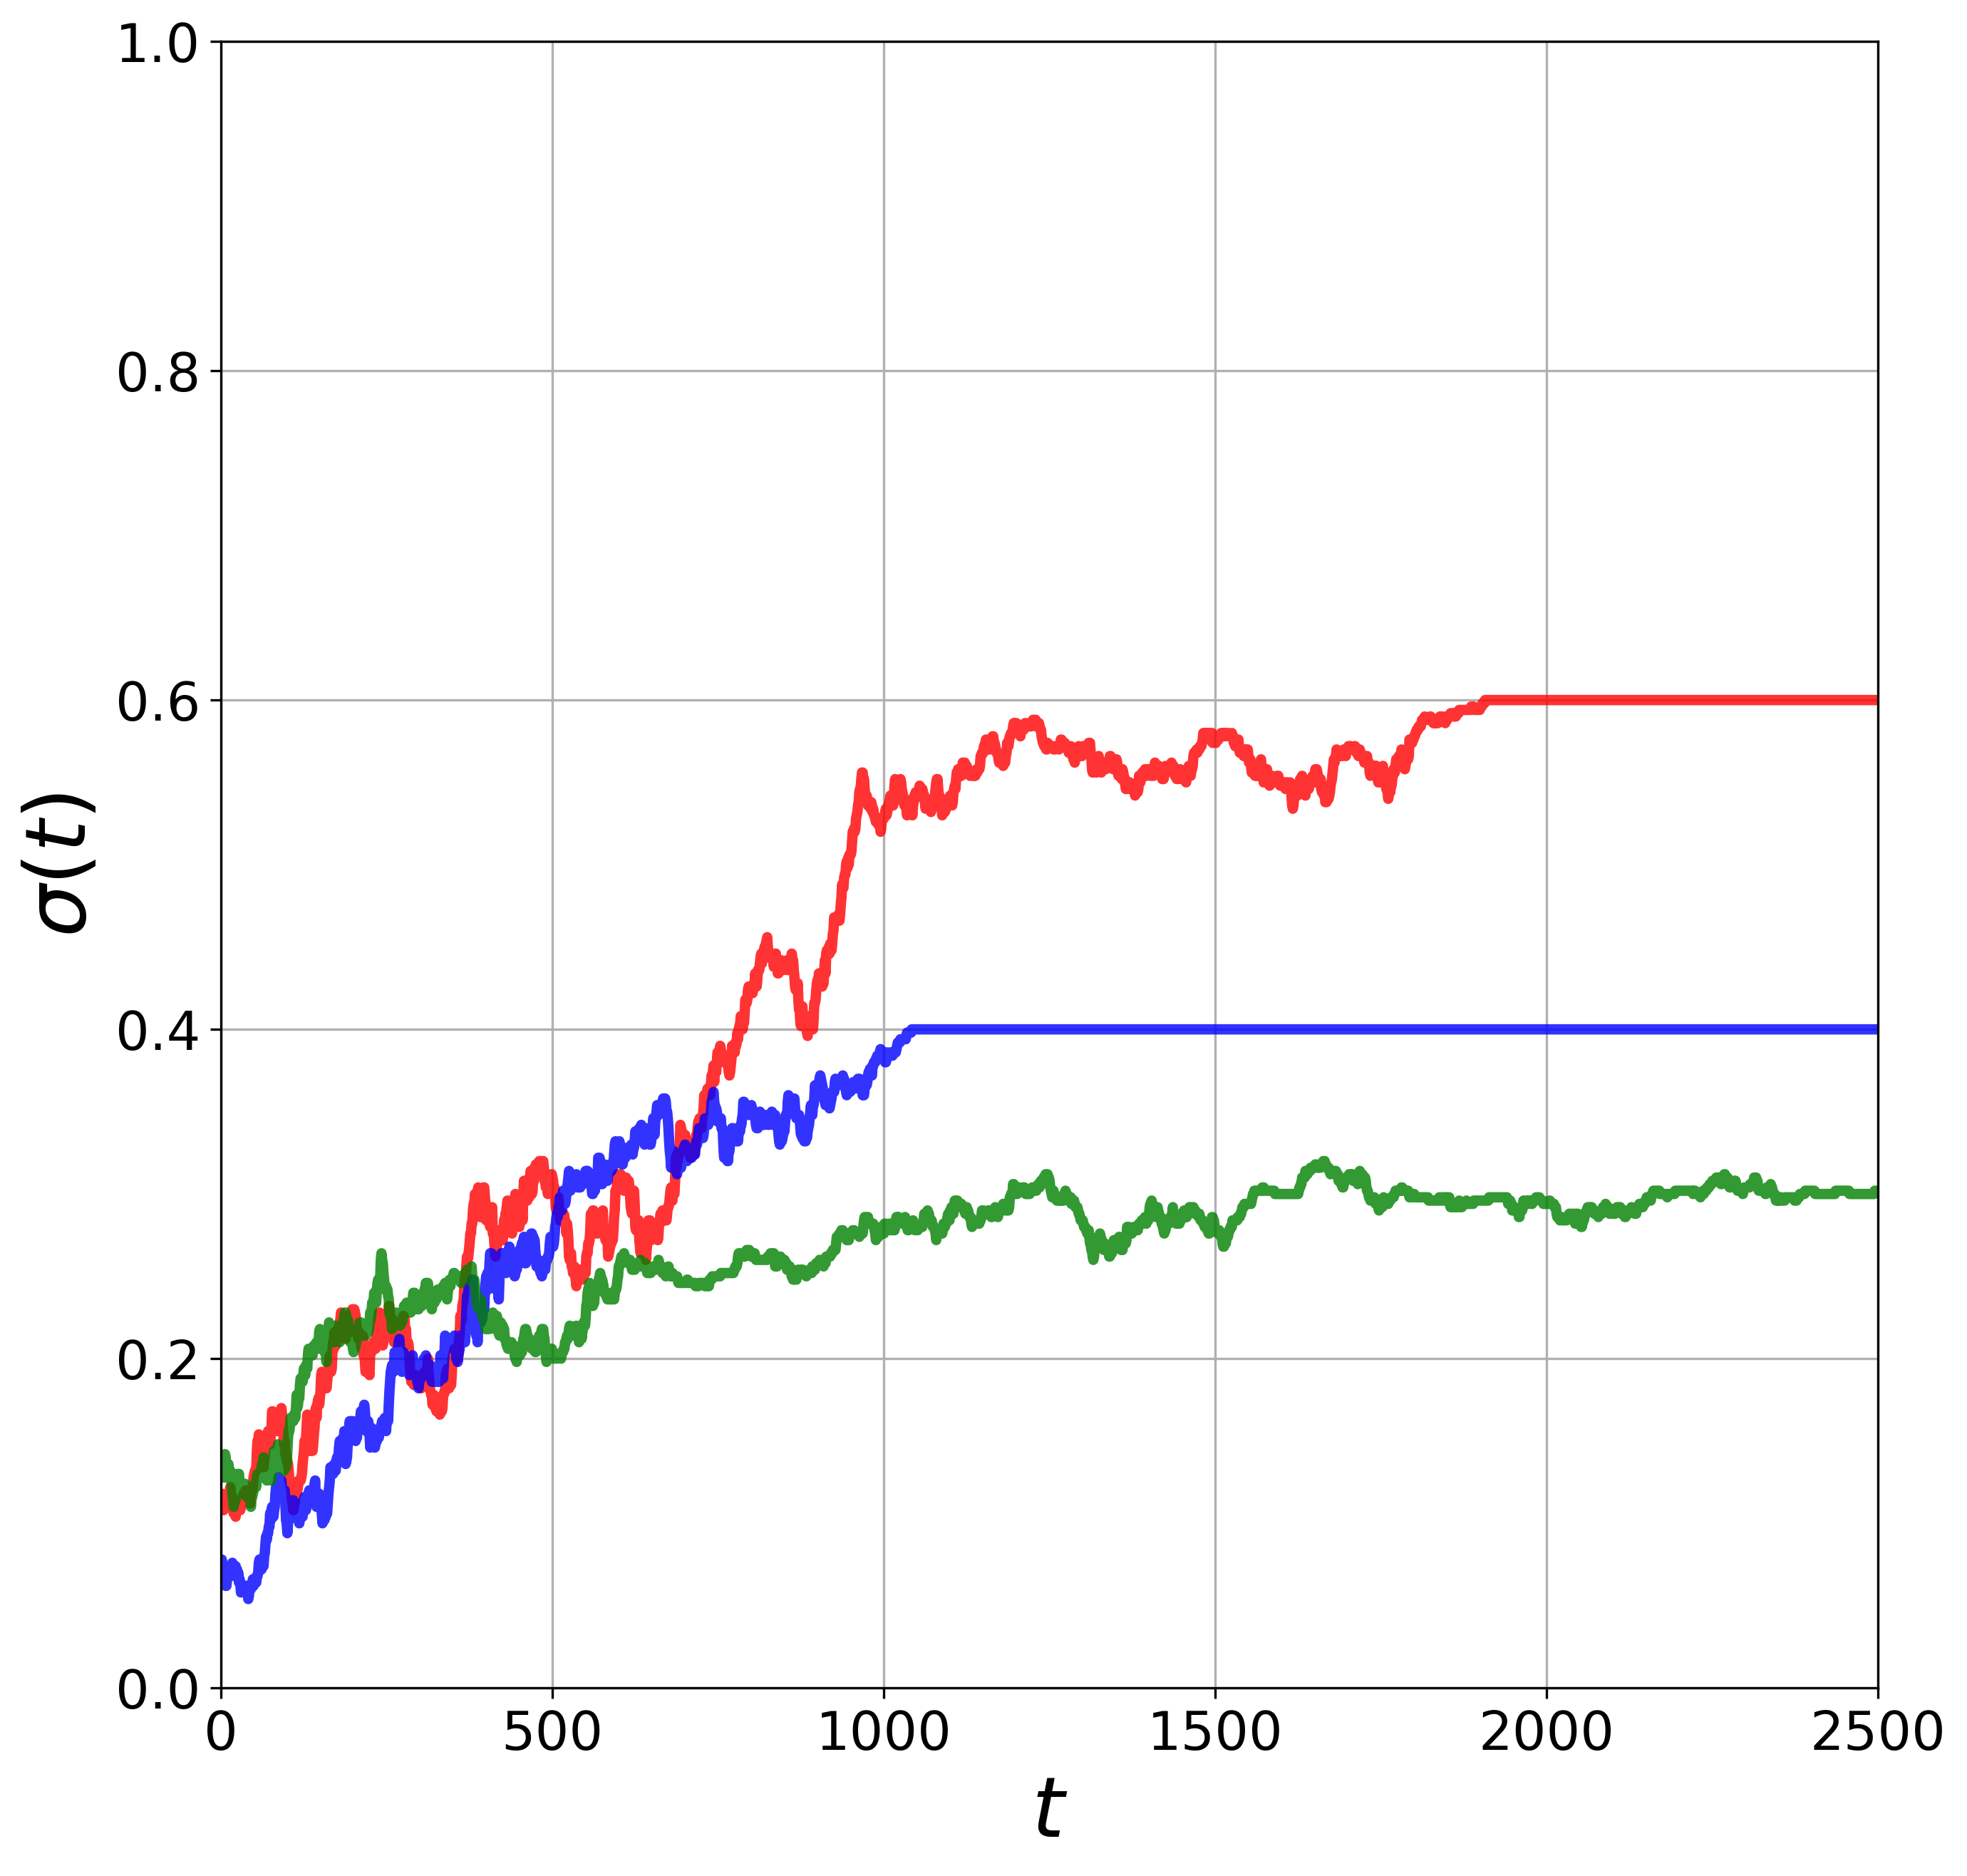

In [11]:
display(splot.fig)

### Save

In [8]:
splot.fig.savefig(
    os.path.join('plots', fname),
    bbox_inches='tight',
    pad_inches=0
)

## Animate

In [14]:
sdir = SimulationDirectory("output\\2024.06.20_11.38.14_longstep_roc(k=20,l=5)_static")
sr = read_pickled('4', path=sdir.path)
animate(
    sdir.sim,
    sr,
    filename='test',
    path=sdir.path,
    t_start=max(0, sr.t - 1000),
    t_end=sr.t,
    overwrite=True
)

  0%|          | 0/1000 [00:00<?, ?it/s]

Converting fig2img: 100%|██████████| 1000/1000 [00:06<00:00, 151.52it/s]
